In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import time
import tensorflow as tf

# Read our New York registrations Dataset

In [2]:
NYS_registrations_df = pd.read_csv('Resources/NYS Electric Vehicle Registrations.csv')
NYS_registrations_df.head()

Record Type              VIN Registration Class       City State    Zip  \
0         VEH      96722014661                SRF     BOVINA    NY  13740   
1         VEH          9106843                SRF   GLENDALE    NY  11385   
2         VEH       909SR2223A                SRF   STAFFORD    NY  14143   
3         VEH  9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095   
4         VEH         9A204759                SPC   BROOKLYN    NY  11211   

     County  Model Year   Make Body Type Fuel Type  Unladen Weight  \
0  DELAWARE        1972   SAAB      2DSD  ELECTRIC          2000.0   
1    QUEENS        1974    EVA      4DSD  ELECTRIC          2180.0   
2   GENESEE        1979  CITIC      2DSD  ELECTRIC           850.0   
3    FULTON        2012  VANTA      PICK  ELECTRIC          1900.0   
4     KINGS        2014  CROWN      P/SH  ELECTRIC          3335.0   

   Maximum Gross Weight  Passengers Reg Valid Date Reg Expiration Date Color  \
0                   NaN         NaN     05/04/2021          06/26/2023    WH   
1                   NaN         NaN     09/21/2021          10/03/2023    BR   
2                   NaN         NaN     05/12/2021          04/01/2023    GR   
3                   NaN         NaN     07/01/2014                 NaN    WH   
4                   NaN         NaN     12/09/2021          12/31/2022    WH   

  Scofflaw Indicator Suspension Indicator Revocation Indicator  
0                  N                    N                    N  
1                  N                    N                    N  
2                  N                    N                    N  
3                  N                    N                    N  
4                  N                    N                    N

In [3]:
NYS_registrations_df.columns

Index(['Record Type', 'VIN', 'Registration Class', 'City', 'State', 'Zip',
       'County', 'Model Year', 'Make', 'Body Type', 'Fuel Type',
       'Unladen Weight', 'Maximum Gross Weight', 'Passengers',
       'Reg Valid Date', 'Reg Expiration Date', 'Color', 'Scofflaw Indicator',
       'Suspension Indicator', 'Revocation Indicator'],
      dtype='object')

In [4]:
#  Let's drop the columns we will not use
# We choose to drop the columns below because they do not have an inpact on our analysis
drop_cols = ['Record Type', 'Unladen Weight', 'Maximum Gross Weight', 'Passengers',
          'Reg Expiration Date', 'Color', 'Scofflaw Indicator',
       'Suspension Indicator', 'Revocation Indicator']
NYS_registrations_df.drop(drop_cols, axis=1, inplace=True)
NYS_registrations_df.head()

VIN Registration Class       City State    Zip    County  \
0      96722014661                SRF     BOVINA    NY  13740  DELAWARE   
1          9106843                SRF   GLENDALE    NY  11385    QUEENS   
2       909SR2223A                SRF   STAFFORD    NY  14143   GENESEE   
3  9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095    FULTON   
4         9A204759                SPC   BROOKLYN    NY  11211     KINGS   

   Model Year   Make Body Type Fuel Type Reg Valid Date  
0        1972   SAAB      2DSD  ELECTRIC     05/04/2021  
1        1974    EVA      4DSD  ELECTRIC     09/21/2021  
2        1979  CITIC      2DSD  ELECTRIC     05/12/2021  
3        2012  VANTA      PICK  ELECTRIC     07/01/2014  
4        2014  CROWN      P/SH  ELECTRIC     12/09/2021

In [5]:
# Current Registrations VIN count
Registration = NYS_registrations_df.VIN.count()
Registration

62063

In [6]:
NYS_registrations_df['Reg Valid Date'] = pd.to_datetime(NYS_registrations_df['Reg Valid Date'])
NYS_registrations_df.head()

VIN Registration Class       City State    Zip    County  \
0      96722014661                SRF     BOVINA    NY  13740  DELAWARE   
1          9106843                SRF   GLENDALE    NY  11385    QUEENS   
2       909SR2223A                SRF   STAFFORD    NY  14143   GENESEE   
3  9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095    FULTON   
4         9A204759                SPC   BROOKLYN    NY  11211     KINGS   

   Model Year   Make Body Type Fuel Type Reg Valid Date  
0        1972   SAAB      2DSD  ELECTRIC     2021-05-04  
1        1974    EVA      4DSD  ELECTRIC     2021-09-21  
2        1979  CITIC      2DSD  ELECTRIC     2021-05-12  
3        2012  VANTA      PICK  ELECTRIC     2014-07-01  
4        2014  CROWN      P/SH  ELECTRIC     2021-12-09

In [7]:
# We will be using the m/y information to clean duplicates 
NYS_registrations_df['Registration year'] = NYS_registrations_df['Reg Valid Date'].dt.strftime("%Y")
NYS_registrations_df.head()

VIN Registration Class       City State    Zip    County  \
0      96722014661                SRF     BOVINA    NY  13740  DELAWARE   
1          9106843                SRF   GLENDALE    NY  11385    QUEENS   
2       909SR2223A                SRF   STAFFORD    NY  14143   GENESEE   
3  9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095    FULTON   
4         9A204759                SPC   BROOKLYN    NY  11211     KINGS   

   Model Year   Make Body Type Fuel Type Reg Valid Date Registration year  
0        1972   SAAB      2DSD  ELECTRIC     2021-05-04              2021  
1        1974    EVA      4DSD  ELECTRIC     2021-09-21              2021  
2        1979  CITIC      2DSD  ELECTRIC     2021-05-12              2021  
3        2012  VANTA      PICK  ELECTRIC     2014-07-01              2014  
4        2014  CROWN      P/SH  ELECTRIC     2021-12-09              2021

# Looking for duplicates

In [8]:
# let's see the duplicates accross the data set
duplicates = NYS_registrations_df[NYS_registrations_df.duplicated()]
duplicates.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
Reg Valid Date        0
Registration year     0
dtype: int64

In [9]:
# inspection of City duplicates
NYS_registrations_df[NYS_registrations_df.duplicated('City')]

VIN Registration Class           City State    Zip  \
21     7SAYGDEF9NF365467                PAS       BROOKLYN    NY  11249   
30     7SAYGDEF9NF337765                OMT       BROOKLYN    NY  11229   
32     7SAYGDEF9NF328094                PAS          BRONX    NY  10465   
35     7SAYGDEF9NF326491                PAS       NEW YORK    NY  10025   
38     7SAYGDEF9NF325096                PAS  STATEN ISLAND    NY  10305   
...                  ...                ...            ...   ...    ...   
62058        A976B08198T                SPC       BROOKLYN    NY  11232   
62059        A976B07325S                SPC       BROOKLYN    NY  11232   
62060        A976B06198R                SPC       BROOKLYN    NY  11232   
62061        A969N02801M                PSD         CORONA    NY  11368   
62062          A83T50116                PSD         CORONA    NY  11368   

         County  Model Year   Make Body Type Fuel Type Reg Valid Date  \
21        KINGS        2022  TESLA      SUBN  ELECTRIC     2022-01-31   
30        KINGS        2022  TESLA      SUBN  ELECTRIC     2022-01-12   
32        BRONX        2022  TESLA      SUBN  ELECTRIC     2021-12-15   
35     NEW YORK        2022  TESLA      SUBN  ELECTRIC     2021-12-18   
38     RICHMOND        2022  TESLA      SUBN  ELECTRIC     2022-01-18   
...         ...         ...    ...       ...       ...            ...   
62058     KINGS        2019   YALE       SWT  ELECTRIC     2021-10-27   
62059     KINGS        2018   YALE      P/SH  ELECTRIC     2021-10-27   
62060     KINGS        2017   YALE      P/SH  ELECTRIC     2021-10-27   
62061    QUEENS        2014   YALE      P/SH  ELECTRIC     2014-07-18   
62062    QUEENS        2010    TCM      P/SH  ELECTRIC     2014-08-06   

      Registration year  
21                 2022  
30                 2022  
32                 2021  
35                 2021  
38                 2022  
...                 ...  
62058              2021  
62059              2021  
62060              2021  
62061              2014  
62062              2014  

[60077 rows x 12 columns]

In [10]:
# inspection of Date/VIN/County duplicates
inspection= NYS_registrations_df[NYS_registrations_df.duplicated(subset=['Registration year','VIN', 'County'], keep=False)].sort_values('VIN')
inspection.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
Reg Valid Date        0
Registration year     0
dtype: int64

In [11]:
# inspection of Date/VIN duplicates
inspect_date_vin = NYS_registrations_df[NYS_registrations_df.duplicated(subset=['Registration year','VIN'], keep=False)].sort_values('VIN')
inspect_date_vin.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
Reg Valid Date        0
Registration year     0
dtype: int64

# Addressing potential Null Values

In [12]:
NYS_registrations_df.isna().sum()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
Reg Valid Date        0
Registration year     0
dtype: int64

In [13]:
NYS_registrations_df['Make'].unique()

array(['SAAB', 'EVA', 'CITIC', 'VANTA', 'CROWN', 'DE/EL', 'MANIT',
       'HONDA', 'TESLA', 'AMPER', 'PROTE', 'VOLVO', 'CENNT', 'ARCIM',
       'RIVIA', 'TOYOT', 'WORKH', 'GENZE', 'LEXUS', 'ALTA', 'ZERO',
       'ZE/MO', 'AZURE', 'FORD', 'THINK', 'GREEN', 'SCOUT', 'NAVIS',
       'INTER', 'STAR', 'POLAR', 'GEM', 'GLOBA', 'LINDE', 'BRAMM',
       'AM/GE', 'KARMA', 'KARM', 'LUCID', 'CRUS', 'MOKE', 'CR/CA', 'TESL',
       'BMW', 'TO/OU', 'ACURA', 'CLUBC', 'CL/CA', 'CLUB', 'PATH', 'ZO/EL',
       'NEWFL', 'NE/FL', 'COLUM', 'TOMBE', 'SPARK', 'SMITH', 'UTILI',
       'NOVA', 'NOVB', 'NO/BU', 'IC', 'CR/CO', 'MITSU', 'LINCO', 'RAM',
       'ZENIT', 'ZENTI', 'FIAT', 'PIAGG', 'CHEVR', 'GMC', 'ZENN', 'CHRYS',
       'LION', 'GILLI', 'DETRO', 'VOLKS', 'ASVE', 'EA/BE', 'COM', 'COMUT',
       'CO/CA', 'KALMA', 'AMPHI', 'CRAYL', 'CUSHM', 'EZ/GO', 'OHAWA',
       'ORANG', 'ORAN', 'ZELEC', 'ZEV', 'ORION', 'OROIN', 'ORON', 'IRION',
       'OTION', 'NISSA', 'PRO', 'JOHND', 'JO/DE', 'LI/SE', 'STING',
    

In [14]:
len(NYS_registrations_df['Make'].unique())

197

In [15]:
# Next we can see some vehicles name are just mispelled or have an a different name , we will group by the OEM.
NYS_registrations_df['Make'].replace(['CROWN', 'TOYOT'], 'TOYOTA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ORION','OTION','OROIN','IRION','ORON','ENERG'], 'FORD', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['NOVB', 'NOVA','IRION'], 'NOVA BUS', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['NEWFL', 'NE/FL'], 'NEW FLYER', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['DOOH', 'DOOHA'], 'DOOHAN', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['JAGUA','JAG'], 'JAGUAR', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ORAN','ORANG'], 'ORANGE EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['MILE','MILES'], 'MILES EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['GENU','GENUI'], 'GENESIS', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['KARM', 'FISKE','KALMA'], 'KARMA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['PIAGG','VESPA'], 'PIAGGIO', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ZERO','ZE/MO'], 'ZERO EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['POLRD','POLAR','POLES','POLE'], 'POLESTAR', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['CITIC','CITC'], 'HONDA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['VOLKS', 'SCOUT'],'VOLKSWAGEN',
                    inplace=True)
NYS_registrations_df['Make'].replace(['CHRIS','CHRYS','CRAYL'], 
                    'CHRYSLER', inplace=True)
NYS_registrations_df['Make'].replace('SUBAR', 'SUBARU', inplace=True)
NYS_registrations_df['Make'].replace('TESL', 'TESLA', inplace=True)
NYS_registrations_df['Make'].replace('FREIG', 'FREIGHT LINER', inplace=True)
NYS_registrations_df['Make'].replace('PORSC', 'PORSCHE', inplace=True)
NYS_registrations_df['Make'].replace('NIUU', 'NIU', inplace=True)
NYS_registrations_df['Make'].replace('LINCO', 'LINCOLN', inplace=True)
NYS_registrations_df['Make'].replace('VANTA', 'BMW', inplace=True)
NYS_registrations_df['Make'].replace('CASE', 'CAKE', inplace=True)
NYS_registrations_df['Make'].replace('NISSA', 'NISSAN', inplace=True)
NYS_registrations_df['Make'].replace('SUZUK', 'SUZUKI', inplace=True)
NYS_registrations_df['Make'].replace('RIVIA', 'RIVIAN', inplace=True)
NYS_registrations_df['Make'].replace('GREEN', 'GREENPOWER MOTORS', inplace=True)
NYS_registrations_df['Make'].replace('HYUND', 'HYUNDAI', inplace=True)
NYS_registrations_df['Make'].replace('CENNT', 'CENNTRO', inplace=True)
NYS_registrations_df['Make'].replace('PROTE', 'PROTERRA', inplace=True)
NYS_registrations_df['Make'].replace(['INTER','STAR','OTHER'], 'INTERNATIONAL',
                                     inplace=True)
NYS_registrations_df['Make'].replace(['MITSU','FUSO' ],'MITSUBISHI', 
                                     inplace=True)
NYS_registrations_df['Make'].replace(['IC','ICE','IC/PN' ],'ICBUS', 
                                     inplace=True)
NYS_registrations_df['Make'].replace('ZELEC', 'ZELECTRIC MOTORS', inplace=True)
NYS_registrations_df['Make'].replace('KAWAS', 'KAWASAKI', inplace=True)
NYS_registrations_df['Make'].replace('EVA', 'EVI', inplace=True)
NYS_registrations_df['Make'].replace('EVTA', 'EVT', inplace=True)
NYS_registrations_df['Make'].replace('CHEVR', 'CHEVROLET', inplace=True)

In [16]:
NYS_registrations_df['Make'].unique()

array(['SAAB', 'EVI', 'HONDA', 'BMW', 'TOYOTA', 'DE/EL', 'MANIT', 'TESLA',
       'AMPER', 'PROTERRA', 'VOLVO', 'CENNTRO', 'ARCIM', 'RIVIAN',
       'WORKH', 'GENZE', 'LEXUS', 'ALTA', 'ZERO EV', 'AZURE', 'FORD',
       'THINK', 'GREENPOWER MOTORS', 'VOLKSWAGEN', 'NAVIS',
       'INTERNATIONAL', 'POLESTAR', 'GEM', 'GLOBA', 'LINDE', 'BRAMM',
       'AM/GE', 'KARMA', 'LUCID', 'CRUS', 'MOKE', 'CR/CA', 'TO/OU',
       'ACURA', 'CLUBC', 'CL/CA', 'CLUB', 'PATH', 'ZO/EL', 'NEW FLYER',
       'COLUM', 'TOMBE', 'SPARK', 'SMITH', 'UTILI', 'NOVA BUS', 'NO/BU',
       'ICBUS', 'CR/CO', 'MITSUBISHI', 'LINCOLN', 'RAM', 'ZENIT', 'ZENTI',
       'FIAT', 'PIAGGIO', 'CHEVROLET', 'GMC', 'ZENN', 'CHRYSLER', 'LION',
       'GILLI', 'DETRO', 'ASVE', 'EA/BE', 'COM', 'COMUT', 'CO/CA',
       'AMPHI', 'CUSHM', 'EZ/GO', 'OHAWA', 'ORANGE EV',
       'ZELECTRIC MOTORS', 'ZEV', 'NISSAN', 'PRO', 'JOHND', 'JO/DE',
       'LI/SE', 'STING', 'HA/DA', 'LIVEW', 'MEVH', 'CADIL',
       'FREIGHT LINER', 'TRANT', 'EGO', 'ETU

In [17]:
len(NYS_registrations_df['Make'].unique())
# A DROP FROM 197 TO 162

162

In [18]:
NYS_registrations_df

VIN Registration Class       City State    Zip    County  \
0          96722014661                SRF     BOVINA    NY  13740  DELAWARE   
1              9106843                SRF   GLENDALE    NY  11385    QUEENS   
2           909SR2223A                SRF   STAFFORD    NY  14143   GENESEE   
3      9E2SPAXBC113501                PSD  JOHNSTOWN    NY  12095    FULTON   
4             9A204759                SPC   BROOKLYN    NY  11211     KINGS   
...                ...                ...        ...   ...    ...       ...   
62058      A976B08198T                SPC   BROOKLYN    NY  11232     KINGS   
62059      A976B07325S                SPC   BROOKLYN    NY  11232     KINGS   
62060      A976B06198R                SPC   BROOKLYN    NY  11232     KINGS   
62061      A969N02801M                PSD     CORONA    NY  11368    QUEENS   
62062        A83T50116                PSD     CORONA    NY  11368    QUEENS   

       Model Year    Make Body Type Fuel Type Reg Valid Date Registration year  
0            1972    SAAB      2DSD  ELECTRIC     2021-05-04              2021  
1            1974     EVI      4DSD  ELECTRIC     2021-09-21              2021  
2            1979   HONDA      2DSD  ELECTRIC     2021-05-12              2021  
3            2012     BMW      PICK  ELECTRIC     2014-07-01              2014  
4            2014  TOYOTA      P/SH  ELECTRIC     2021-12-09              2021  
...           ...     ...       ...       ...            ...               ...  
62058        2019    YALE       SWT  ELECTRIC     2021-10-27              2021  
62059        2018    YALE      P/SH  ELECTRIC     2021-10-27              2021  
62060        2017    YALE      P/SH  ELECTRIC     2021-10-27              2021  
62061        2014    YALE      P/SH  ELECTRIC     2014-07-18              2014  
62062        2010     TCM      P/SH  ELECTRIC     2014-08-06              2014  

[62063 rows x 12 columns]

In [19]:
NYS_registrations_df['Make' ].value_counts()

TESLA        37137
NIU           6918
HYUNDAI       3130
FORD          3082
CHEVROLET     3044
             ...  
CUSHM            1
AMPHI            1
CO/CA            1
COMUT            1
TCM              1
Name: Make, Length: 162, dtype: int64

In [20]:
# Looking at the Make for Yale to see if it's actually a car.
# base on the registration class  SPC stand for self parking cars as found here https://www.allacronyms.com/SPC/car
NYS_registrations_df[NYS_registrations_df['Make' ]=='YALE']

VIN Registration Class       City State    Zip    County  \
50346      N336261                SPC  HAUPPAUGE    NY  11788   SUFFOLK   
50347       N30346                SPC   NEW YORK    NY  10002  NEW YORK   
62036  G807N09683P                SPC   BROOKLYN    NY  11218     KINGS   
62037  G807N09057N                SPC   BROOKLYN    NY  11206     KINGS   
62041  F807N04372D                SPC    ASTORIA    NY  11105    QUEENS   
62043  E216A01721E                SPC    ASTORIA    NY  11105    QUEENS   
62044  E216A01715E                SPC    ASTORIA    NY  11105    QUEENS   
62045  D875V06421P                SPC   BROOKLYN    NY  11218     KINGS   
62046  D875V06225P                SPC   BROOKLYN    NY  11218     KINGS   
62047  D875V05953P                SPC   BROOKLYN    NY  11218     KINGS   
62048  D216A02259C                SPC   BETHPAGE    NY  11714    NASSAU   
62049  D216A02258C                SPC      BRONX    NY  10473     BRONX   
62050  D216A02257C                SPC      BRONX    NY  10473     BRONX   
62051  D216A02254C                SPC      BRONX    NY  10473     BRONX   
62052  C839N02158H                PSD   FLUSHING    NY  11373    QUEENS   
62054  B974V02082N                SPC   BROOKLYN    NY  11214     KINGS   
62056  B807N01689U                SPC   NEW YORK    NY  10002  NEW YORK   
62057  A976B09580U                SPC   BROOKLYN    NY  11232     KINGS   
62058  A976B08198T                SPC   BROOKLYN    NY  11232     KINGS   
62059  A976B07325S                SPC   BROOKLYN    NY  11232     KINGS   
62060  A976B06198R                SPC   BROOKLYN    NY  11232     KINGS   
62061  A969N02801M                PSD     CORONA    NY  11368    QUEENS   

       Model Year  Make Body Type Fuel Type Reg Valid Date Registration year  
50346        1978  YALE       SWT  ELECTRIC     2021-12-09              2021  
50347        1972  YALE      P/SH  ELECTRIC     2021-11-21              2021  
62036        2016  YALE      P/SH  ELECTRIC     2021-12-14              2021  
62037        2015  YALE      P/SH  ELECTRIC     2021-11-24              2021  
62041        2006  YALE       SWT  ELECTRIC     2021-10-29              2021  
62043        2007  YALE       SWT  ELECTRIC     2021-10-29              2021  
62044        2007  YALE       SWT  ELECTRIC     2021-10-29              2021  
62045        2016  YALE      P/SH  ELECTRIC     2021-12-14              2021  
62046        2016  YALE      P/SH  ELECTRIC     2021-12-14              2021  
62047        2016  YALE      P/SH  ELECTRIC     2021-12-14              2021  
62048        2005  YALE       SWT  ELECTRIC     2021-10-29              2021  
62049        2005  YALE       SWT  ELECTRIC     2021-10-29              2021  
62050        2005  YALE       SWT  ELECTRIC     2021-10-29              2021  
62051        2005  YALE       SWT  ELECTRIC     2021-10-29              2021  
62052        2010  YALE       SWT  ELECTRIC     2020-03-18              2020  
62054        2015  YALE      P/SH  ELECTRIC     2021-12-08              2021  
62056        1997  YALE      P/SH  ELECTRIC     2021-11-23              2021  
62057        2020  YALE      P/SH  ELECTRIC     2022-01-24              2022  
62058        2019  YALE       SWT  ELECTRIC     2021-10-27              2021  
62059        2018  YALE      P/SH  ELECTRIC     2021-10-27              2021  
62060        2017  YALE      P/SH  ELECTRIC     2021-10-27              2021  
62061        2014  YALE      P/SH  ELECTRIC     2014-07-18              2014

In [21]:
# for the purpose of our analysis , we will filter  the dataset by Model year equal or  later than 2012 to have a decade of dataset.
NYS_registrations_df= NYS_registrations_df[NYS_registrations_df['Model Year'] >= 2012] 
NYS_registrations_df

VIN Registration Class           City State    Zip  \
3      9E2SPAXBC113501                PSD      JOHNSTOWN    NY  12095   
4             9A204759                SPC       BROOKLYN    NY  11211   
5              9A19709                SPC    FARMINGDALE    NY  11735   
8               854087                SPC          DEPEW    NY  14043   
9             7.85E+14                LMB  STATEN ISLAND    NY  10302   
...                ...                ...            ...   ...    ...   
62057      A976B09580U                SPC       BROOKLYN    NY  11232   
62058      A976B08198T                SPC       BROOKLYN    NY  11232   
62059      A976B07325S                SPC       BROOKLYN    NY  11232   
62060      A976B06198R                SPC       BROOKLYN    NY  11232   
62061      A969N02801M                PSD         CORONA    NY  11368   

         County  Model Year    Make Body Type Fuel Type Reg Valid Date  \
3        FULTON        2012     BMW      PICK  ELECTRIC     2014-07-01   
4         KINGS        2014  TOYOTA      P/SH  ELECTRIC     2021-12-09   
5       SUFFOLK        2013  TOYOTA       SWT  ELECTRIC     2021-11-16   
8          ERIE        2016   MANIT       SWT  ELECTRIC     2021-10-19   
9      RICHMOND        2019   HONDA      MOPD  ELECTRIC     2021-08-11   
...         ...         ...     ...       ...       ...            ...   
62057     KINGS        2020    YALE      P/SH  ELECTRIC     2022-01-24   
62058     KINGS        2019    YALE       SWT  ELECTRIC     2021-10-27   
62059     KINGS        2018    YALE      P/SH  ELECTRIC     2021-10-27   
62060     KINGS        2017    YALE      P/SH  ELECTRIC     2021-10-27   
62061    QUEENS        2014    YALE      P/SH  ELECTRIC     2014-07-18   

      Registration year  
3                  2014  
4                  2021  
5                  2021  
8                  2021  
9                  2021  
...                 ...  
62057              2022  
62058              2021  
62059              2021  
62060              2021  
62061              2014  

[59955 rows x 12 columns]

In [22]:
#Registration year

# for the purpose of our analysis since 2022 is not over yet we will drop the registrations for the year 2022.
#also from our initial look at the excel file the registration start on 2014-04-30 and end on 2022-02-28.
# We have 2 tasks here then to have complete years data set we will drop 2014 values and 2022 registrations date values
#we will then focus on registration or sale year from 2015-2021

#droping no needed years

start_date = '2015-01-01'
end_date = '2021-12-31'
mask = (NYS_registrations_df['Reg Valid Date'] >= start_date) & (NYS_registrations_df['Reg Valid Date'] <= end_date)
NYS_registrations_df= NYS_registrations_df.loc[mask]
NYS_registrations_df




VIN Registration Class            City State    Zip  \
4               9A204759                SPC        BROOKLYN    NY  11211   
5                9A19709                SPC     FARMINGDALE    NY  11735   
8                 854087                SPC           DEPEW    NY  14043   
9               7.85E+14                LMB   STATEN ISLAND    NY  10302   
28     7SAYGDEF9NF342092                PAS  PORT JEFFERSON    NY  11777   
...                  ...                ...             ...   ...    ...   
62054        B974V02082N                SPC        BROOKLYN    NY  11214   
62055        B974V02081N                SPC        BROOKLYN    NY  11214   
62058        A976B08198T                SPC        BROOKLYN    NY  11232   
62059        A976B07325S                SPC        BROOKLYN    NY  11232   
62060        A976B06198R                SPC        BROOKLYN    NY  11232   

         County  Model Year    Make Body Type Fuel Type Reg Valid Date  \
4         KINGS        2014  TOYOTA      P/SH  ELECTRIC     2021-12-09   
5       SUFFOLK        2013  TOYOTA       SWT  ELECTRIC     2021-11-16   
8          ERIE        2016   MANIT       SWT  ELECTRIC     2021-10-19   
9      RICHMOND        2019   HONDA      MOPD  ELECTRIC     2021-08-11   
28      SUFFOLK        2022   TESLA      SUBN  ELECTRIC     2021-12-28   
...         ...         ...     ...       ...       ...            ...   
62054     KINGS        2015    YALE      P/SH  ELECTRIC     2021-12-08   
62055     KINGS        2015   ICBUS      P/SH  ELECTRIC     2021-12-08   
62058     KINGS        2019    YALE       SWT  ELECTRIC     2021-10-27   
62059     KINGS        2018    YALE      P/SH  ELECTRIC     2021-10-27   
62060     KINGS        2017    YALE      P/SH  ELECTRIC     2021-10-27   

      Registration year  
4                  2021  
5                  2021  
8                  2021  
9                  2021  
28                 2021  
...                 ...  
62054              2021  
62055              2021  
62058              2021  
62059              2021  
62060              2021  

[54972 rows x 12 columns]

In [23]:
#Reg Valid Date	count
Reg_valid_date = NYS_registrations_df['Reg Valid Date'].value_counts()
Reg_valid_date

2021-03-24    918
2021-03-26    800
2021-03-29    743
2021-03-25    645
2021-03-23    582
             ... 
2020-01-14      1
2020-01-09      1
2017-05-17      1
2016-04-06      1
2019-12-26      1
Name: Reg Valid Date, Length: 944, dtype: int64

In [24]:
# Registration VIN count
Registration = NYS_registrations_df.VIN.count()
Registration

54972

In [25]:
#let's get unique values  for the Make
Make_counts = NYS_registrations_df.Make.value_counts()
Make_counts

TESLA        33937
NIU           6915
CHEVROLET     2867
HYUNDAI       2807
NISSAN        1975
             ...  
EAHOR            1
FLYWI            1
MOFFE            1
NO/BU            1
JO/DE            1
Name: Make, Length: 118, dtype: int64

In [26]:
#let's get unique values  for the Model Year
Model_year_counts = NYS_registrations_df['Model Year'].value_counts()
Model_year_counts

2021    22350
2020    12356
2019     5677
2018     5522
2022     3399
2017     2166
2016     1424
2015      882
2014      478
2013      478
2012      240
Name: Model Year, dtype: int64

In [27]:
#let's get unique values  for the Registration class
Regist_class_counts = NYS_registrations_df['Registration Class'].value_counts()
Regist_class_counts

PAS    41521
LMB     6914
SRF     2582
PSD     1015
OMT      620
MED      480
ORG      416
MOT      346
LUA      343
OMS      214
RGL      124
COM      118
SPO       91
STA       48
HAM       24
SPC       23
VAS       16
ATV       15
SRN       10
LMC       10
BOB       10
TRC        7
LMA        6
OML        4
ARG        3
ORM        2
OMV        2
SOS        1
AYG        1
SUP        1
JCA        1
STG        1
NYA        1
AGR        1
SCL        1
Name: Registration Class, dtype: int64

In [28]:
#let's get unique values for City
City_counts= NYS_registrations_df.City.value_counts()
City_counts

BROOKLYN          9739
NEW YORK          2781
STATEN ISLAND     1121
ROCHESTER         1021
SCARSDALE          751
                  ... 
CLARENCE CENTR       1
GREEN VALLEY         1
JACKSON              1
FRESH MEADOW         1
BROOKLNY             1
Name: City, Length: 1876, dtype: int64

In [29]:
#let's get unique values  for County
County_counts= NYS_registrations_df.County.value_counts()
County_counts

KINGS          9879
NASSAU         7674
SUFFOLK        6665
WESTCHESTER    6586
QUEENS         3431
               ... 
SENECA           27
ALLEGANY         21
WYOMING          17
LEWIS             9
HAMILTON          6
Name: County, Length: 63, dtype: int64

In [30]:
#let's get all the Registration year counts
reg_year_counts= NYS_registrations_df['Registration year'].value_counts()
reg_year_counts

2021    40356
2020    13864
2019      230
2018      213
2017      148
2016      110
2015       51
Name: Registration year, dtype: int64

In [32]:
# we will adjust the index of our New York registration Database
NYS_registrations_df.set_index('Reg Valid Date', inplace=True)
NYS_registrations_df.head()

VIN Registration Class            City State  \
Reg Valid Date                                                               
2021-12-09               9A204759                SPC        BROOKLYN    NY   
2021-11-16                9A19709                SPC     FARMINGDALE    NY   
2021-10-19                 854087                SPC           DEPEW    NY   
2021-08-11               7.85E+14                LMB   STATEN ISLAND    NY   
2021-12-28      7SAYGDEF9NF342092                PAS  PORT JEFFERSON    NY   

                  Zip    County  Model Year    Make Body Type Fuel Type  \
Reg Valid Date                                                            
2021-12-09      11211     KINGS        2014  TOYOTA      P/SH  ELECTRIC   
2021-11-16      11735   SUFFOLK        2013  TOYOTA       SWT  ELECTRIC   
2021-10-19      14043      ERIE        2016   MANIT       SWT  ELECTRIC   
2021-08-11      10302  RICHMOND        2019   HONDA      MOPD  ELECTRIC   
2021-12-28      11777   SUFFOLK        2022   TESLA      SUBN  ELECTRIC   

               Registration year  
Reg Valid Date                    
2021-12-09                  2021  
2021-11-16                  2021  
2021-10-19                  2021  
2021-08-11                  2021  
2021-12-28                  2021

Now we are slicing out new car purchases for each county, parsing information to a 
dictionary, changing index to be monthly and taking cumulative sum to convert
information to cars on the road

In [33]:
county_dict = {}
for county in list(NYS_registrations_df ['County'].unique()):
    county_dict[county] = NYS_registrations_df[
        (NYS_registrations_df['County']==county)
        
    ].resample('M').size().cumsum()

In [34]:
#filling null values created by resampling with 0's.
df_cumsum = pd.DataFrame(county_dict)
df_cumsum.fillna(0, inplace=True)
df_cumsum.head()

KINGS  SUFFOLK  ERIE  RICHMOND  OSWEGO  RENSSELAER  BRONX  \
Reg Valid Date                                                              
2015-03-31        0.0        2   0.0       0.0     0.0         0.0    0.0   
2015-04-30        0.0        2   0.0       0.0     0.0         0.0    0.0   
2015-05-31        0.0        2   0.0       0.0     0.0         0.0    0.0   
2015-06-30        0.0        2   0.0       0.0     0.0         0.0    0.0   
2015-07-31        0.0        2   0.0       0.0     0.0         0.0    0.0   

                WESTCHESTER  NEW YORK  ROCKLAND  ...  HAMILTON  CHEMUNG  \
Reg Valid Date                                   ...                      
2015-03-31              0.0       0.0       0.0  ...       0.0      0.0   
2015-04-30              0.0       0.0       0.0  ...       0.0      0.0   
2015-05-31              0.0      10.0       0.0  ...       0.0      0.0   
2015-06-30              0.0      11.0       0.0  ...       0.0      0.0   
2015-07-31              0.0      11.0       0.0  ...       0.0      0.0   

                MADISON  MONTGOMERY  ORLEANS  YATES  DELAWARE  FRANKLIN  \
Reg Valid Date                                                            
2015-03-31          0.0         0.0      0.0    0.0       0.0       0.0   
2015-04-30          0.0         0.0      0.0    0.0       0.0       0.0   
2015-05-31          0.0         0.0      0.0    0.0       0.0       0.0   
2015-06-30          0.0         0.0      0.0    0.0       0.0       0.0   
2015-07-31          0.0         0.0      0.0    0.0       0.0       0.0   

                WASHINGTON  CHENANGO  
Reg Valid Date                        
2015-03-31             0.0       0.0  
2015-04-30             0.0       0.0  
2015-05-31             0.0       0.0  
2015-06-30             0.0       0.0  
2015-07-31             0.0       0.0  

[5 rows x 63 columns]

## Electric Vehicles on the Road in NY State Over Time

Before we take a look at the electric vehicle trends for each county, it is important to see the larger picture by looking at the statewide trend.

In [35]:
#summing each row to get monthly statewide total 
df_cumsum['State Total'] = df_cumsum.sum(axis=1)
df_cumsum.head()

KINGS  SUFFOLK  ERIE  RICHMOND  OSWEGO  RENSSELAER  BRONX  \
Reg Valid Date                                                              
2015-03-31        0.0        2   0.0       0.0     0.0         0.0    0.0   
2015-04-30        0.0        2   0.0       0.0     0.0         0.0    0.0   
2015-05-31        0.0        2   0.0       0.0     0.0         0.0    0.0   
2015-06-30        0.0        2   0.0       0.0     0.0         0.0    0.0   
2015-07-31        0.0        2   0.0       0.0     0.0         0.0    0.0   

                WESTCHESTER  NEW YORK  ROCKLAND  ...  CHEMUNG  MADISON  \
Reg Valid Date                                   ...                     
2015-03-31              0.0       0.0       0.0  ...      0.0      0.0   
2015-04-30              0.0       0.0       0.0  ...      0.0      0.0   
2015-05-31              0.0      10.0       0.0  ...      0.0      0.0   
2015-06-30              0.0      11.0       0.0  ...      0.0      0.0   
2015-07-31              0.0      11.0       0.0  ...      0.0      0.0   

                MONTGOMERY  ORLEANS  YATES  DELAWARE  FRANKLIN  WASHINGTON  \
Reg Valid Date                                                               
2015-03-31             0.0      0.0    0.0       0.0       0.0         0.0   
2015-04-30             0.0      0.0    0.0       0.0       0.0         0.0   
2015-05-31             0.0      0.0    0.0       0.0       0.0         0.0   
2015-06-30             0.0      0.0    0.0       0.0       0.0         0.0   
2015-07-31             0.0      0.0    0.0       0.0       0.0         0.0   

                CHENANGO  State Total  
Reg Valid Date                         
2015-03-31           0.0          2.0  
2015-04-30           0.0          2.0  
2015-05-31           0.0         13.0  
2015-06-30           0.0         14.0  
2015-07-31           0.0         19.0  

[5 rows x 64 columns]

In [36]:
df_cumsum = df_cumsum.reset_index()
df_cumsum.head()

Reg Valid Date  KINGS  SUFFOLK  ERIE  RICHMOND  OSWEGO  RENSSELAER  BRONX  \
0     2015-03-31    0.0        2   0.0       0.0     0.0         0.0    0.0   
1     2015-04-30    0.0        2   0.0       0.0     0.0         0.0    0.0   
2     2015-05-31    0.0        2   0.0       0.0     0.0         0.0    0.0   
3     2015-06-30    0.0        2   0.0       0.0     0.0         0.0    0.0   
4     2015-07-31    0.0        2   0.0       0.0     0.0         0.0    0.0   

   WESTCHESTER  NEW YORK  ...  CHEMUNG  MADISON  MONTGOMERY  ORLEANS  YATES  \
0          0.0       0.0  ...      0.0      0.0         0.0      0.0    0.0   
1          0.0       0.0  ...      0.0      0.0         0.0      0.0    0.0   
2          0.0      10.0  ...      0.0      0.0         0.0      0.0    0.0   
3          0.0      11.0  ...      0.0      0.0         0.0      0.0    0.0   
4          0.0      11.0  ...      0.0      0.0         0.0      0.0    0.0   

   DELAWARE  FRANKLIN  WASHINGTON  CHENANGO  State Total  
0       0.0       0.0         0.0       0.0          2.0  
1       0.0       0.0         0.0       0.0          2.0  
2       0.0       0.0         0.0       0.0         13.0  
3       0.0       0.0         0.0       0.0         14.0  
4       0.0       0.0         0.0       0.0         19.0  

[5 rows x 65 columns]

In [37]:
#saving the df for dashboarding
import os
path = 'Resources'
output_file = os.path.join(path,f'vehicles_on_the_road.csv')
df_cumsum.to_csv(output_file, index=False)

# Diagrams

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

### Electric Vehicles on the Road in NYS (2015-2021)

In [39]:
reg_year_counts_df = pd.DataFrame(reg_year_counts)
reg_year_counts_df= reg_year_counts.reset_index()
reg_year_counts_df.columns = ['Year','Total Counts']
reg_year_counts_df

Year  Total Counts
0  2021         40356
1  2020         13864
2  2019           230
3  2018           213
4  2017           148
5  2016           110
6  2015            51

In [40]:
#let's reindex the year column
reg_year_counts_df= reg_year_counts_df.sort_values(by='Year', ascending=True)
reg_year_counts_df.reset_index(drop=True, inplace=True)
reg_year_counts_df

Year  Total Counts
0  2015            51
1  2016           110
2  2017           148
3  2018           213
4  2019           230
5  2020         13864
6  2021         40356

In [41]:
#saving the registration year dataset for the years 2014-2021 to Csv
reg_year_counts_df.to_csv('Resources/Registrations_per_Years_2015_2021.csv')

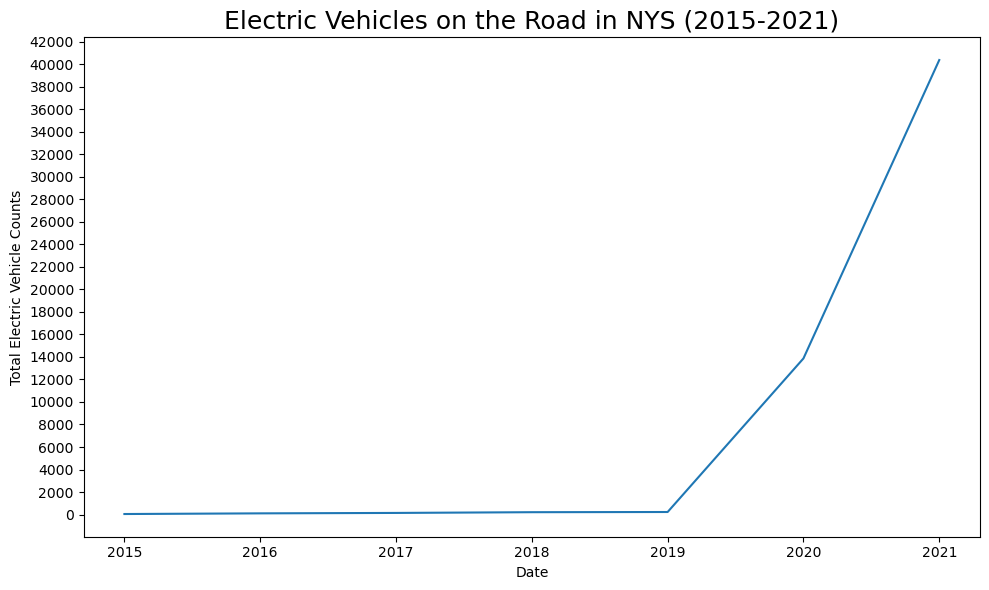

In [42]:
# Create a line chart
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='Year', y='Total Counts', data=reg_year_counts_df, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Electric Vehicles on the Road in NYS (2015-2021)',fontsize=18)
ax.set_yticks(range(0,43000,2000))
plt.tight_layout()
plt.savefig('Images/EV_on_the_road_2015_2021.png', facecolor='white');

### Total Electric Vehicle Count by City (Top 10)

In [43]:
# Count the total numbers of electric vehicle per city
City_counts_df = pd.DataFrame(City_counts)
City_counts_df= City_counts_df.reset_index()
City_counts_df.columns = ['City','Total Counts']

# Select the top 10 city
City_counts_df.sort_values('Total Counts',ascending =True)
City_counts_10_df= City_counts_df.head(10)
City_counts_10_df

City  Total Counts
0       BROOKLYN          9739
1       NEW YORK          2781
2  STATEN ISLAND          1121
3      ROCHESTER          1021
4      SCARSDALE           751
5          BRONX           750
6     GREAT NECK           538
7        SYOSSET           454
8       FLUSHING           438
9      DIX HILLS           425

In [44]:
top_10_cities = ['BROOKLYN', 'NEW YORK', 'STATEN ISLAND', 'ROCHESTER', 'BRONX', 
                  'SCARSDALE', 'GREAT NECK', 'SYOSSET', 'FLUSHING', 'DIX HILLS']

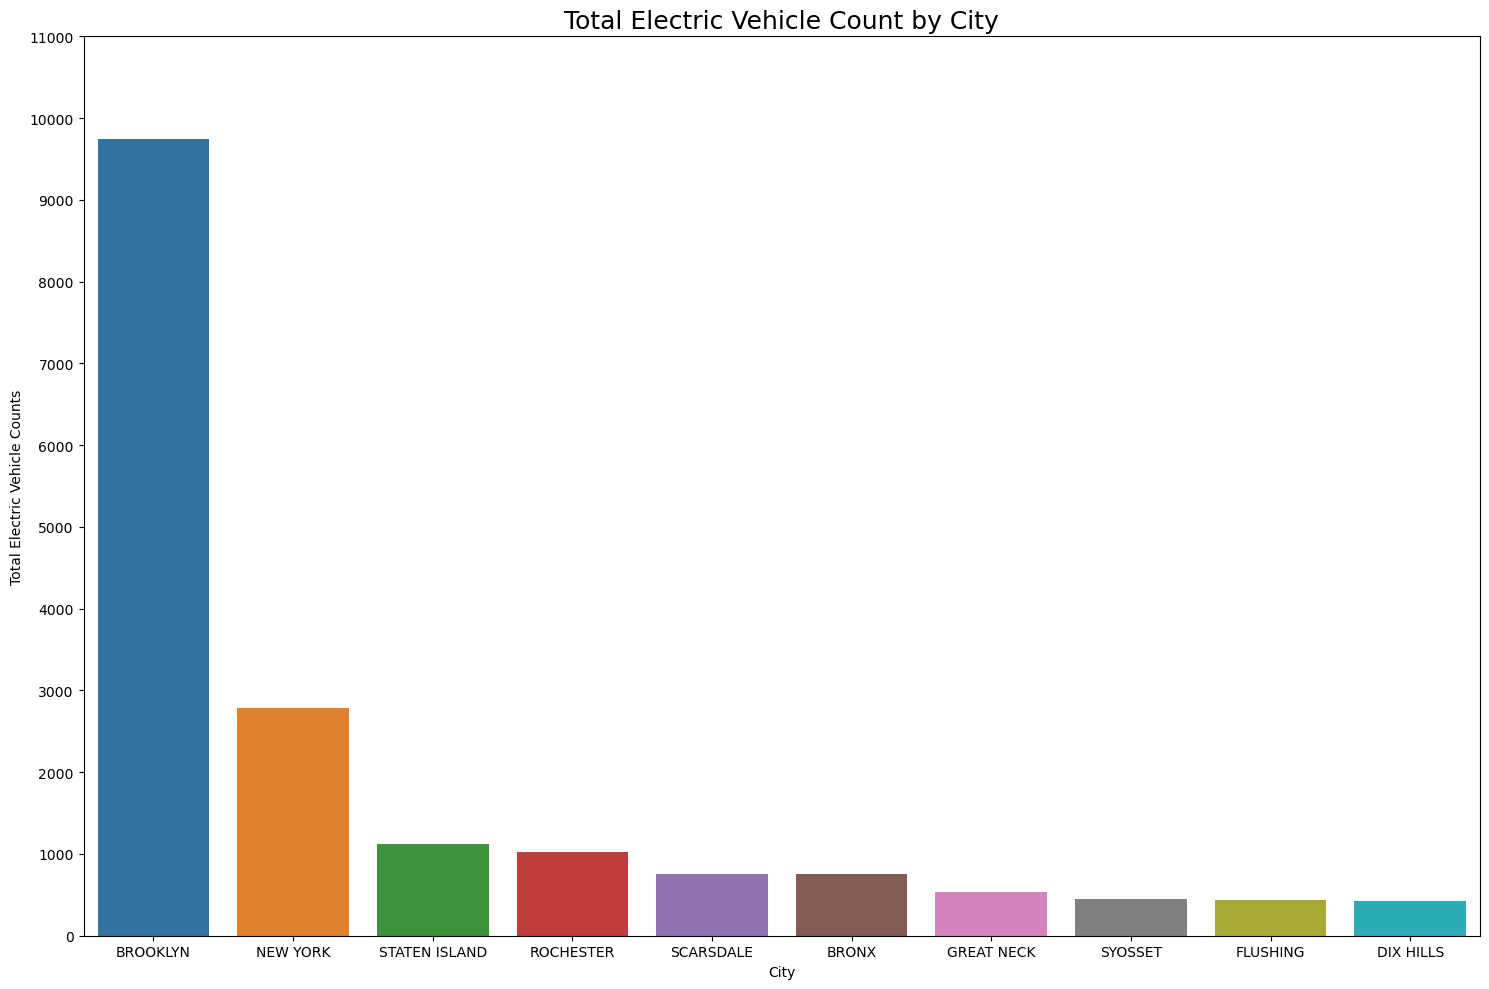

In [45]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='City', y='Total Counts', data=City_counts_10_df, ax=ax, label='City')
ax.set_xlabel('City')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Total Electric Vehicle Count by City',fontsize=18)
ax.set_yticks(range(0,12000,1000))
plt.tight_layout()
plt.savefig('Images/EV_Count_by_City.png', facecolor='white');

### Total Electric Vehicle Count by County over time (2015-2021)

In [46]:
County_counts_10= County_counts.head(10)
County_counts_10

KINGS          9879
NASSAU         7674
SUFFOLK        6665
WESTCHESTER    6586
QUEENS         3431
NEW YORK       3365
MONROE         2175
ERIE           1692
ROCKLAND       1215
RICHMOND       1122
Name: County, dtype: int64

In [47]:
# top 10 counties
top_10_county = ['KINGS', 'NASSAU','SUFFOLK','WESTCHESTER','QUEENS','NEW YORK','MONROE','ERIE','ROCKLAND','RICHMOND']

In [48]:
# Count the Electric Vehicle by County in each year
#filtering out counties to keep top 10
df_cumsum = df_cumsum.loc[:, ['Reg Valid Date', *top_10_county]]
df_cumsum.head()

Reg Valid Date  KINGS  NASSAU  SUFFOLK  WESTCHESTER  QUEENS  NEW YORK  \
0     2015-03-31    0.0     0.0        2          0.0     0.0       0.0   
1     2015-04-30    0.0     0.0        2          0.0     0.0       0.0   
2     2015-05-31    0.0     0.0        2          0.0     0.0      10.0   
3     2015-06-30    0.0     0.0        2          0.0     0.0      11.0   
4     2015-07-31    0.0     0.0        2          0.0     5.0      11.0   

   MONROE  ERIE  ROCKLAND  RICHMOND  
0     0.0   0.0       0.0       0.0  
1     0.0   0.0       0.0       0.0  
2     0.0   0.0       0.0       0.0  
3     0.0   0.0       0.0       0.0  
4     0.0   0.0       0.0       0.0

In [49]:
County_counts_10_df = pd.DataFrame(County_counts_10)
County_counts_10_df = County_counts_10_df.reset_index()
County_counts_10_df.columns = ['County','Total Counts']
County_counts_10_df.sort_values('Total Counts',ascending =True)
County_counts_10_df

County  Total Counts
0        KINGS          9879
1       NASSAU          7674
2      SUFFOLK          6665
3  WESTCHESTER          6586
4       QUEENS          3431
5     NEW YORK          3365
6       MONROE          2175
7         ERIE          1692
8     ROCKLAND          1215
9     RICHMOND          1122

In [50]:
# Create a mutiple-bar chart for the top 10 counties
fig, ax = plt.subplots(figsize=(15,13))
for county in top_10_county:
    sns.lineplot(x='Reg Valid Date', y=county, data=df_cumsum, ax=ax, 
                 label=county)

ax.set_xlabel('Year')
ax.set_ylabel('Electric Vehicle Counts')
ax.set_title('Total Electric Vehicle Count by County Over Time',fontsize=18)
ax.set_yticks(range(0,11000,500))
ax.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Images/EV_Count_by_County_Over_Time.png', facecolor='white');

## Most Purchased Car Models by County

In [51]:
# the top 10 counties based on the total counts of electric vehicle
County_counts_10_df

County  Total Counts
0        KINGS          9879
1       NASSAU          7674
2      SUFFOLK          6665
3  WESTCHESTER          6586
4       QUEENS          3431
5     NEW YORK          3365
6       MONROE          2175
7         ERIE          1692
8     ROCKLAND          1215
9     RICHMOND          1122

In [52]:
County_counts_df = pd.DataFrame(County_counts)
County_counts_df = County_counts_df.reset_index()
County_counts_df.columns = ['County','Total Counts']
County_counts_df.sort_values('Total Counts',ascending = False)
County_counts_10_df= County_counts_df.head(10)
County_counts_10_df

County  Total Counts
0        KINGS          9879
1       NASSAU          7674
2      SUFFOLK          6665
3  WESTCHESTER          6586
4       QUEENS          3431
5     NEW YORK          3365
6       MONROE          2175
7         ERIE          1692
8     ROCKLAND          1215
9     RICHMOND          1122

In [53]:
# Top 10 County
top_10_county = ['KINGS', 'NASSAU','SUFFOLK','WESTCHESTER','QUEENS','NEW YORK','MONROE','ERIE','ROCKLAND','RICHMOND']


### Most Purchased Models in King County (Top 6)

In [54]:
County_model_counts_df=NYS_registrations_df[['County','Registration year','Make']]
County_model_counts_df.head()

County Registration year    Make
Reg Valid Date                                    
2021-12-09         KINGS              2021  TOYOTA
2021-11-16       SUFFOLK              2021  TOYOTA
2021-10-19          ERIE              2021   MANIT
2021-08-11      RICHMOND              2021   HONDA
2021-12-28       SUFFOLK              2021   TESLA

In [55]:
Kings_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'KINGS')]
Kings_model_counts = Kings_counts_df.Make.value_counts()
Kings_model_counts

NIU              6877
TESLA            2428
CHEVROLET         119
HYUNDAI            89
SMART              52
NISSAN             46
FORD               35
AUDI               33
BMW                29
VOLKSWAGEN         28
KIA                27
INTERNATIONAL      12
ZERO EV            12
HINO               11
YALE                9
PORSCHE             9
VOLVO               6
POLESTAR            6
MINI                6
GENESIS             5
HONDA               3
TOYOTA              3
PIAGGIO             3
CUSTO               2
RIVIAN              2
GENZE               2
CRUS                2
FIAT                2
ICBUS               2
JAGUAR              1
DOOSA               1
AMPER               1
SUBARU              1
HA/DA               1
ZEV                 1
ALTA                1
AZURE               1
GE/SC               1
MITSUBISHI          1
KUMPA               1
JIAJ                1
ETUK                1
CSC                 1
BAODI               1
CY/TR               1
LEXUS     

In [56]:
Kings_model_counts_df = pd.DataFrame(Kings_model_counts)
Kings_model_counts_6_df = Kings_model_counts_df .reset_index().head(6)
Kings_model_counts_6_df.columns = ['Model','Total Counts']
Kings_model_counts_6_df

Model  Total Counts
0        NIU          6877
1      TESLA          2428
2  CHEVROLET           119
3    HYUNDAI            89
4      SMART            52
5     NISSAN            46

In [57]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Kings_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in KINGS County (2015-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_King.png', facecolor='white');

### Most Purchased Models in Nassau County (Top 6)

In [58]:
Nassau_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'NASSAU')]
Nassau_model_counts = Nassau_counts_df.Make.value_counts()
#Nassau_model_counts

In [59]:
Nassau_model_counts_df = pd.DataFrame(Nassau_model_counts)
Nassau_model_counts_6_df = Nassau_model_counts_df .reset_index().head(6)
Nassau_model_counts_6_df.columns = ['Model','Total Counts']
Nassau_model_counts_6_df

Model  Total Counts
0      TESLA          6255
1    HYUNDAI           406
2       FORD           190
3    PORSCHE           153
4  CHEVROLET           151
5       AUDI           108

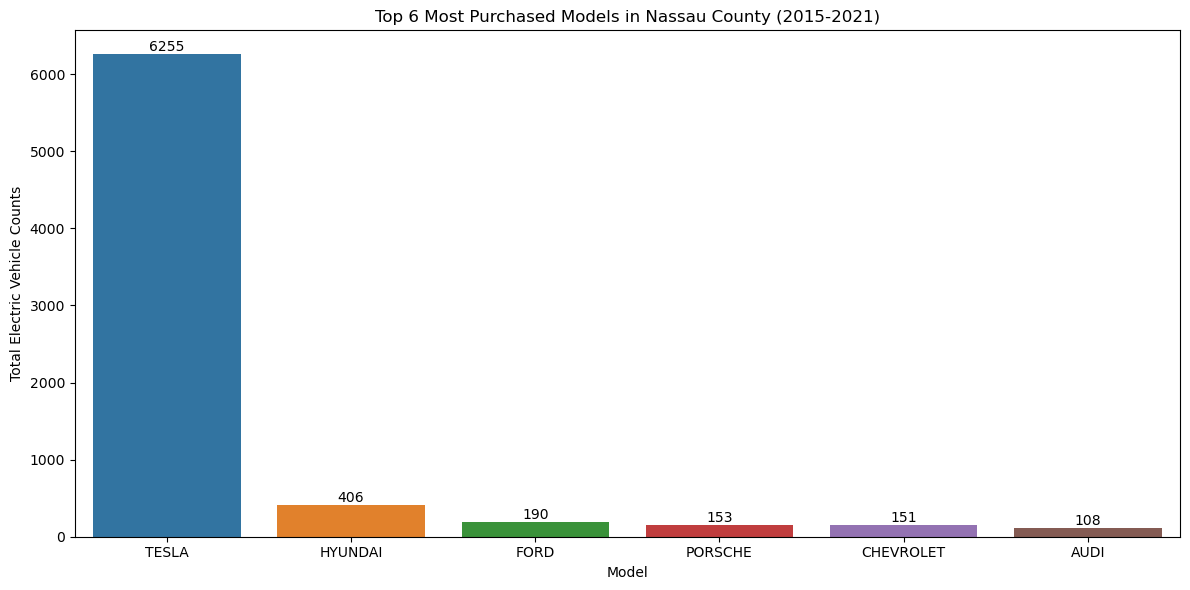

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Nassau_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Nassau County (2015-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Nassau.png', facecolor='white');

### Most Purchased Models in Suffolk County (Top 6)

In [61]:
Suffolk_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'SUFFOLK')]
Suffolk_model_counts = Suffolk_counts_df.Make.value_counts()
#Suffolk_model_counts

In [62]:
Suffolk_model_counts_df = pd.DataFrame(Suffolk_model_counts)
Suffolk_model_counts_6_df = Suffolk_model_counts_df .reset_index().head(6)
Suffolk_model_counts_6_df.columns = ['Model','Total Counts']
Suffolk_model_counts_6_df

Model  Total Counts
0      TESLA          5070
1    HYUNDAI           419
2  CHEVROLET           225
3       FORD           190
4     NISSAN           160
5    PORSCHE            94

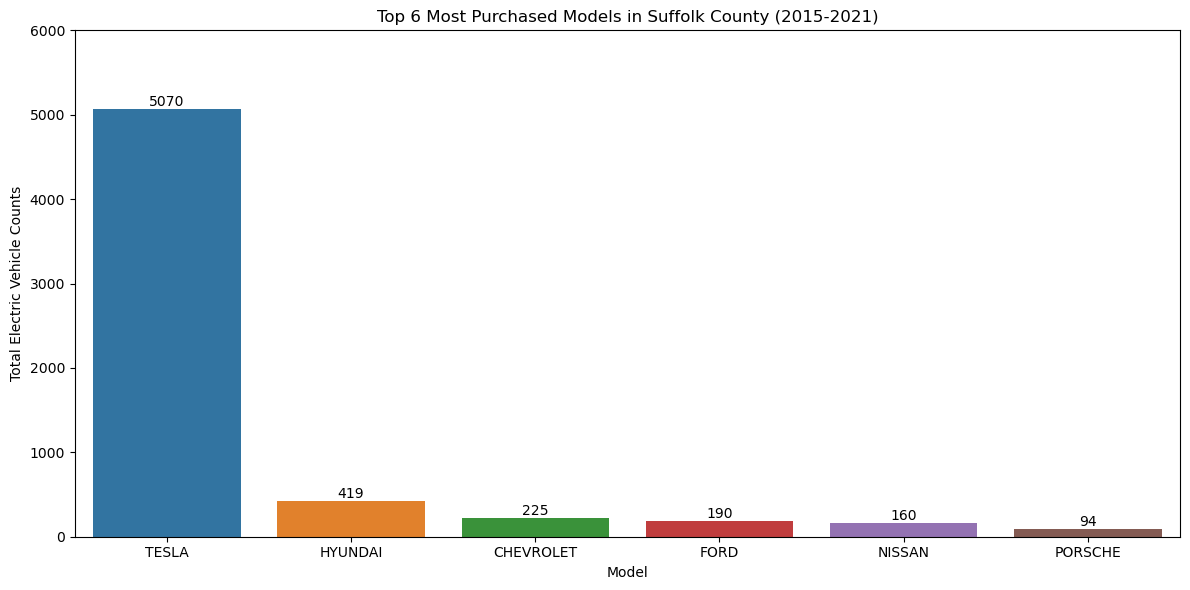

In [63]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Suffolk_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Suffolk County (2015-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Suffolk.png', facecolor='white');

### Most Purchased Models in Westchester County (Top 6)

In [64]:
Westchester_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'WESTCHESTER')]
Westchester_model_counts = Westchester_counts_df.Make.value_counts()
#Westchester_model_counts

In [65]:
Westchester_model_counts_df = pd.DataFrame(Westchester_model_counts)
Westchester_model_counts_6_df = Westchester_model_counts_df .reset_index().head(6)
Westchester_model_counts_6_df.columns = ['Model','Total Counts']
Westchester_model_counts_6_df

Model  Total Counts
0      TESLA          5203
1  CHEVROLET           243
2     NISSAN           189
3    HYUNDAI           163
4       FORD           149
5       AUDI           115

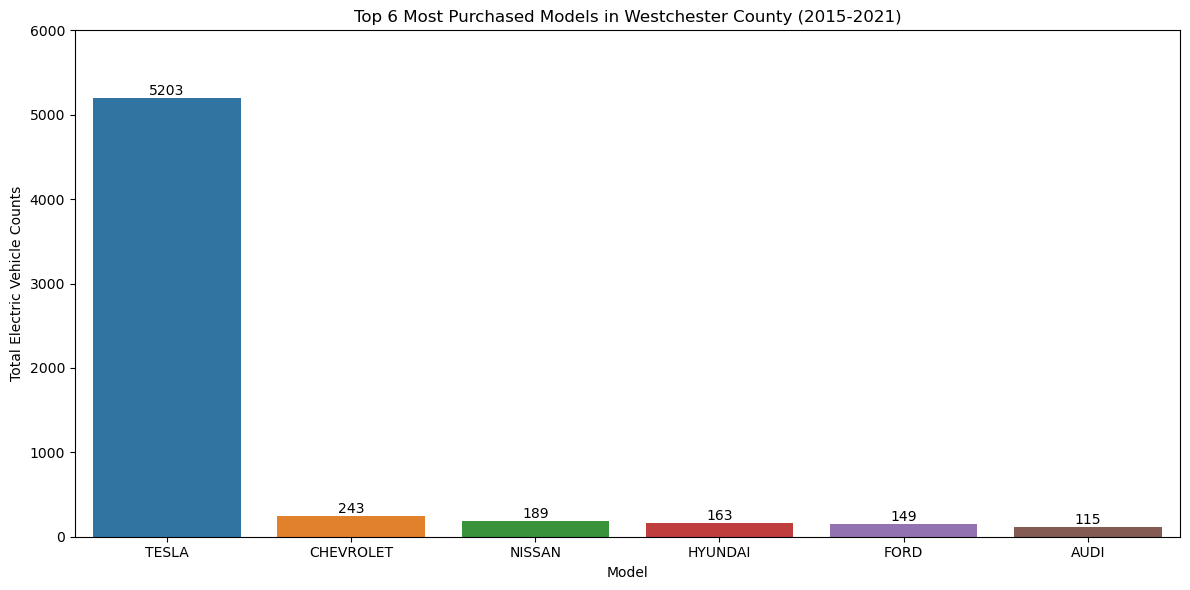

In [66]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Westchester_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Westchester County (2015-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Westchester.png', facecolor='white');

### Most Purchased Models in Queens County (Top 6)

In [67]:
Queens_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'QUEENS')]
Queens_model_counts = Queens_counts_df.Make.value_counts()
#Queens_model_counts

In [68]:
Queens_model_counts_df = pd.DataFrame(Queens_model_counts)
Queens_model_counts_6_df = Queens_model_counts_df .reset_index().head(6)
Queens_model_counts_6_df.columns = ['Model','Total Counts']
Queens_model_counts_6_df

Model  Total Counts
0      TESLA          2649
1  CHEVROLET           243
2    HYUNDAI           114
3     NISSAN           110
4       FORD            73
5        KIA            49

In [69]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Queens_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Queens County (2015-2021)')
ax.set_yticks(range(0,4000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Queens.png', facecolor='white');

### Most Purchased Models in New York County (Top 6)

In [71]:
New_York_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'NEW YORK')]
New_York_model_counts = New_York_counts_df.Make.value_counts()
#New_York_model_count

In [72]:
New_York_model_counts_df = pd.DataFrame(New_York_model_counts)
New_York_model_counts_6_df = New_York_model_counts_df.reset_index().head(6)
New_York_model_counts_6_df.columns = ['Model','Total Counts']
New_York_model_counts_6_df

Model  Total Counts
0      TESLA          2528
1  CHEVROLET           214
2     NISSAN           136
3      EL/SM            77
4    PORSCHE            59
5       AUDI            47

In [73]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=New_York_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in New York County (2015-2021)')
ax.set_yticks(range(0,4000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_New_York.png', facecolor='white');

### Most Purchased Models in Monroe County (Top 6)

In [74]:
Monroe_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'MONROE')]
Monroe_model_counts = Monroe_counts_df.Make.value_counts()
#Monroe_model_counts

In [75]:
Monroe_model_counts_df = pd.DataFrame(Monroe_model_counts)
Monroe_model_counts_6_df = Monroe_model_counts_df.reset_index().head(6)
Monroe_model_counts_6_df.columns = ['Model','Total Counts']
Monroe_model_counts_6_df

Model  Total Counts
0      TESLA          1014
1  CHEVROLET           316
2     NISSAN           253
3    HYUNDAI           222
4        KIA            74
5       FORD            74

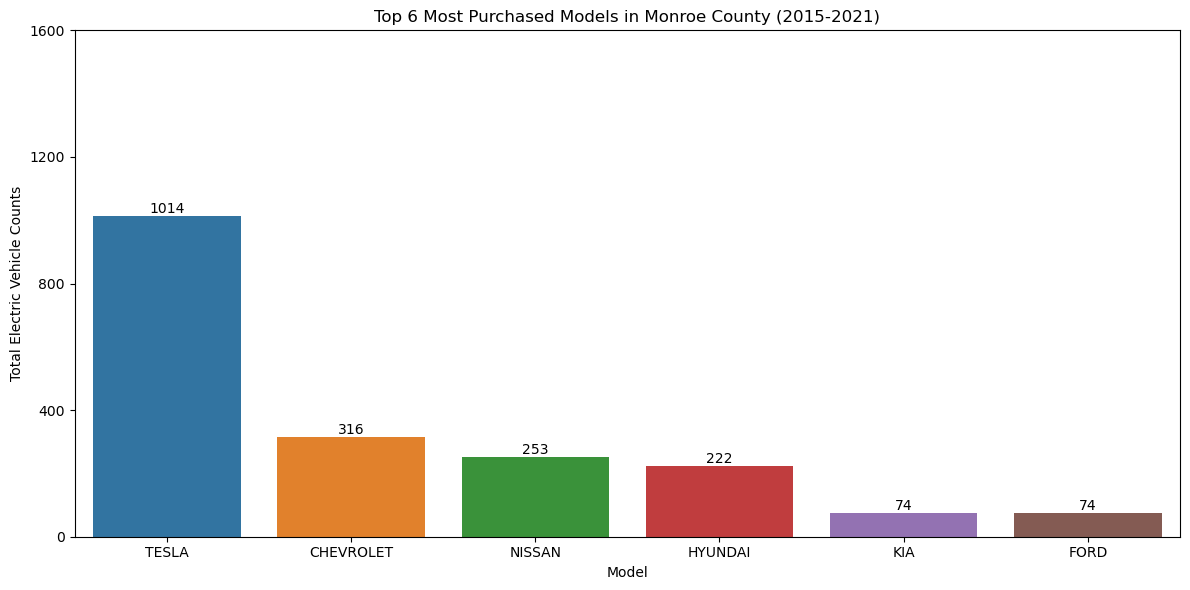

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Monroe_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Monroe County (2015-2021)')
ax.set_yticks(range(0,2000,400))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Monroe.png', facecolor='white');

### Most Purchased Models in Erie County (Top 6)

In [77]:
Erie_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'ERIE')]
Erie_model_counts = Erie_counts_df.Make.value_counts()
#Erie_model_counts

In [78]:
Erie_model_counts_df = pd.DataFrame(Erie_model_counts)
Erie_model_counts_6_df = Erie_model_counts_df.reset_index().head(6)
Erie_model_counts_6_df.columns = ['Model','Total Counts']
Erie_model_counts_6_df

Model  Total Counts
0       TESLA           832
1     HYUNDAI           286
2   CHEVROLET           180
3      NISSAN           109
4        FORD           107
5  VOLKSWAGEN            30

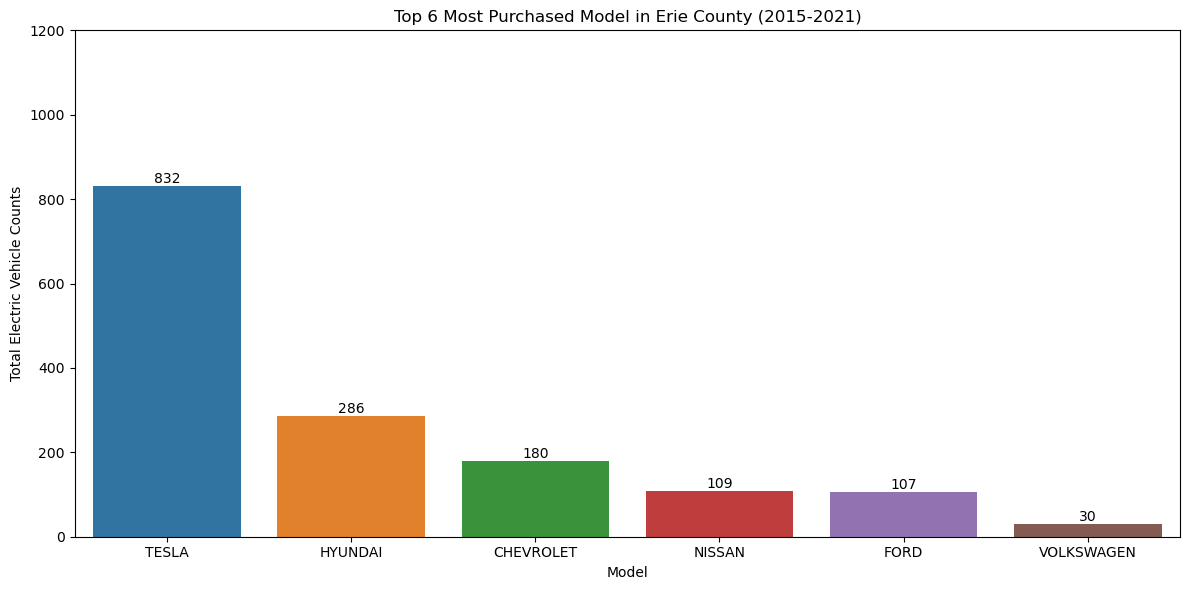

In [79]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Erie_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Erie County (2015-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Erie.png', facecolor='white');

### Most Purchased Models in Rockland County (Top 6)

In [80]:
Rockland_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'ROCKLAND')]
Rockland_model_counts = Rockland_counts_df.Make.value_counts()
#Rockland_model_counts

In [81]:
Rockland_model_counts_df = pd.DataFrame(Rockland_model_counts)
Rockland_model_counts_6_df = Rockland_model_counts_df.reset_index().head(6)
Rockland_model_counts_6_df.columns = ['Model','Total Counts']
Rockland_model_counts_6_df

Model  Total Counts
0      TESLA           904
1    HYUNDAI           100
2       FORD            48
3     NISSAN            38
4  CHEVROLET            38
5        KIA            18

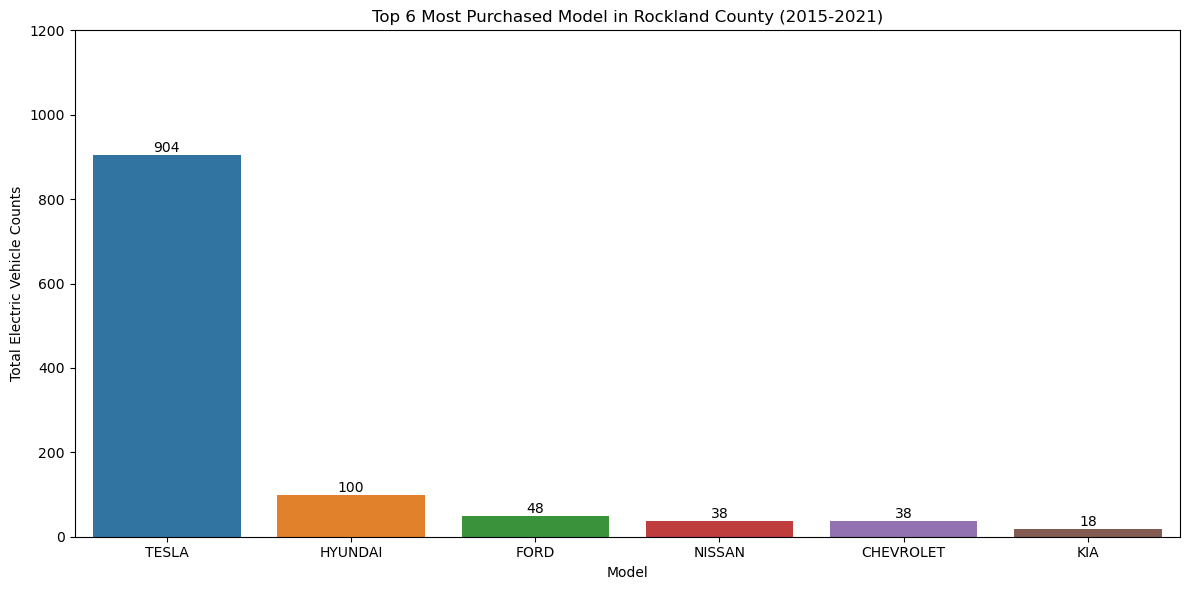

In [82]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Rockland_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Rockland County (2015-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Rockland.png', facecolor='white');

### Most Purchased Models in Richmond County (Top 6)

In [83]:
Richmond_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'RICHMOND')]
Richmond_model_counts = Richmond_counts_df.Make.value_counts()
#Richmond_model_counts

In [84]:
Richmond_model_counts_df = pd.DataFrame(Richmond_model_counts)
Richmond_model_counts_6_df = Richmond_model_counts_df.reset_index().head(6)
Richmond_model_counts_6_df.columns = ['Model','Total Counts']
Richmond_model_counts_6_df

Model  Total Counts
0       TESLA           853
1     HYUNDAI            90
2        FORD            43
3   CHEVROLET            22
4      NISSAN            18
5  VOLKSWAGEN            13

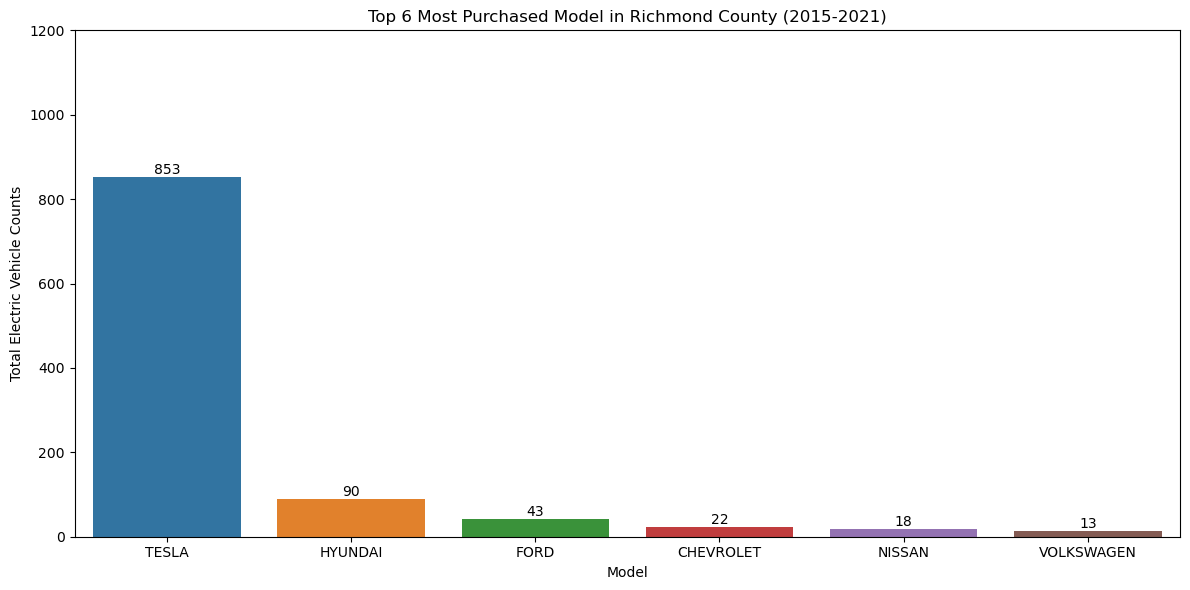

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Richmond_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Richmond County (2015-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Richmond.png', facecolor='white');

# MODEL

## Preprocessing/ Defining Functions

In [86]:
df_cumsum = df_cumsum.set_index('Reg Valid Date').resample('M').asfreq()

In [87]:
df_cumsum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2015-03-31 to 2021-12-31
Freq: M
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KINGS        82 non-null     float64
 1   NASSAU       82 non-null     float64
 2   SUFFOLK      82 non-null     int64  
 3   WESTCHESTER  82 non-null     float64
 4   QUEENS       82 non-null     float64
 5   NEW YORK     82 non-null     float64
 6   MONROE       82 non-null     float64
 7   ERIE         82 non-null     float64
 8   ROCKLAND     82 non-null     float64
 9   RICHMOND     82 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 7.0 KB


### Separating Data for Each County


In the first part of project, we aim to predict the demand for electric vehicles in each county in New York state and based on that find the top 3 counties to invest for setting EV chargers. In this part, we used a time series modeling of the amount of electric vehicles in the top 6 counties within New York state with the most purchases of new electric vehicles. To this end, We will be creating time series models for the top 6 counties. So we need to have smaller dataframe for each of the top 6 counties.

#### Creating Function to seperate data for each county

This function separates the given dataframe by county and returns the separated dataframe.

In [88]:
def separate_data_by_county(county, df):
 
    
    df_county = pd.DataFrame(df.loc[:, county])
    df_county.columns=["EV's on the Road"]
    df_county.head()
    return df_county

In [89]:
#separating data by county and parsing this information to a dictionary
county_information = {}
for county in top_10_county:
    county_information[county] = {}
    county_information[county]['df']=separate_data_by_county(county, df_cumsum)

In [90]:
#separating data by county and parsing this information to a dictionary
county_dfs = {}
for county in top_10_county:
    county_dfs[county] = separate_data_by_county(county, df_cumsum)

#### Creating Function to Evaluate the models
Before modelling, one of the functions we will need is a function that will show us the various statistics so that we can evaluate the performance of the model. Function returns the model summary and diagnostics information to aid the evaluation of the given model's performance. We use SARIMAX or ARIMA model object.

In [91]:
def evaluate_model(model):
    
    display(model.summary())
    model.plot_diagnostics()
    plt.tight_layout();

#### Creating a Function for train_test_split & plotting
We will be splitting the time series into two: a training set and a testing set. This will allow us to validate the performance of the models. It should be noted that , based on the "Electrical Vehicle on the Road" vs "Time" graphs, we will change the train and test sizes

In [92]:
def train_test_split_ts (df, train_size, test_size):
    
    train_end_idx = int(round(len(df)*train_size,0))
    train_set = df.iloc[0:train_end_idx,:]["EV's on the Road"]
    test_set = df.iloc[train_end_idx:,:]["EV's on the Road"]
    return train_set, test_set

#### Creating Function to visualize the Training and Testing Data for Visual Inspection
This function was created to plot the trainig and testing data

In [93]:
def plot_train_test_split(train_data, test_data, county):
     
    train_data.plot(label='Train Data')
    test_data.plot(label='Test Data')
    ax=plt.gca()
    ax.set_xlabel('Year')
    ax.set_ylabel('Electric Vehicles on the Road')
    ax.set_title(f'Electric Vehicles on the Road in {county} County')
    ax.legend();

#### Creating a Function for Getting Forecasts
To validate the model,  we will be getting the forecast from our model for the test period and will be plotting it against the actual test data. This function will gets forecasted values from a given model and plots within the same time frame for the visual inspection.  The length of the test data will dictate the length of the forecasts. We will save the forecasted values in a DataFrame format.

In [94]:
def get_forecast(model, train_data, test_data, plot=True):
    
    
    #creating a df with the forecast information
    forecast_df = model.get_forecast(steps=len(test_data)).conf_int()
    forecast_df.columns = ['Lower Confidence Interval', 
                              'Upper Confidence Interval']
    forecast_df['Forecasts'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-whitegrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=train_data, color='black', ax=ax)
            sns.lineplot(data=forecast_df, x=forecast_df.index, 
                         y='Forecasts', color='blue', ax=ax, 
                         label='Forecasted Data', ls='--')
            sns.lineplot(data=test_data, color='purple', ax=ax, 
                         label='Actual Data', ls='-.')
            ax.fill_between(forecast_df.index, 
                            y1=forecast_df['Lower Confidence Interval'], 
                            y2=forecast_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3, 
                            label='Confidence Interval')
            ax.set_xlabel('Year')
            ax.legend(loc=2)
            plt.show();
    return forecast_df

#### Defining a Function for Getting Predictions for Future
The last function to predict and visualize. This function will get predicted values from a given model and visualize themThe length of the predictions are dependent on the length of the test data. The forecasted values will be saved in  DataFrame format.

In [95]:
def get_prediction(model, df, test_data, county_name, plot=True):
    

    
    #creating a df with the prediction information
    prediction_df = model.get_forecast(steps=len(test_data)).conf_int()
    prediction_df.columns = ['Lower Confidence Interval', 
                              'Upper Confidence Interval']
    prediction_df['Predictions'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-whitegrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=df, ax=ax)
            sns.lineplot(data=prediction_df, x=prediction_df.index, 
                         y='Predictions', color='orange', ax=ax, 
                         label='Predicted Data', ls='--')
            ax.fill_between(prediction_df.index, 
                            y1=prediction_df['Lower Confidence Interval'], 
                            y2=prediction_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3, 
                            label='Confidence Interval')
            ax.set_xlabel('Year')
            ax.set_ylabel('Electric Vehicles on the Road')
            ax.set_title(f'Predicted Electric Vehicle Count for {county_name}')
            plt.show();
    return prediction_df

# KINGS
### Seasonality Check
For a better understanding of the trend and seasonality components of the data, it is important to decompose it prior to modeling.

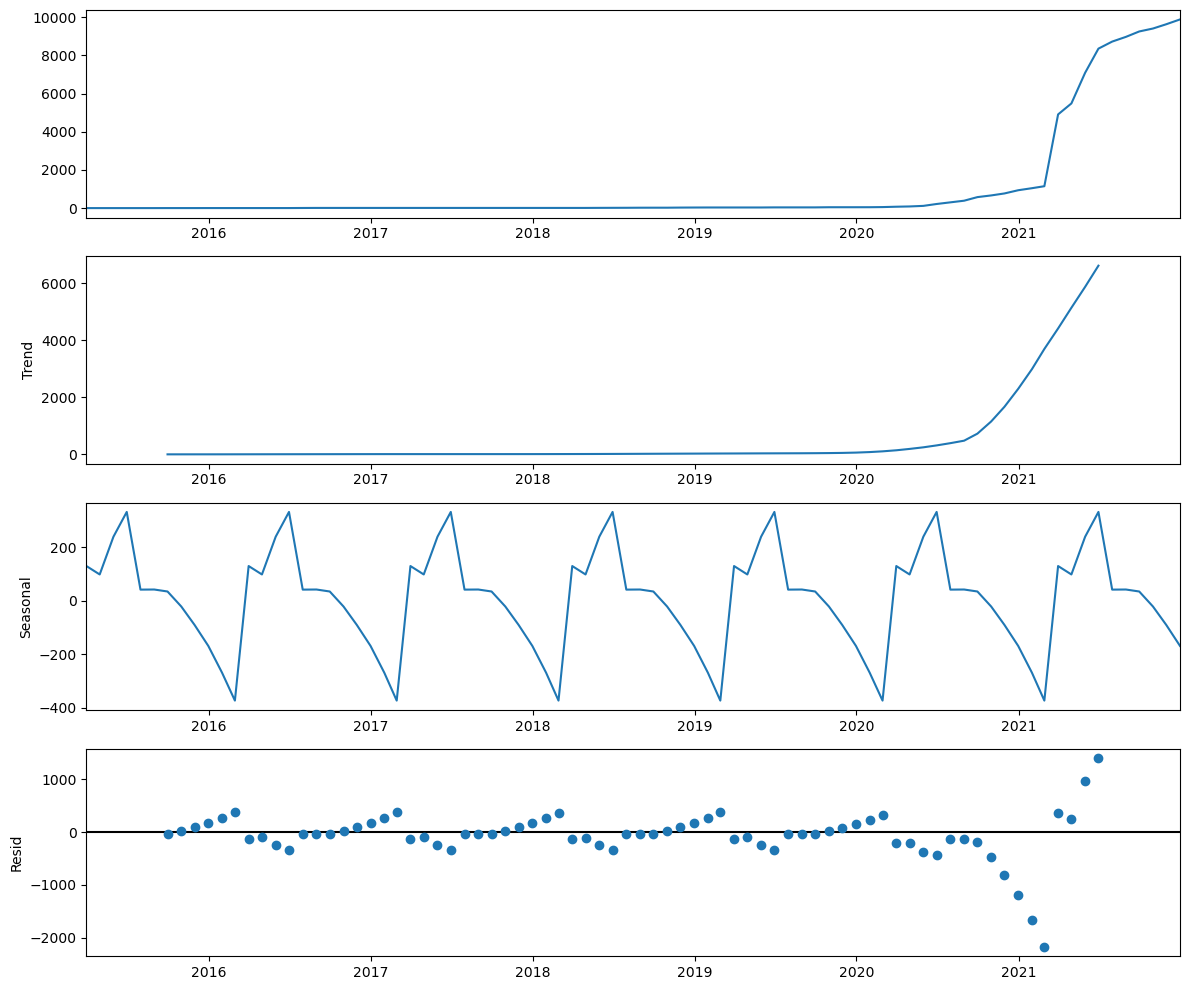

In [96]:
import statsmodels.tsa.api as tsa

plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['KINGS']['df'])
decomp.plot();

The results showed that the electric vehicle has an ascending trend and the data showed seasonality pattern. 

### train_test_split
After multiple iterations, we found that the best performance was achieved when we split the data belonging to the kings in the 0.85-0.15 split.

In [253]:
#splitting dataset into train and test sets for validation
train_KINGS, test_KINGS = train_test_split_ts(county_information['KINGS']['df'], 
                                            0.85, 0.15)

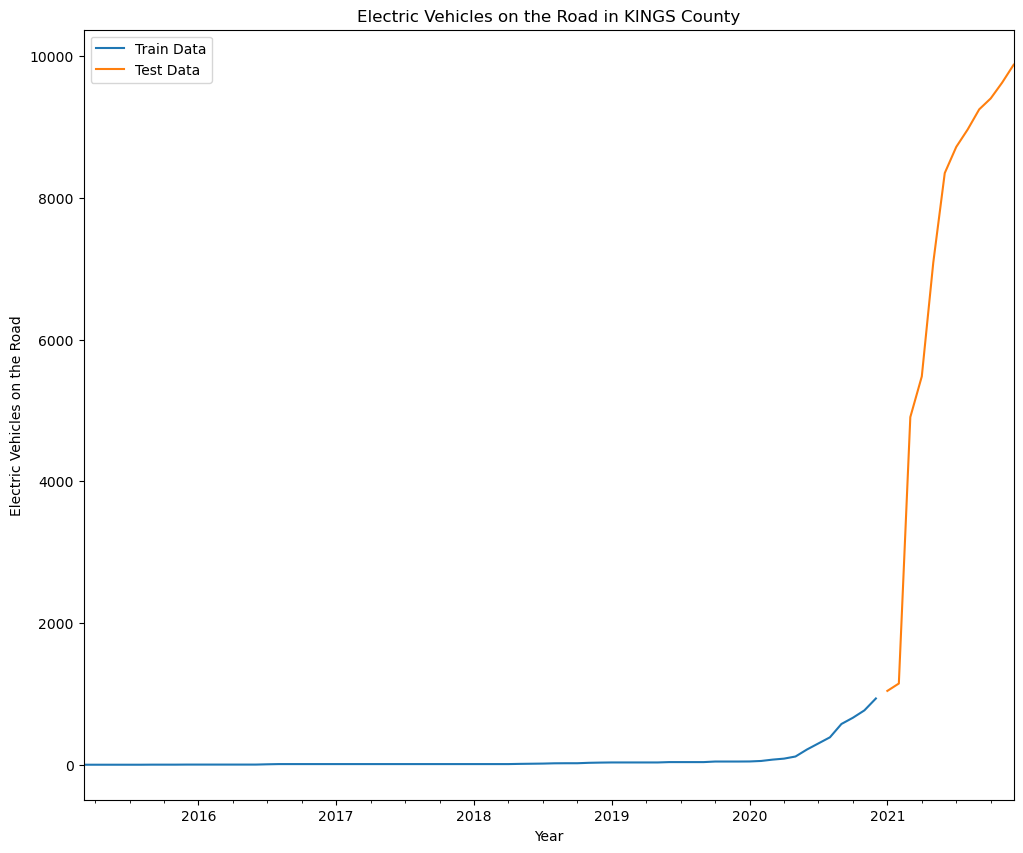

In [254]:
#plotting the split
plot_train_test_split(train_KINGS, test_KINGS, 'KINGS')

### Finding Best Parameters with Auto-Arima


The pmdarima library will be used to automate the optimization of the p,d,q values for each county and the validation of the models.

In [255]:
import pmdarima as pm

In [256]:
auto_model = pm.auto_arima(train_KINGS, start_p=0, d=1, start_q=0, max_p=4, 
                           max_d=3, max_q=4, start_P=0, start_Q=0, max_P=3, 
                           max_D=3, max_Q=3, m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -303.056
Date:                Sat, 19 Nov 2022   AIC                            612.113
Time:                        16:50:46   BIC                            618.815
Sample:                    03-31-2015   HQIC                           614.772
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9907      0.018     56.257      0.000       0.956       1.025
ma.L1         -0.4178      0.063     -6.636      0.000      -0.541      -0.294
sigma2       365.5371     23.037     15.868      0.000     320.386     410.688
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):               864.38
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):             904.11   Skew:                             3.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (1,1,1) without the seasonal component. After plugging these into a SARIMAX model, we will have our final model, which we will then validate based on forecasts and the test data.

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                   70
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -288.792
Date:                Sat, 19 Nov 2022   AIC                            583.585
Time:                        16:51:22   BIC                            590.199
Sample:                    03-31-2015   HQIC                           586.202
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1424      0.024     48.588      0.000       1.096       1.188
ma.L1         -0.6684      0.070     -9.543      0.000      -0.806      -0.531
sigma2       323.5878     19.836     16.313      0.000     284.710     362.466
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               606.97
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):             662.34   Skew:                             1.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

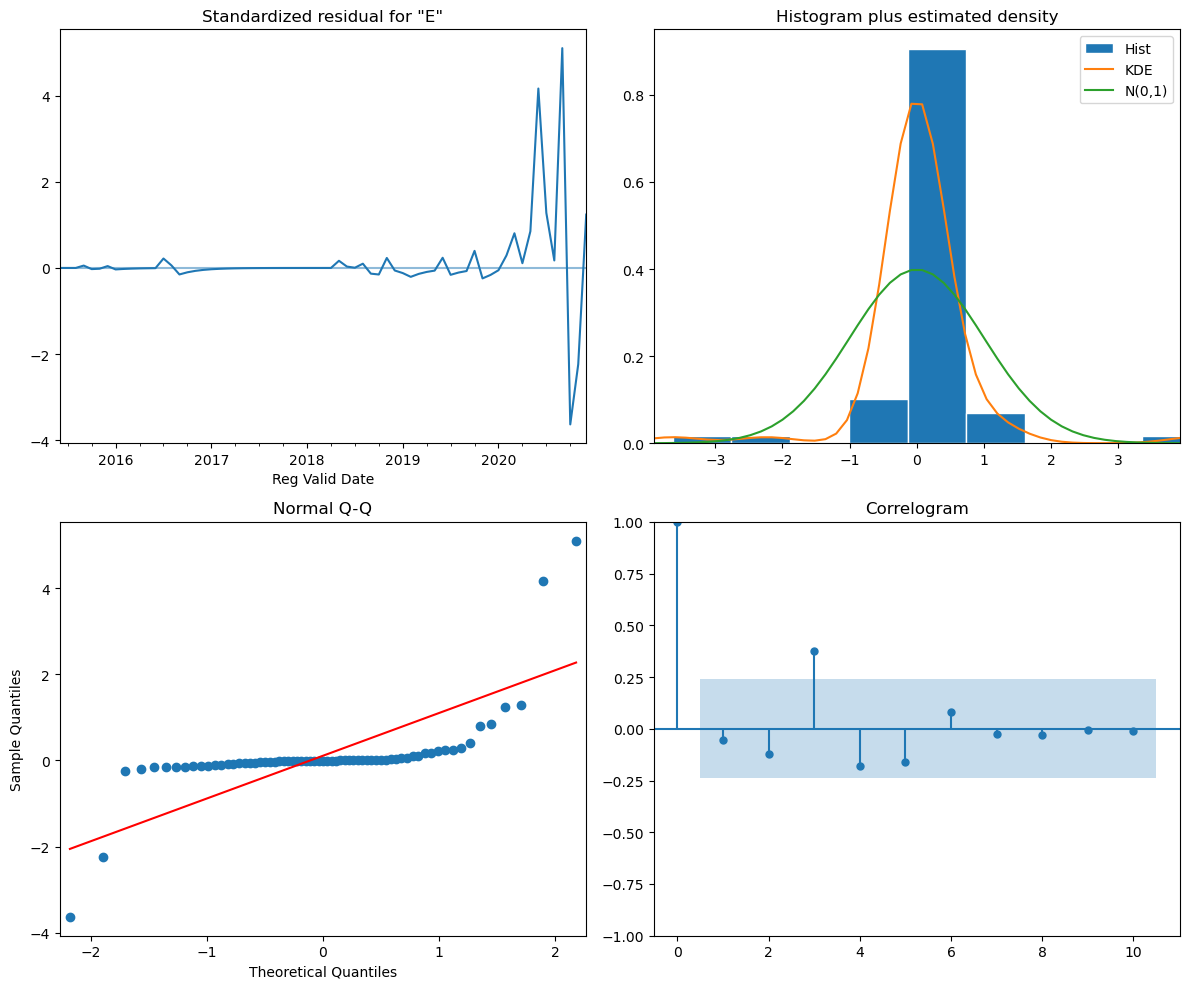

In [257]:
model = SARIMAX(train_KINGS, order=(1,1,1),
                enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

The results showed that the electric vehicle has an ascending trend and the data showed seasonality pattern. 

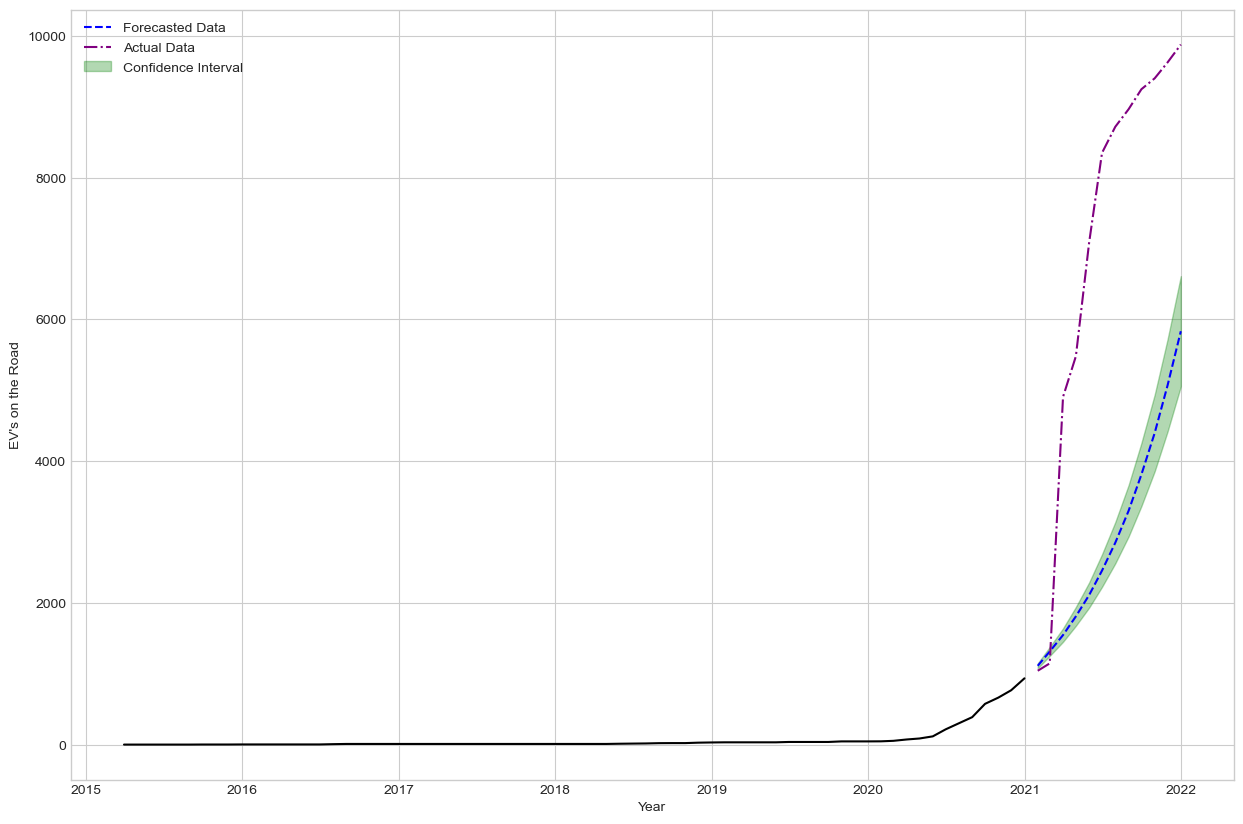

In [258]:
df_king_forecast = get_forecast(model, train_KINGS, test_KINGS, plot=True)

Above, we can see that the model is not able to accurately forecast data into the future. The actual observed data is not within the confidence interval of our model's forecasts. This is mainly due to the fact that major part of the trained data deal in the linear part of time-series. while, as of 2020, the trend of EV vehicle followed an exponential pattern. We need to reduce the time period to achive more acurate information for the KINGS county.

### Future Predictions
#### Fitting Model to All Observed Data
Now that we know that our model can approximately make predictions about the future electric vehicle counts in each county, we can use the same parameters to build a model on the whole observed dataset without splitting it into train/test sets.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                   82
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -592.542
Date:                Sat, 19 Nov 2022   AIC                           1191.085
Time:                        16:52:46   BIC                           1198.193
Sample:                    03-31-2015   HQIC                          1193.933
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8610      0.155      5.541      0.000       0.556       1.166
ma.L1         -0.5926      0.232     -2.549      0.011      -1.048      -0.137
sigma2      1.911e+05   6009.679     31.797      0.000    1.79e+05    2.03e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):             12254.63
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):          607759.72   Skew:                             7.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        62.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

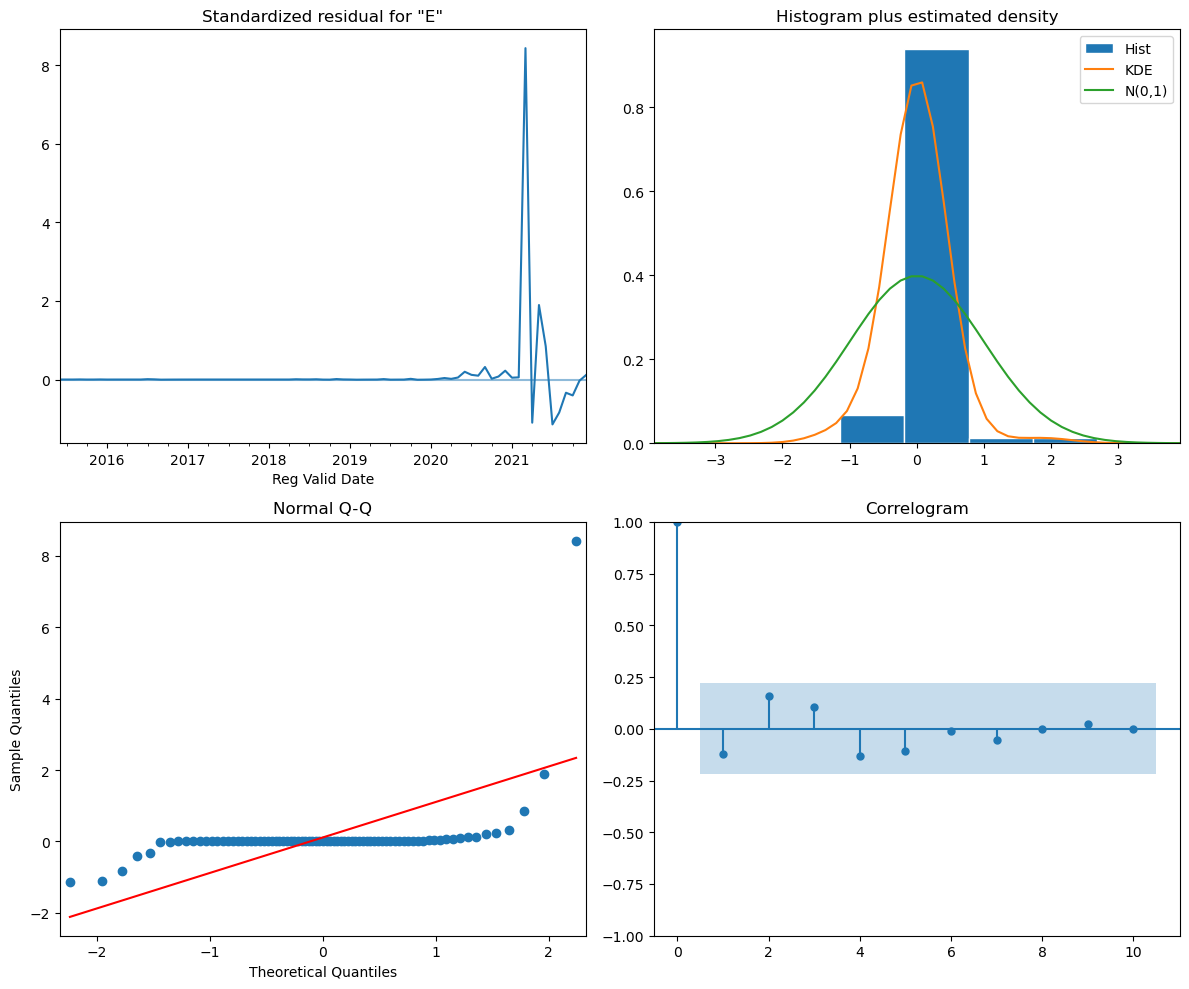

In [259]:
model = SARIMAX(county_information['KINGS']['df'], order=(1, 1, 1), 
                enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

Above we can see that the residuals for this model are less normally distributed compared to the test model. Additionally, there is no longer an obvious seasonality based on the correlogram and the standardized residuals. The coefficient p-values also suggest that they are statistically significant.

#### Plotting & Saving Predictions
Using our model, we can predict the future counts of electric vehicles in KINGS County and plot them. 

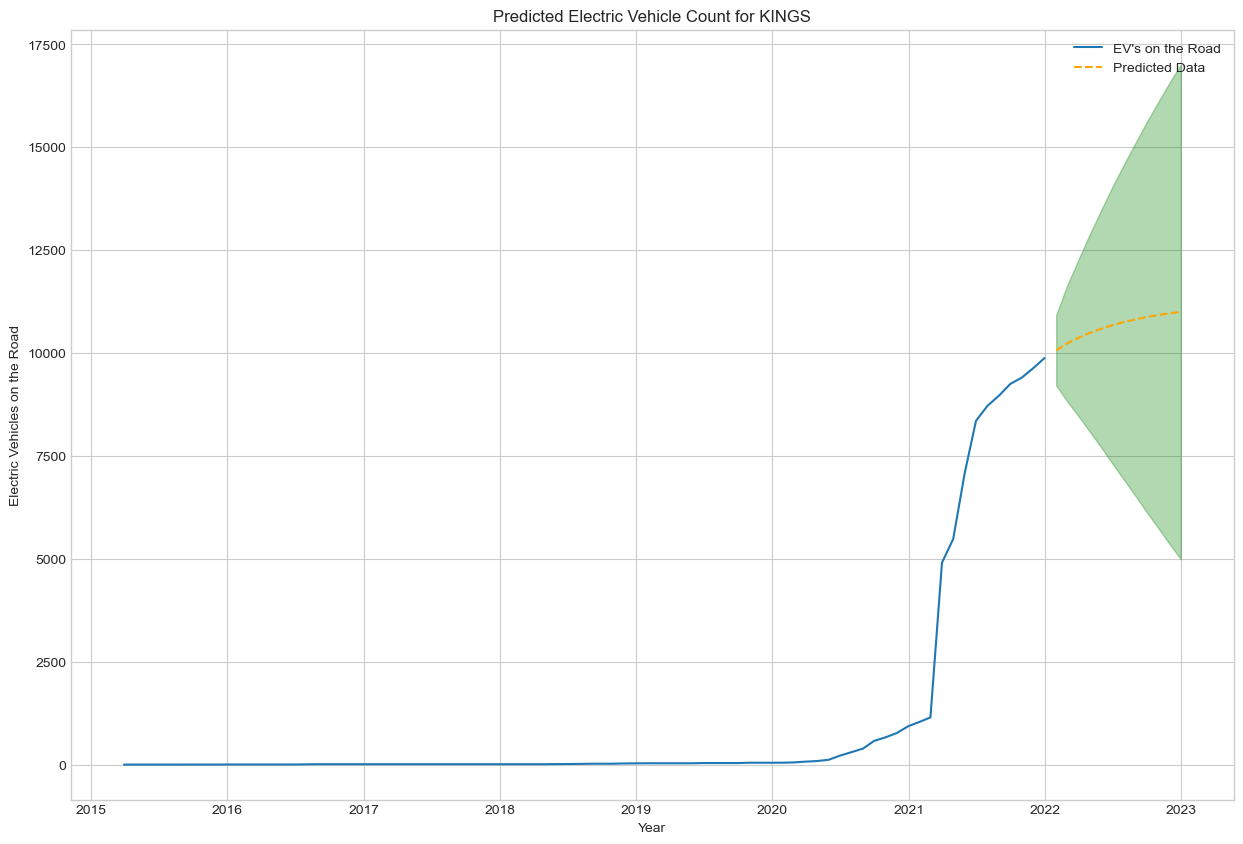

In [260]:
#creating a df of predictions and plotting
df_KINGS_preds = get_prediction(model, county_information['KINGS']['df'], 
                               test_KINGS, 'KINGS', plot=True)

The model is predicting that the amount of electric vehicles in KINGS County are going to keep increasing almost linearly at a slower rate ,based on the mean values, However, If we look at the upper confidence interval , we can see that the increase could follow an exponential pattern.

In [261]:
#saving predictions df to dict for later use
county_information['KINGS']['Predictions'] = df_KINGS_preds


In [262]:
df_KINGS_preds.tail()

Lower Confidence Interval  Upper Confidence Interval   Predictions
2022-08-31                6533.544103               15098.792761  10816.168432
2022-09-30                6141.007703               15604.079229  10872.543466
2022-10-31                5752.109023               16090.058971  10921.083997
2022-11-30                5368.085880               16557.671710  10962.878795
2022-12-31                4989.848334               17007.882311  10998.865323

# NASSAU
### Seasonality Check

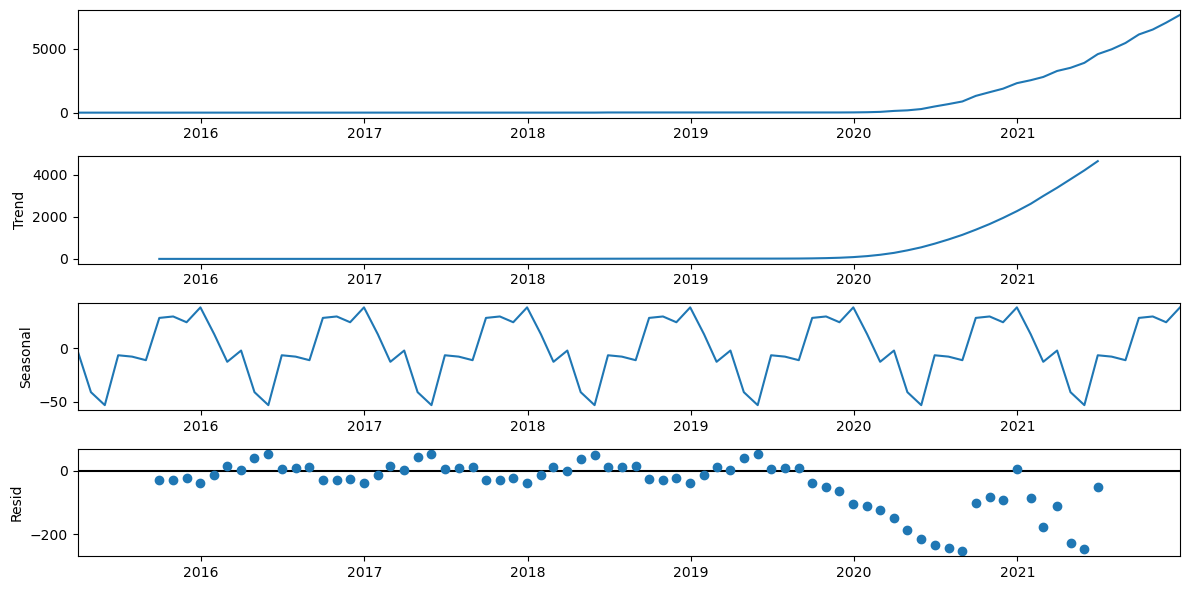

In [263]:
plt.rcParams['figure.figsize']=(12,6)
decomp = tsa.seasonal_decompose(county_information['NASSAU']['df'])
decomp.plot();

The results showed that the electric vehicle has an ascending trend and the data showed seasonality pattern. 

### train_test_split
After multiple iterations, we found that the 0.85-0.15 split of the data belonging to NASSAU County resulted in the best performance.

In [264]:
#splitting dataset into train and test sets for validation
train_NASSAU, test_NASSAU = train_test_split_ts(county_information['NASSAU']['df'], 
                                            0.85, 0.15)

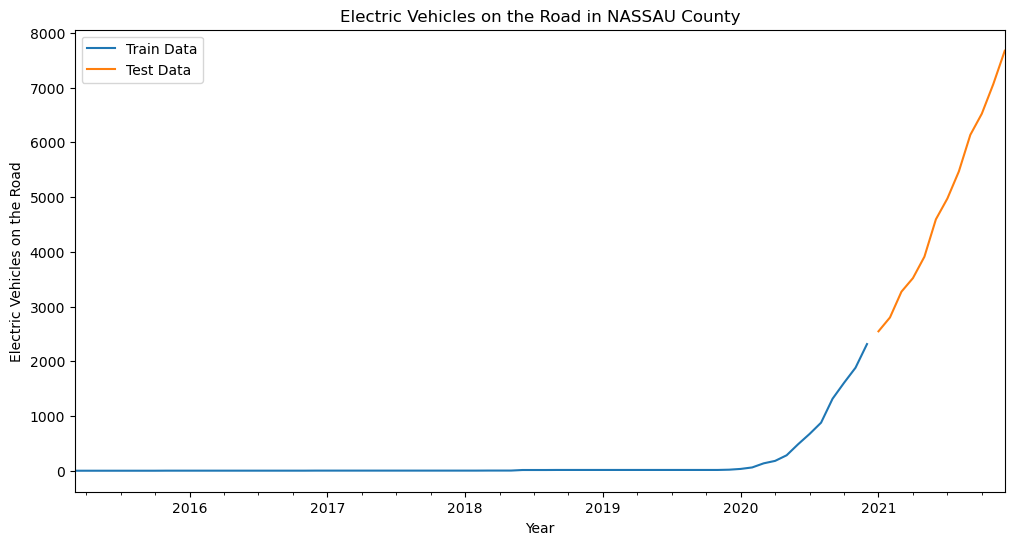

In [265]:
#plotting train and test sets
plot_train_test_split(train_NASSAU, test_NASSAU, 'NASSAU')

### Finding Best Parameters with Auto-Arima

In [266]:
auto_model = pm.auto_arima(train_NASSAU, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   70
Model:             SARIMAX(1, 1, 4)x(0, 1, [], 12)   Log Likelihood                -279.420
Date:                             Sat, 19 Nov 2022   AIC                            570.840
Time:                                     16:56:44   BIC                            583.098
Sample:                                 03-31-2015   HQIC                           575.604
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9807      0.068     14.449      0.000       0.848       1.114
ma.L1         -0.4595      0.167     -2.751      0.006      -0.787      -0.132
ma.L2          0.2048      0.324      0.633      0.527      -0.430       0.839
ma.L3          0.7597      0.321      2.369      0.018       0.131       1.388
ma.L4         -0.3422      0.326     -1.050      0.294      -0.981       0.296
sigma2       921.5297    306.406      3.008      0.003     320.984    1522.075
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               675.53
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):            9868.38   Skew:                             3.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (1,1,4) and (0, 1, [], 12) for the ARIMA and seasonal orders, respectively. 

### Validate Model with Forecasts for Test Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                   70
Model:             SARIMAX(1, 1, 4)x(0, 1, [], 12)   Log Likelihood                -254.996
Date:                             Sat, 19 Nov 2022   AIC                            521.992
Time:                                     16:56:44   BIC                            533.699
Sample:                                 03-31-2015   HQIC                           526.480
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0292      0.034     30.305      0.000       0.963       1.096
ma.L1         -0.6059      0.094     -6.473      0.000      -0.789      -0.422
ma.L2         -0.0013      0.140     -0.009      0.993      -0.276       0.274
ma.L3          0.7845      0.141      5.555      0.000       0.508       1.061
ma.L4         -0.0500      0.185     -0.270      0.787      -0.413       0.313
sigma2       977.9982      0.000   6.22e+06      0.000     977.998     977.999
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               463.56
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):            9065.45   Skew:                             2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.45e+22. Standard errors may be unstable.
"""

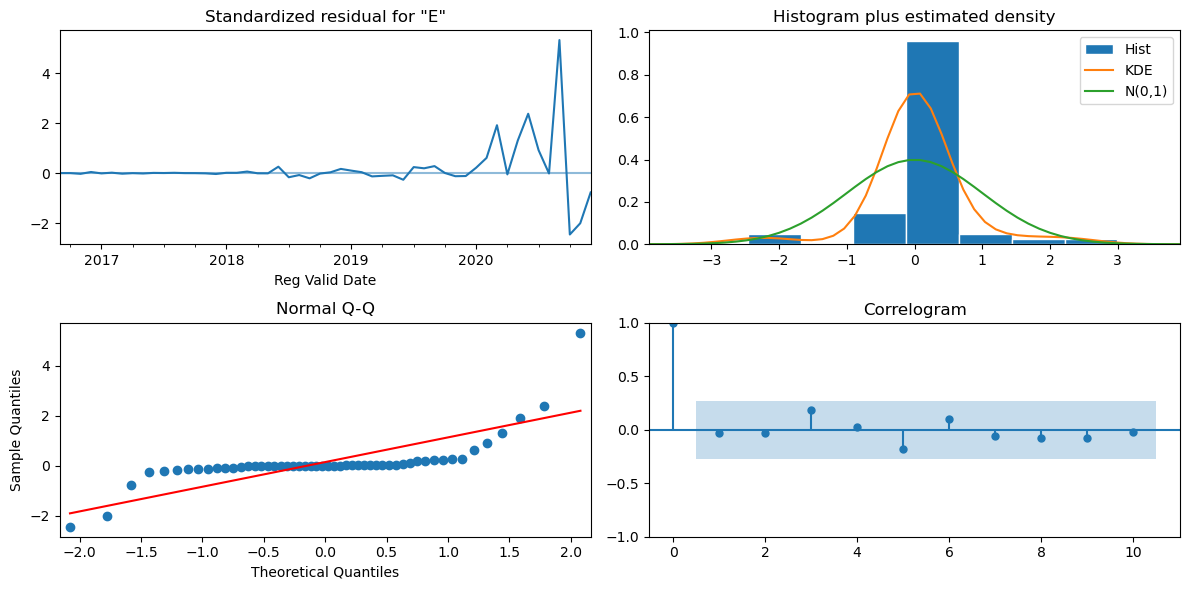

In [267]:
#fitting SARIMAX model with best params
model = SARIMAX(train_NASSAU, order=(1, 1, 4), seasonal_order=(0, 1, [], 12),
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

Above, we can see that the residuals are almost fairly close to being normally distributed. We can accept this as the best model and move onto making and plotting predictions.

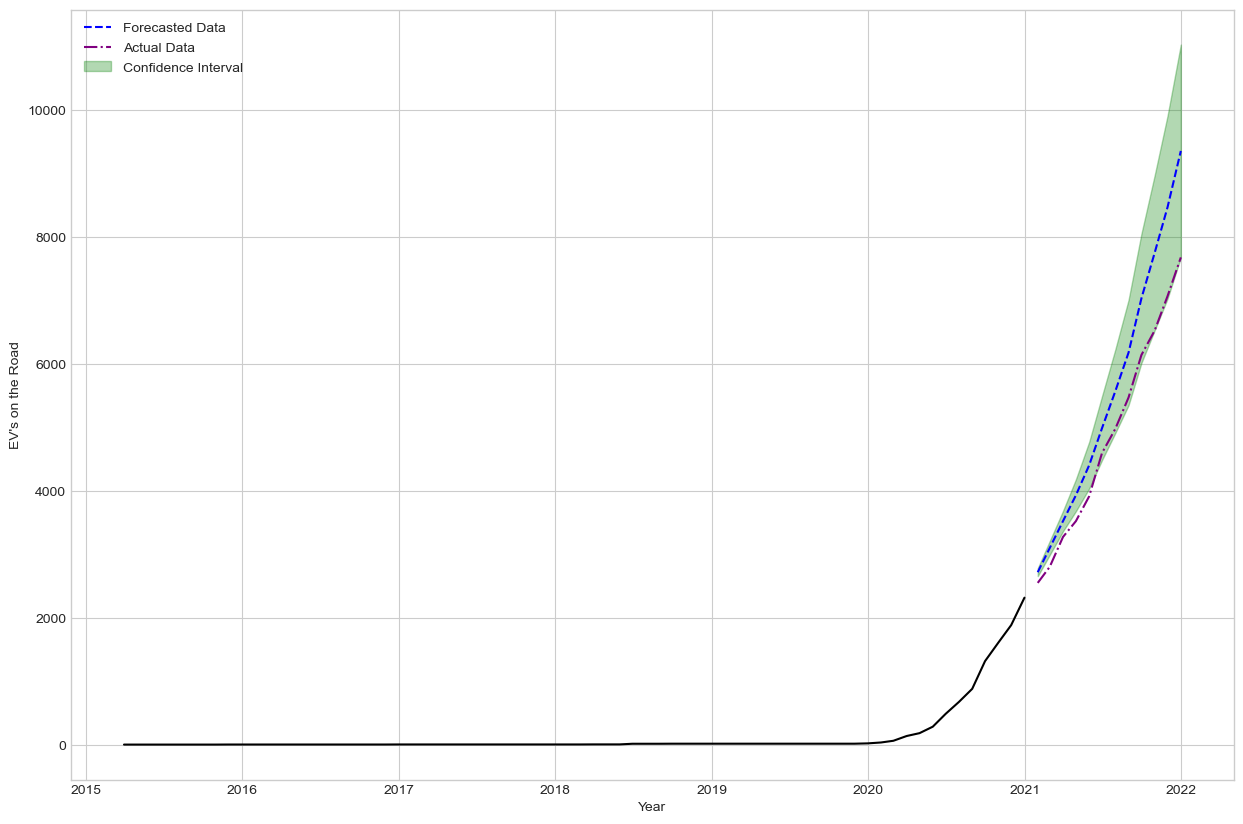

In [268]:
df_NASSU_forecast = get_forecast(model, train_NASSAU, test_NASSAU, plot=True)

Here, we can see that the forecasted data stays higher than the actual observed data. However, the observed data is almost following similar pattern and close to the lower confidence level. 

### Future Predictions
#### Fitting Model to All Observed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                   82
Model:             SARIMAX(1, 1, 4)x(0, 1, [], 12)   Log Likelihood                -337.492
Date:                             Sat, 19 Nov 2022   AIC                            686.984
Time:                                     16:56:56   BIC                            699.937
Sample:                                 03-31-2015   HQIC                           692.087
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9937      0.023     43.419      0.000       0.949       1.039
ma.L1         -0.5608      0.099     -5.687      0.000      -0.754      -0.368
ma.L2          0.1188      0.108      1.102      0.271      -0.093       0.330
ma.L3          0.8421      0.098      8.586      0.000       0.650       1.034
ma.L4         -0.6113      0.101     -6.044      0.000      -0.810      -0.413
sigma2      2052.9936    9.5e-05   2.16e+07      0.000    2052.993    2052.994
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                64.51
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):           15641.66   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+23. Standard errors may be unstable.
"""

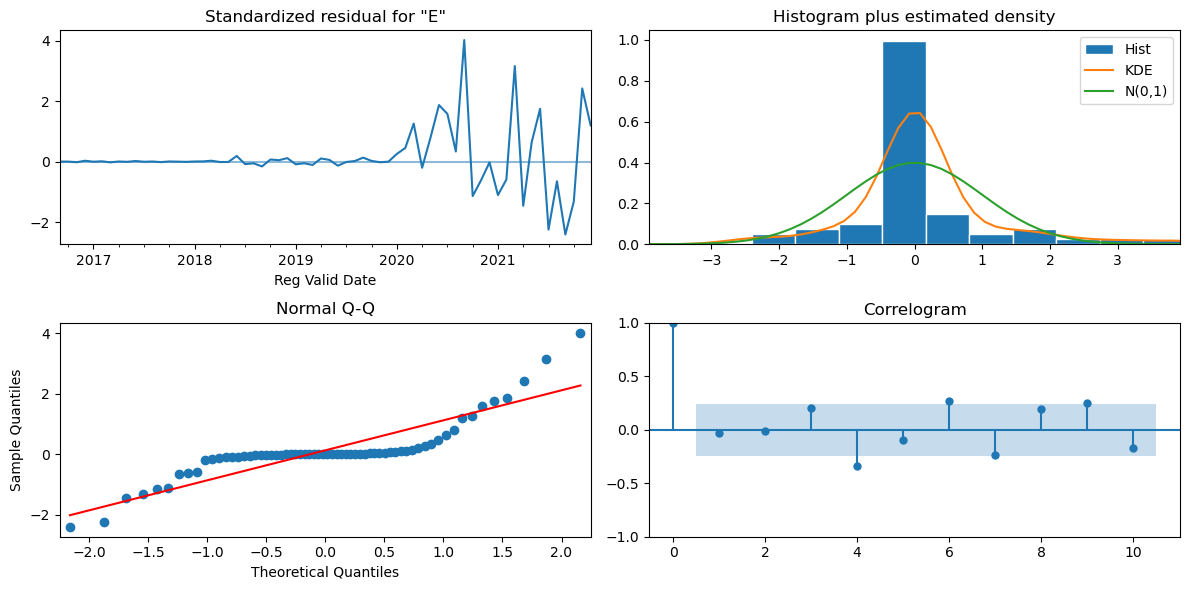

In [269]:
model = SARIMAX(county_information['NASSAU']['df'], order=(1, 1, 4), seasonal_order=(0, 1, [], 12), 
                enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

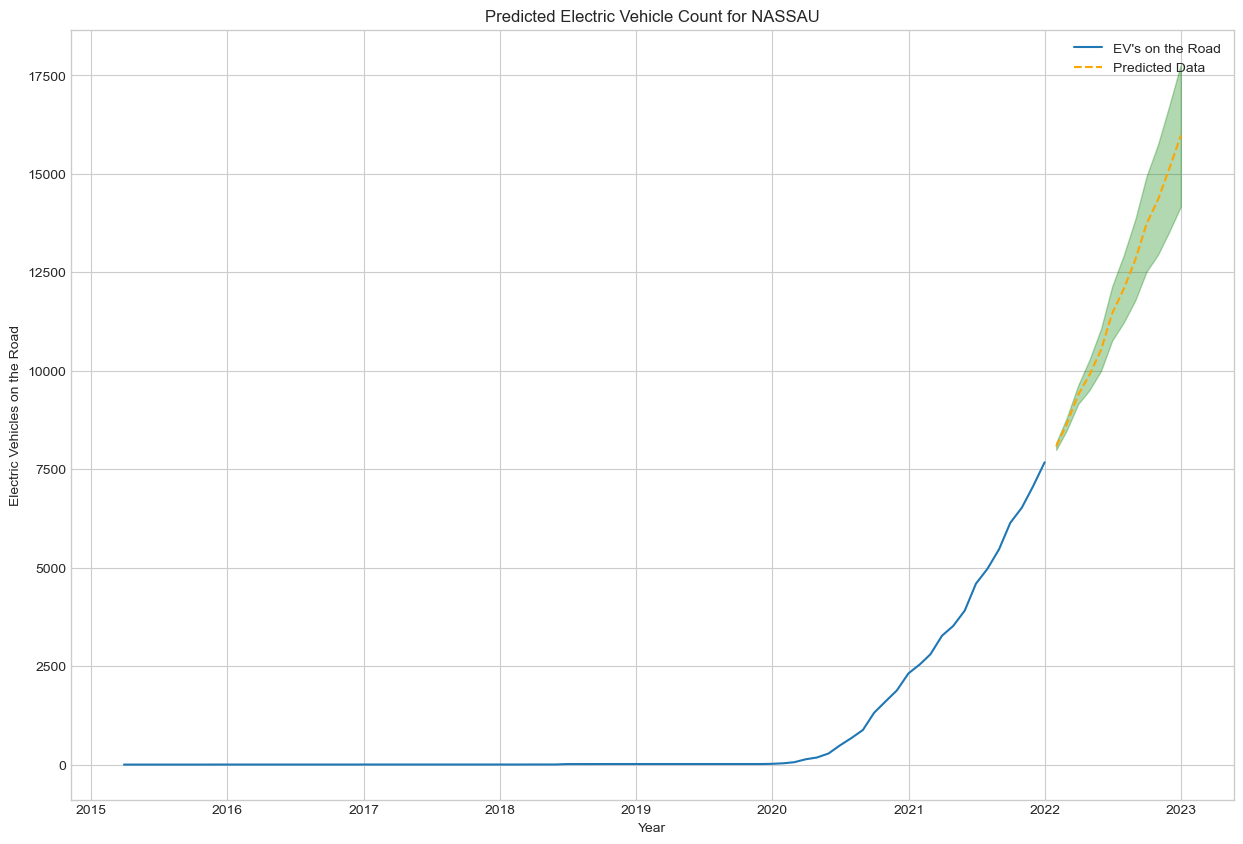

In [270]:
#getting and plotting predictions
df_NASSAU_preds = get_prediction(model, county_information['NASSAU']['df'], 
                               test_NASSAU, 'NASSAU', plot=True)

The model is predicting that the amount of electric vehicles in NASSAU county are going to keep rising in an exponential pattern.

#### Plotting & Saving Predictions

In [271]:
#saving predictions
county_information['NASSAU']['Predictions'] = df_NASSAU_preds

## SUFFOLK
### Seasonality Check

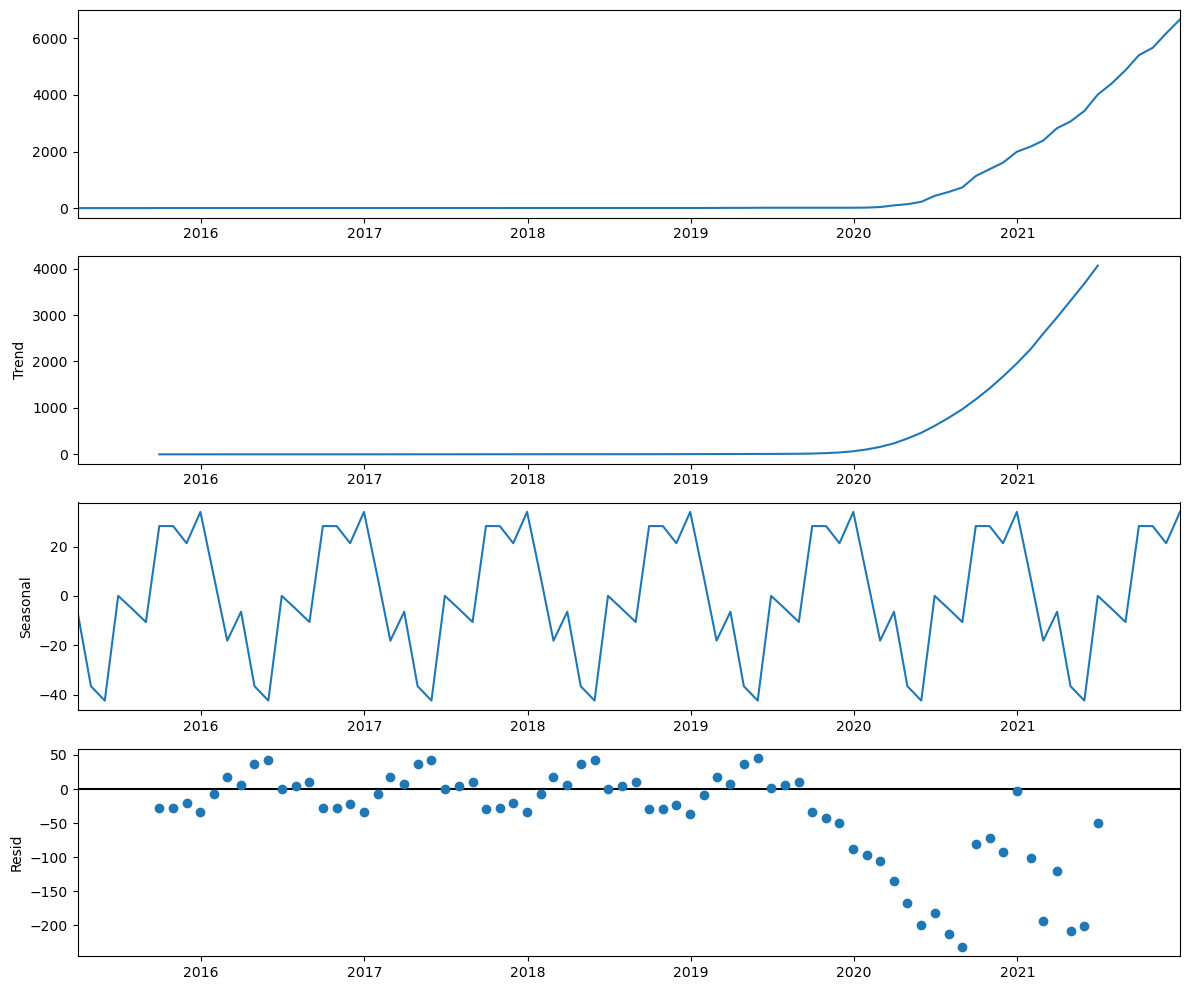

In [272]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['SUFFOLK']['df'])
decomp.plot();

As is the case with the previous counties, the decomposition for SUFFOLK County's data also suggests that there is an upwards trend and a seasonal component.

### train_test_split

After multiple iterations, we found that the 0.81-0.19 split of the data belonging to SUFFOLK County resulted in the best performance.

In [149]:
#split data into train/test sets for validation
train_SUFFOLK, test_SUFFOLK = train_test_split_ts(county_information['SUFFOLK']['df'], 
                                            0.85, 0.15)

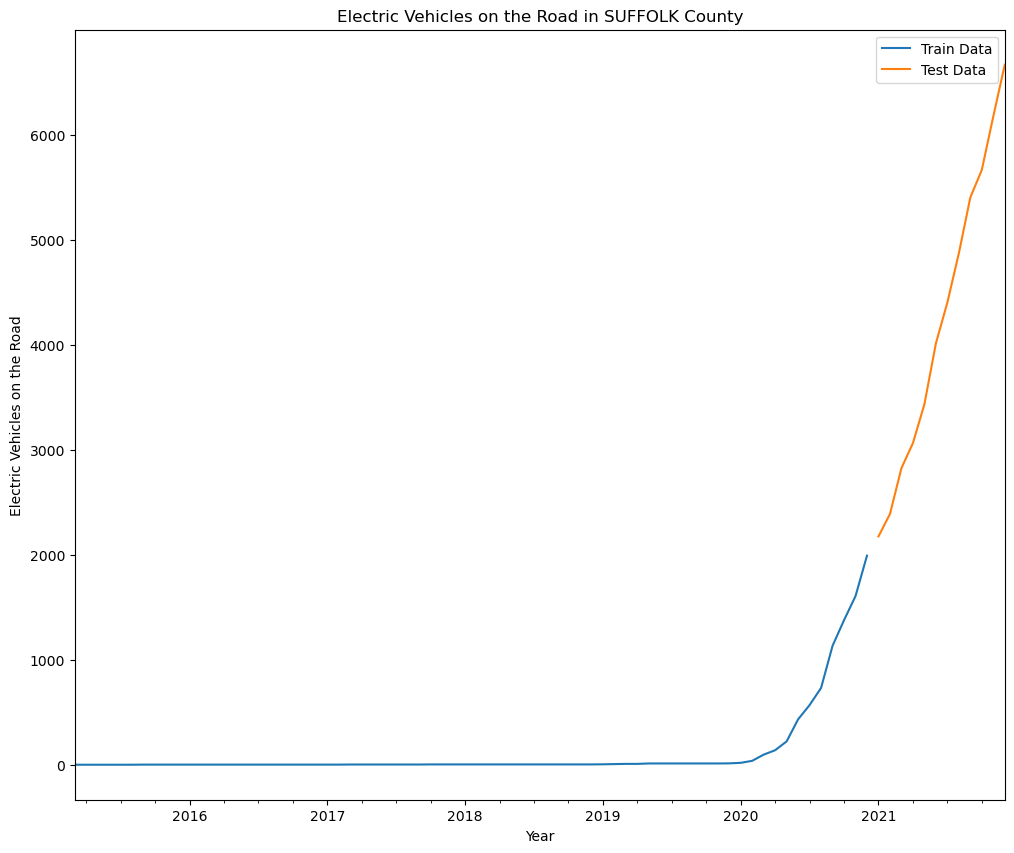

In [150]:
#plot the split
plot_train_test_split(train_SUFFOLK, test_SUFFOLK, 'SUFFOLK')

### Finding Best Parameters with Auto-Arima

In [151]:
auto_model = pm.auto_arima(train_SUFFOLK, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -351.816
Date:                Sat, 19 Nov 2022   AIC                            711.633
Time:                        15:55:10   BIC                            720.569
Sample:                    03-31-2015   HQIC                           715.178
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9882      0.029     34.581      0.000       0.932       1.044
ma.L1          0.2446      0.057      4.271      0.000       0.132       0.357
ma.L2         -0.5888      0.083     -7.098      0.000      -0.751      -0.426
sigma2      1479.0704    109.861     13.463      0.000    1263.747    1694.394
===================================================================================
Ljung-Box (L1) (Q):                   5.72   Jarque-Bera (JB):               321.38
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):           19470.92   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (1,1,2) for the ARIMA order withoutthe seasonal component. We can go ahead and plug these into a SARIMAX model to have our final model and then we can validate it by looking at the forecasts and the test set.

### Validate Model with Forecasts for Test Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                   70
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -330.091
Date:                Sat, 19 Nov 2022   AIC                            668.181
Time:                        15:55:49   BIC                            676.940
Sample:                    03-31-2015   HQIC                           671.642
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2149      0.095     12.724      0.000       1.028       1.402
ma.L1         -0.2499      0.310     -0.807      0.420      -0.857       0.357
ma.L2         -0.8425      0.145     -5.825      0.000      -1.126      -0.559
sigma2      1139.0636    429.157      2.654      0.008     297.932    1980.195
===================================================================================
Ljung-Box (L1) (Q):                   7.96   Jarque-Bera (JB):               533.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):           15048.89   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

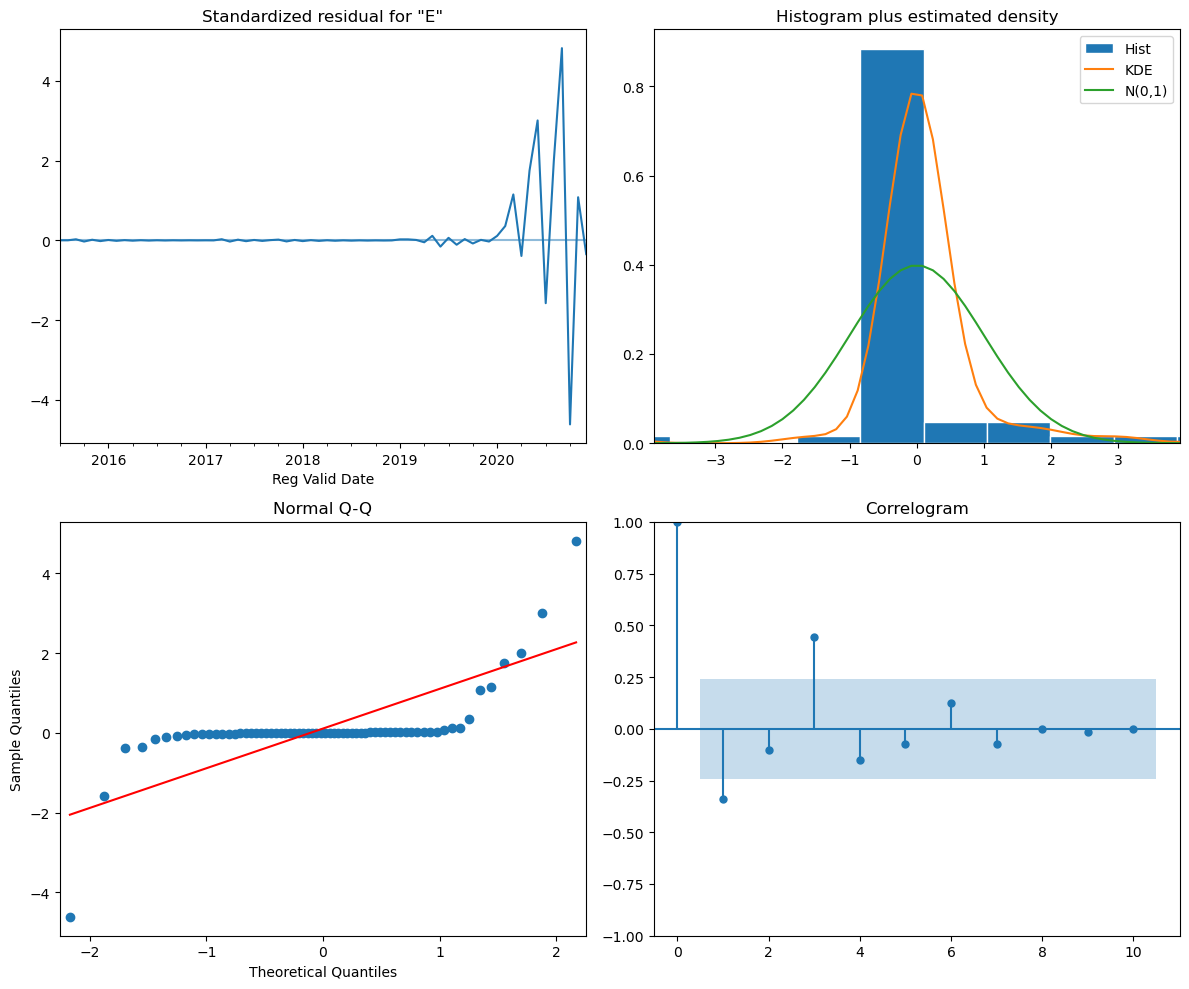

In [152]:
model = SARIMAX(train_SUFFOLK, order=(1,1,2),
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

The model was almost able to remove seasonality successfully.

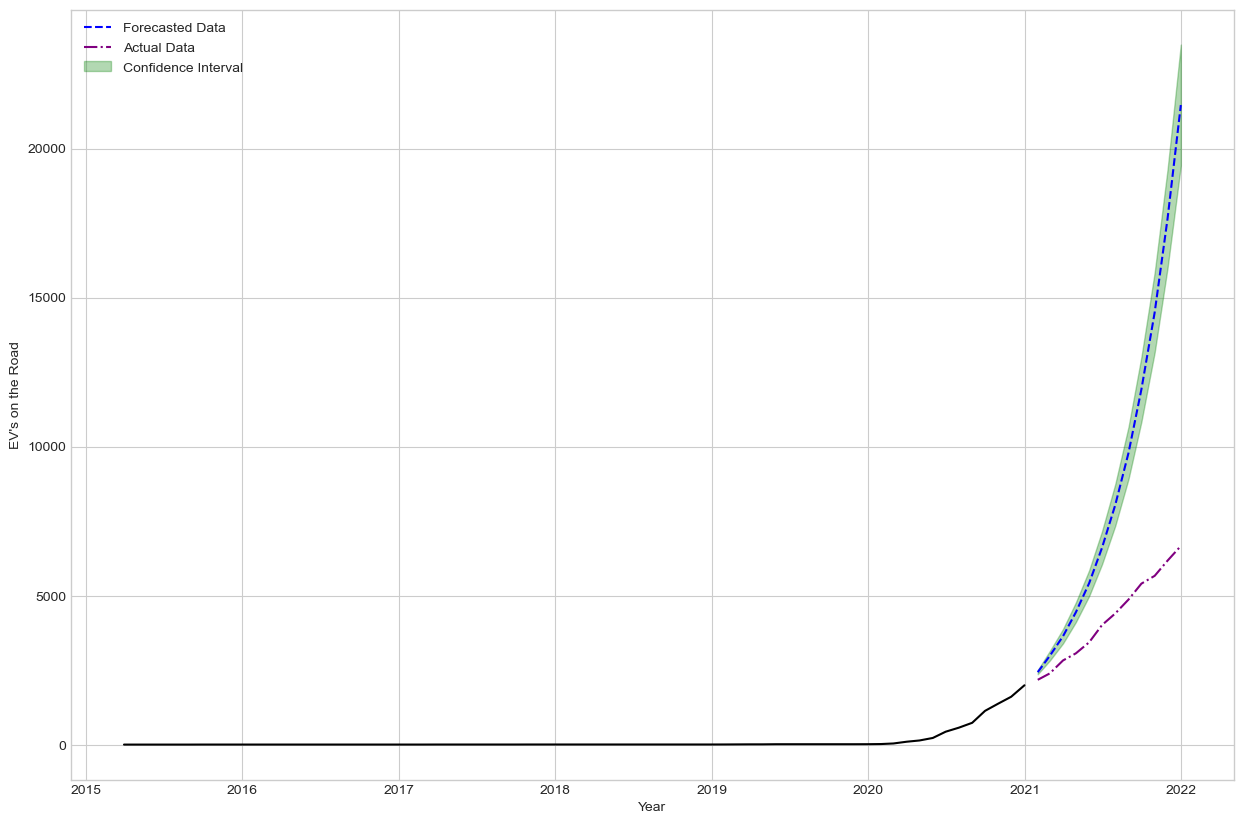

In [153]:
df_clark_forecast = get_forecast(model, train_SUFFOLK, test_SUFFOLK, plot=True)

The model's forecast stays inline with the observed data until the end of 2021. after that, the forcasted data is more than the observed data.

### Future Predictions
#### Fitting Model to All Observed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                   82
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -422.866
Date:                Sat, 19 Nov 2022   AIC                            853.732
Time:                        16:19:48   BIC                            863.159
Sample:                    03-31-2015   HQIC                           857.506
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0117      0.022     45.762      0.000       0.968       1.055
ma.L1         -0.9327      0.042    -22.221      0.000      -1.015      -0.850
ma.L2          1.0000      0.076     13.212      0.000       0.852       1.148
sigma2      2752.8250   3.21e-05   8.59e+07      0.000    2752.825    2752.825
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               233.17
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):           31282.58   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.74e+24. Standard errors may be unstable.
"""

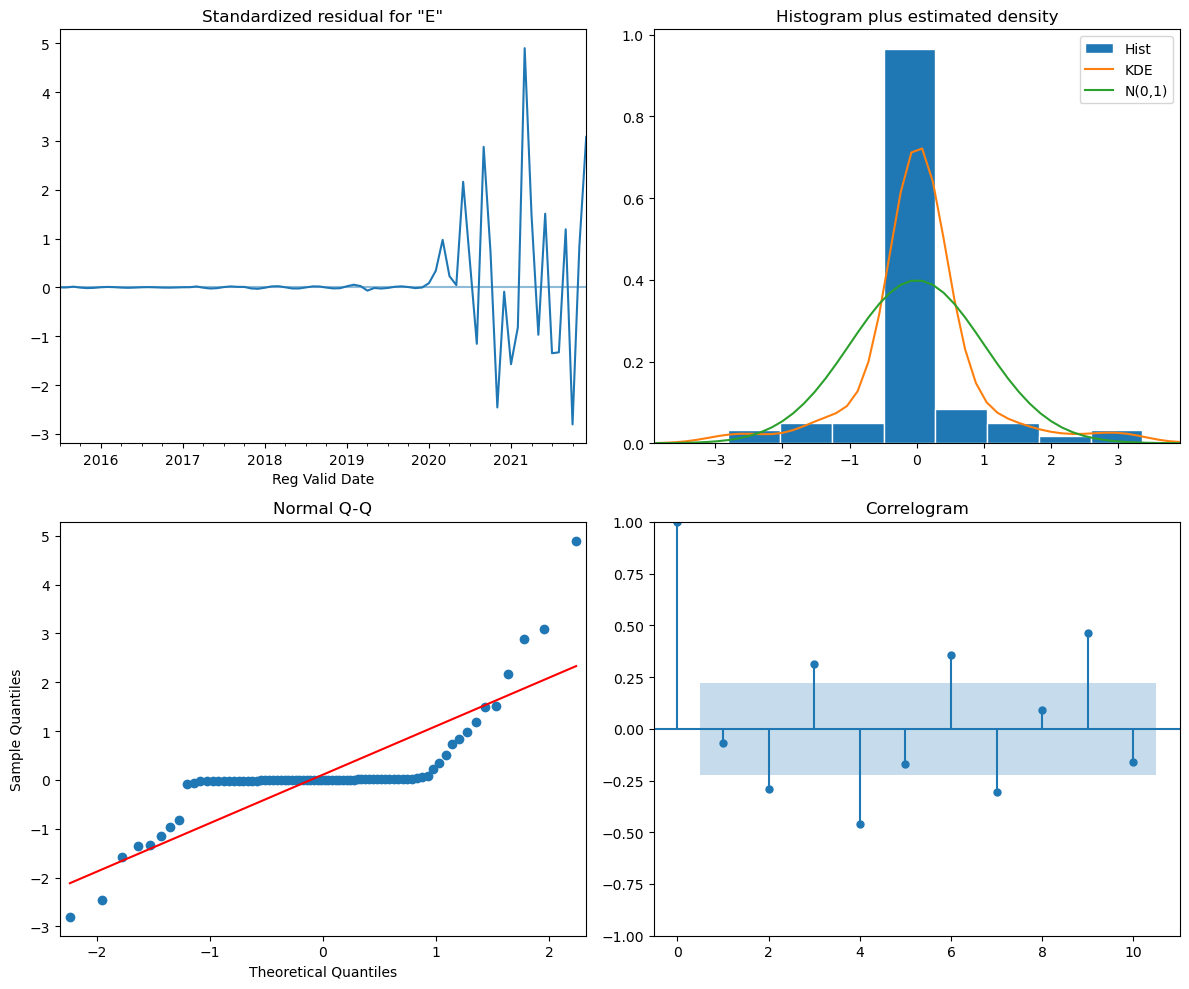

In [198]:
model = SARIMAX(county_information['SUFFOLK']['df'], order=(1, 1, 2), 
                enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

#### Plotting & Saving Predictions

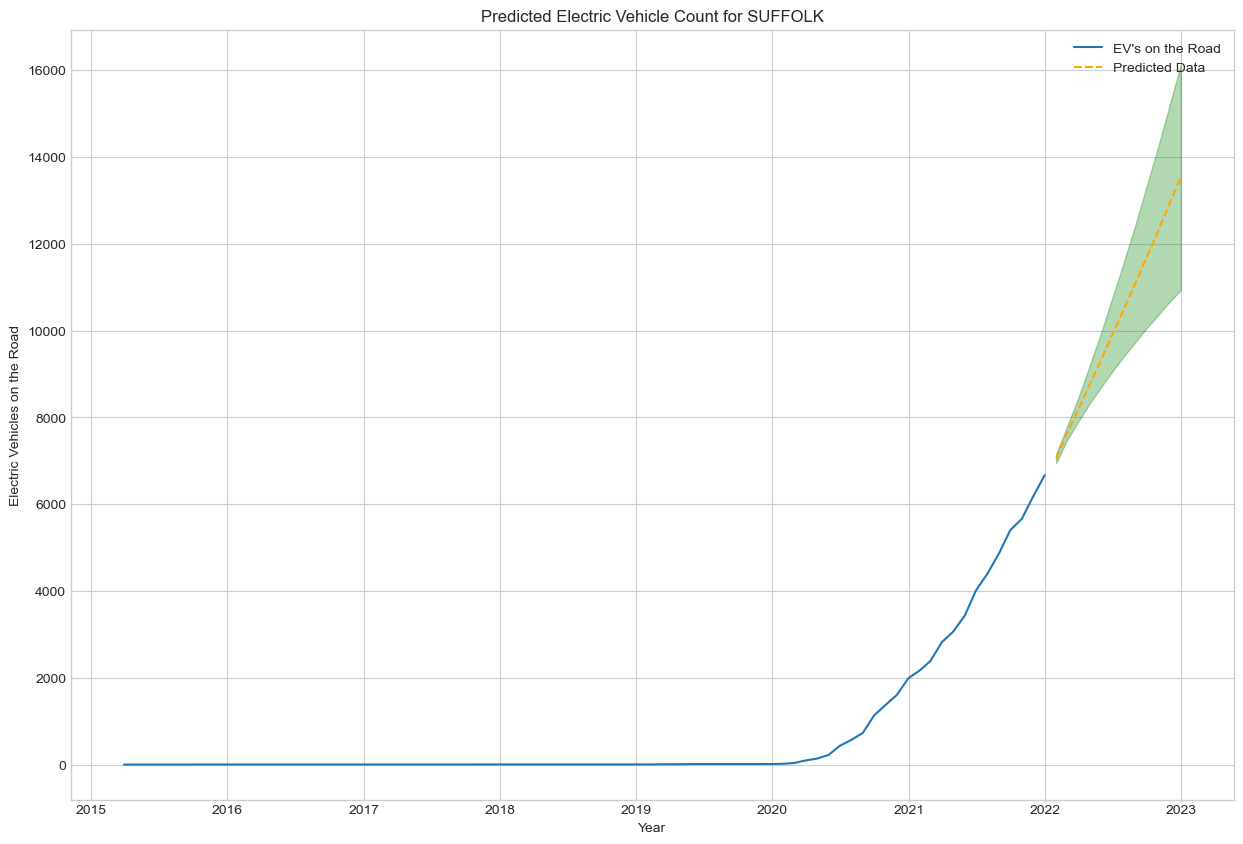

In [199]:
#getting/plotting predictions
df_SUFFOLK_preds = get_prediction(model, county_information['SUFFOLK']['df'], 
                               test_SUFFOLK, 'SUFFOLK', plot=True)

The model is predicting that the electric vehicle amount in Clark County will keep increasing exponentially in the coming years (the upper confidence limit)

In [200]:
#saving predictions
county_information['SUFFOLK']['Predictions'] = df_SUFFOLK_preds

## WESTCHESTER
### Seasonality Check

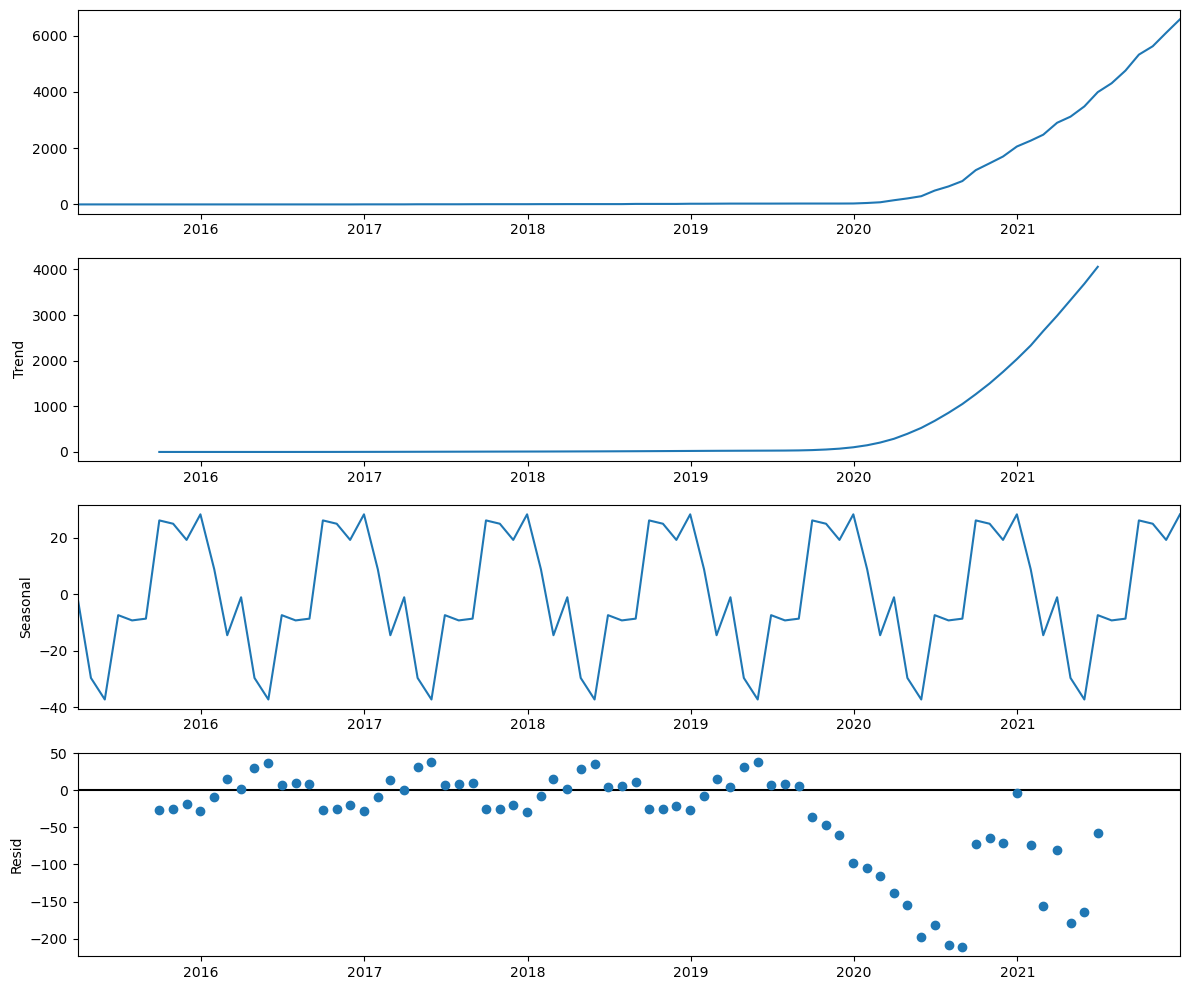

In [201]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['WESTCHESTER']['df'])
decomp.plot();

Similar to the previous counties, WESTCHESTER County's electric vehicle count is also showing an upward trend along with a seasonality component.

### train_test_split

After multiple iterations, we found that the 0.77-0.23 split of the data belonging to Thurston County resulted in the best performance.

In [202]:
#splitting data into train/test sets for validation
train_WESTCHESTER, test_WESTCHESTER = train_test_split_ts(county_information['WESTCHESTER']['df'], 
                                            0.855, 0.145)

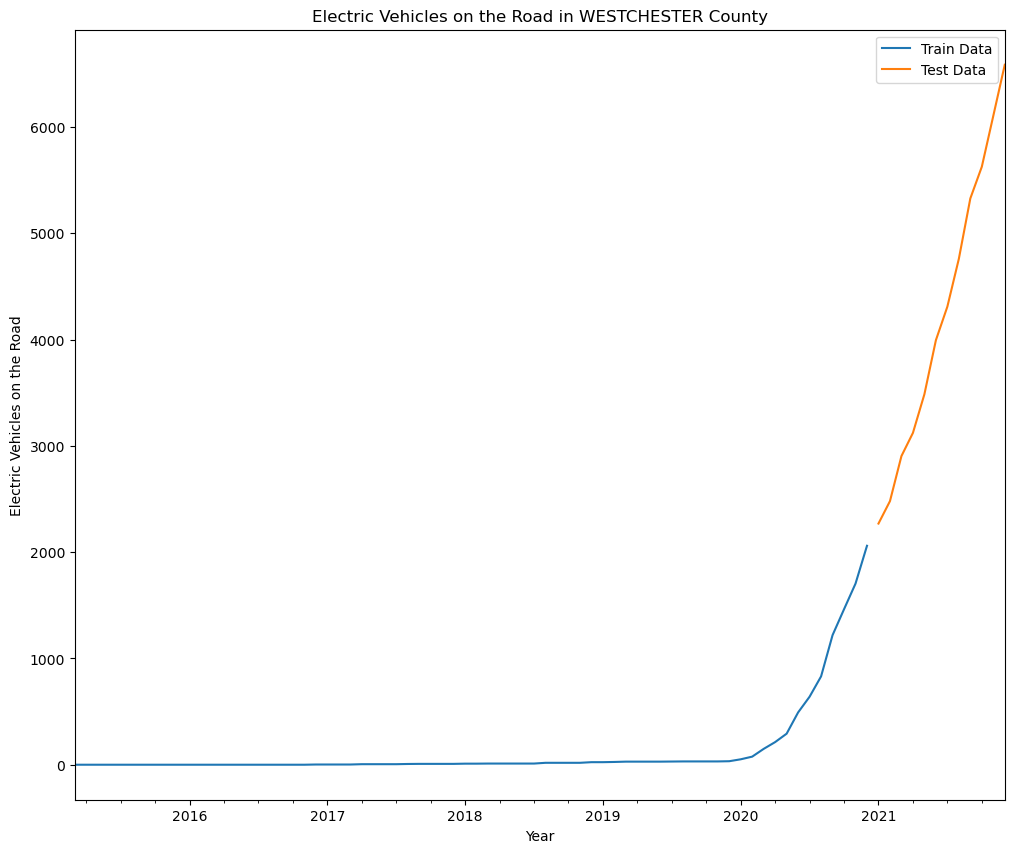

In [203]:
#plotting the split
plot_train_test_split(train_WESTCHESTER, test_WESTCHESTER, 'WESTCHESTER')

### Finding Best Parameters with Auto-Arima

In [204]:
#finding best parameters
auto_model = pm.auto_arima(train_WESTCHESTER, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   70
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -290.430
Date:                             Sat, 19 Nov 2022   AIC                            586.861
Time:                                     16:20:21   BIC                            592.990
Sample:                                 03-31-2015   HQIC                           589.243
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9960      0.017     58.765      0.000       0.963       1.029
ma.L1         -0.3500      0.091     -3.839      0.000      -0.529      -0.171
sigma2      1484.5854    114.795     12.932      0.000    1259.591    1709.579
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):               709.14
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):            3496.58   Skew:                             3.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (1,1,1) for the ARIMA order without the seasonal component. We can go ahead and plug these into a SARIMAX model to have our final model and then we can validate it by looking at the forecasts and the test set.

### Validate Model with Forecasts for Test Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                   70
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -274.070
Date:                             Sat, 19 Nov 2022   AIC                            554.140
Time:                                     16:20:58   BIC                            560.162
Sample:                                 03-31-2015   HQIC                           556.469
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1449      0.025     46.430      0.000       1.097       1.193
ma.L1         -0.6339      0.105     -6.062      0.000      -0.839      -0.429
sigma2      1242.8372     93.494     13.293      0.000    1059.592    1426.082
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               447.67
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):            3006.75   Skew:                             2.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

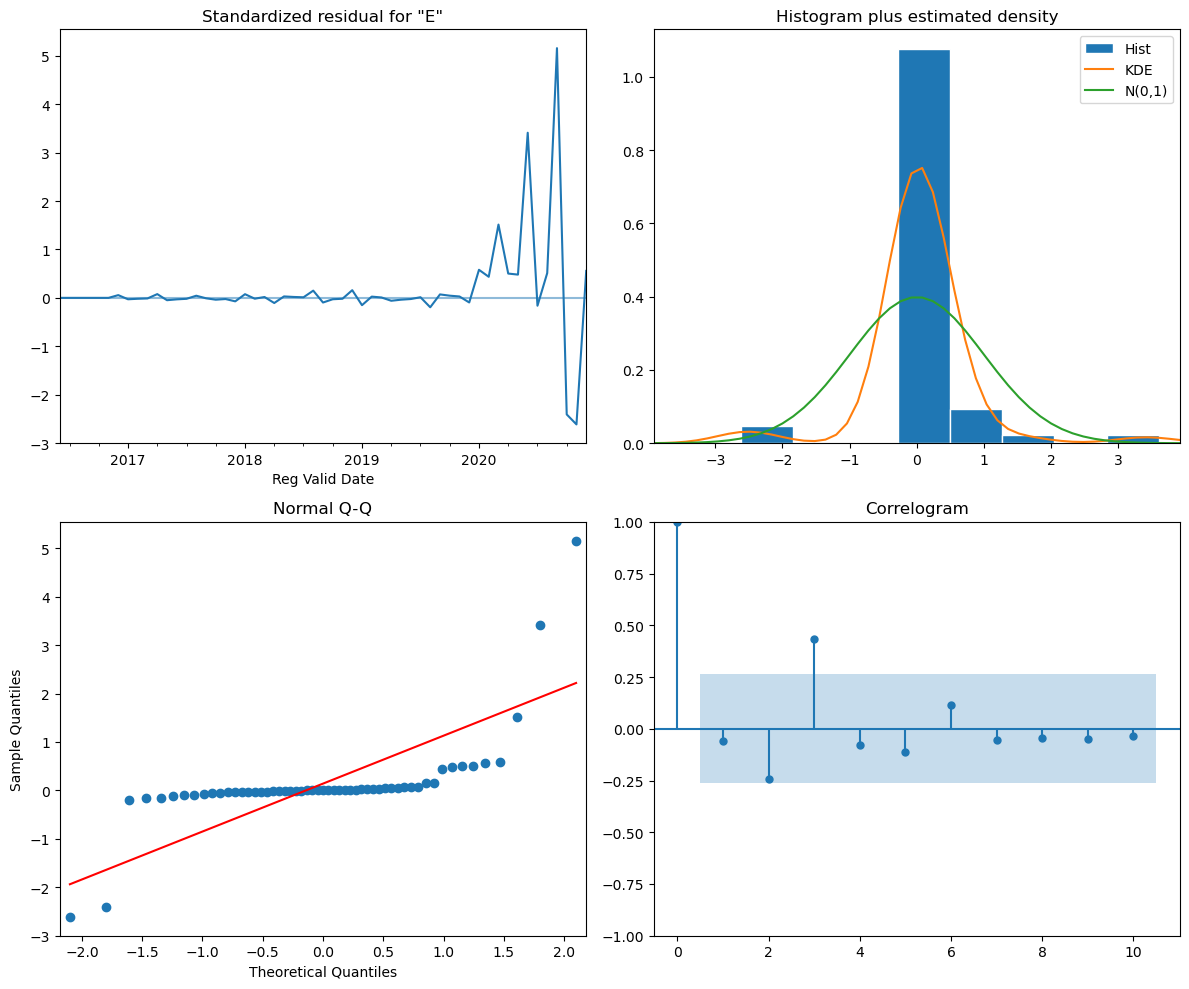

In [205]:
model = SARIMAX(train_WESTCHESTER, order=(1,1,1),seasonal_order=(0, 1, [], 12),
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

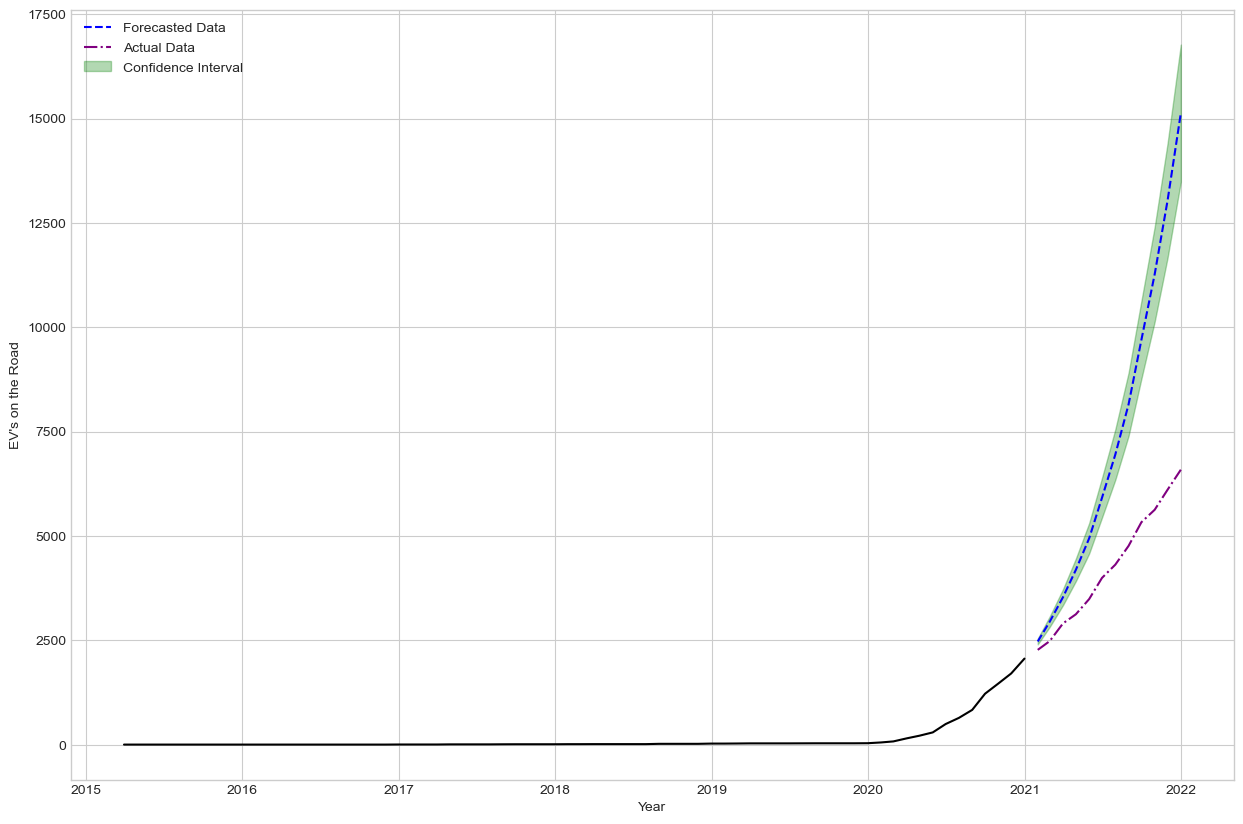

In [206]:
df_WESTCHESTER_forecast = get_forecast(model, train_WESTCHESTER, test_WESTCHESTER, 
                                    plot=True)

The forecast and the observed data are very close to each other throughout the forecasting period especially at the upper confidence interval. This suggests that our model's performing good enough with its predictions. Therefore, we can fit the model to all observed data for WESTCHESTER County and make predictions for the future electric vehicle counts.

### Future Predictions

#### Fitting Model to All Observed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                   82
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -363.319
Date:                             Sat, 19 Nov 2022   AIC                            732.638
Time:                                     16:21:44   BIC                            739.252
Sample:                                 03-31-2015   HQIC                           735.255
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9914      0.016     61.130      0.000       0.960       1.023
ma.L1         -0.5483      0.079     -6.920      0.000      -0.704      -0.393
sigma2      2999.3292    305.129      9.830      0.000    2401.288    3597.370
===================================================================================
Ljung-Box (L1) (Q):                   2.74   Jarque-Bera (JB):                73.85
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):            5902.44   Skew:                             0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

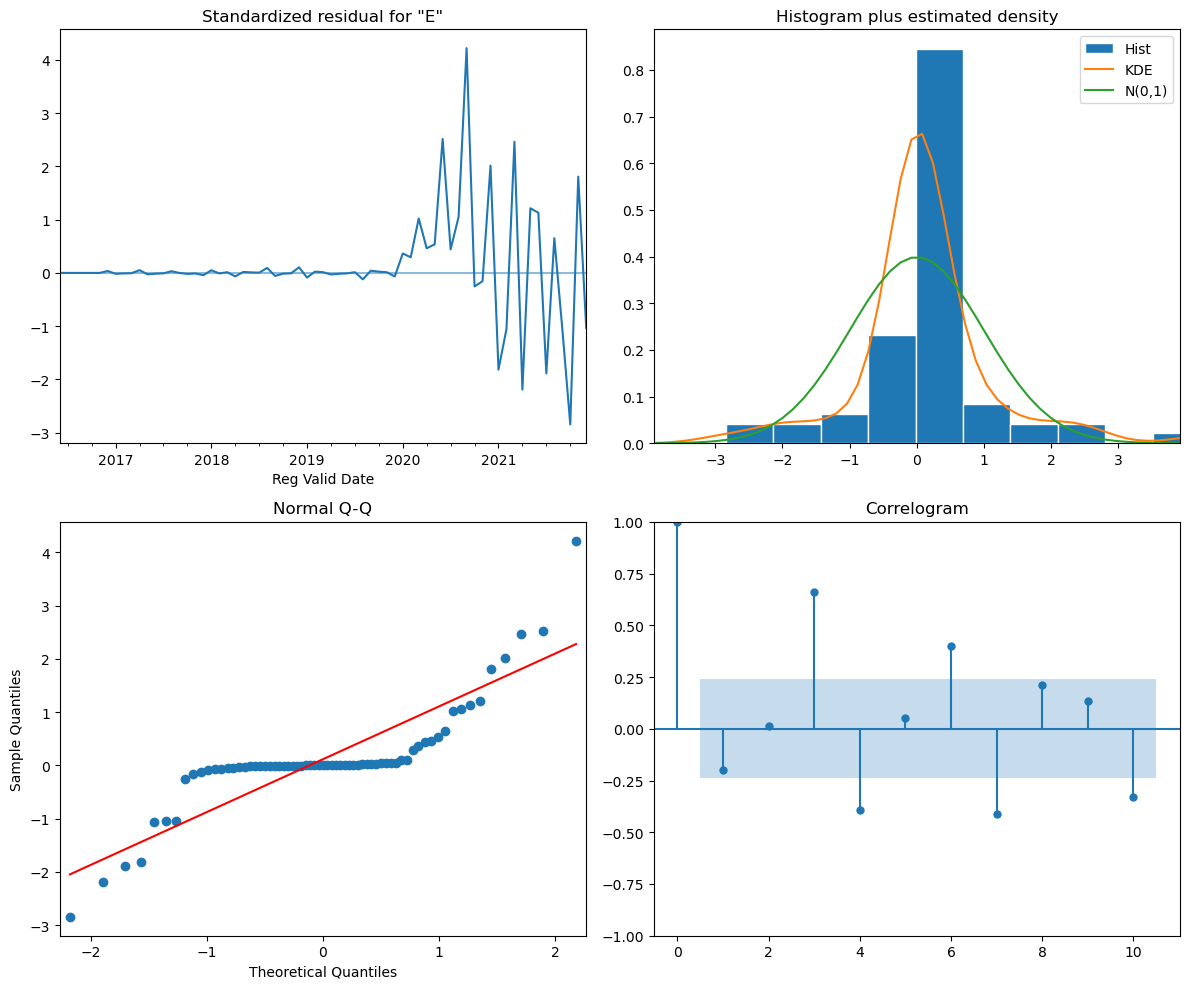

In [207]:
model = SARIMAX(county_information['WESTCHESTER']['df'], order=(1,1,1),seasonal_order=(0, 1, [], 12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

#### Plotting & Saving Predictions

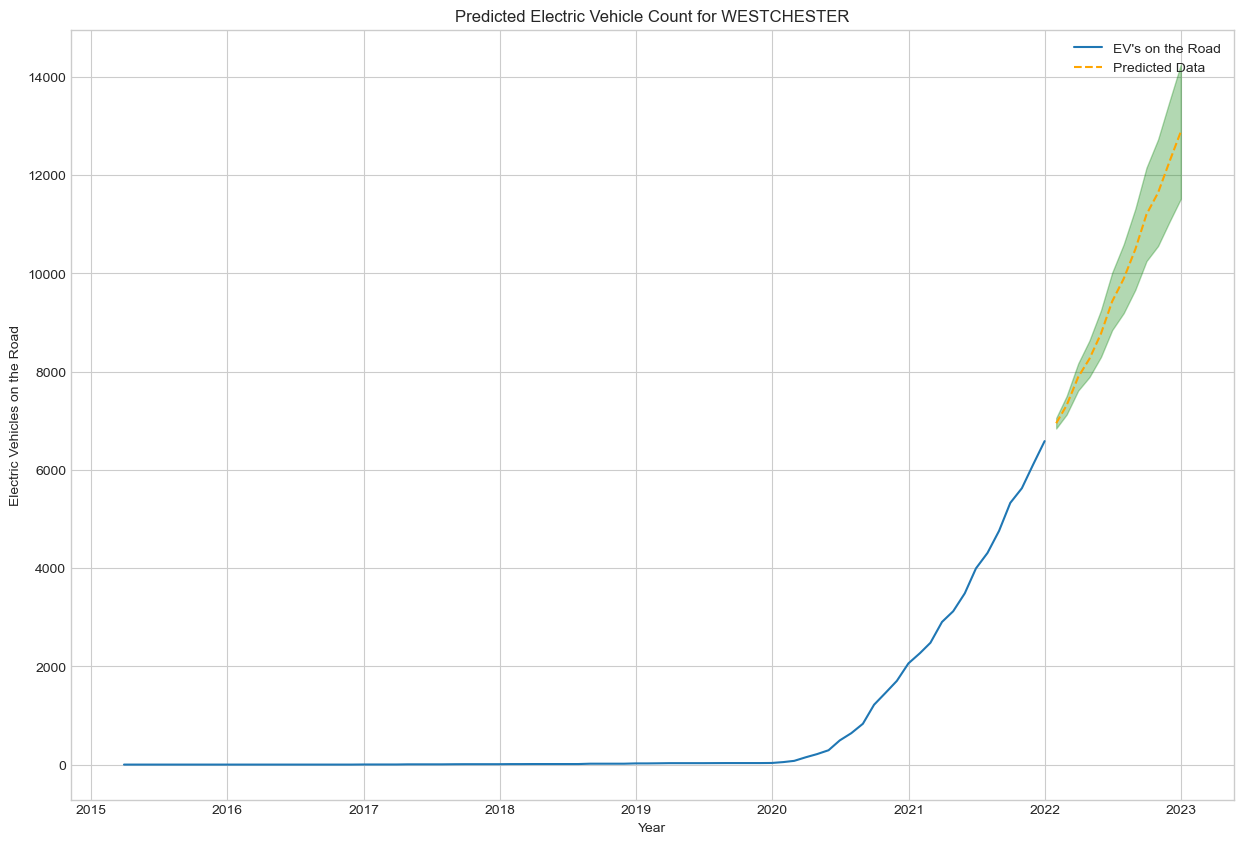

In [208]:
#getting and plotting predictions
df_WESTCHESTER_preds = get_prediction(model, county_information['WESTCHESTER']['df'], 
                               test_WESTCHESTER, 'WESTCHESTER', plot=True)

The model is predicting that the amount of electric vehicles in WESTCHESTER County are going to keep increasing at a linear rate (based on the mean prediction). However, if we look at the upper and lower confidence intervals we also see the possibilities of an exponential increase and a leveling off.

In [209]:
#saving predictions
county_information['WESTCHESTER']['Predictions'] = df_WESTCHESTER_preds

## QUEENS

### Seasonality Check

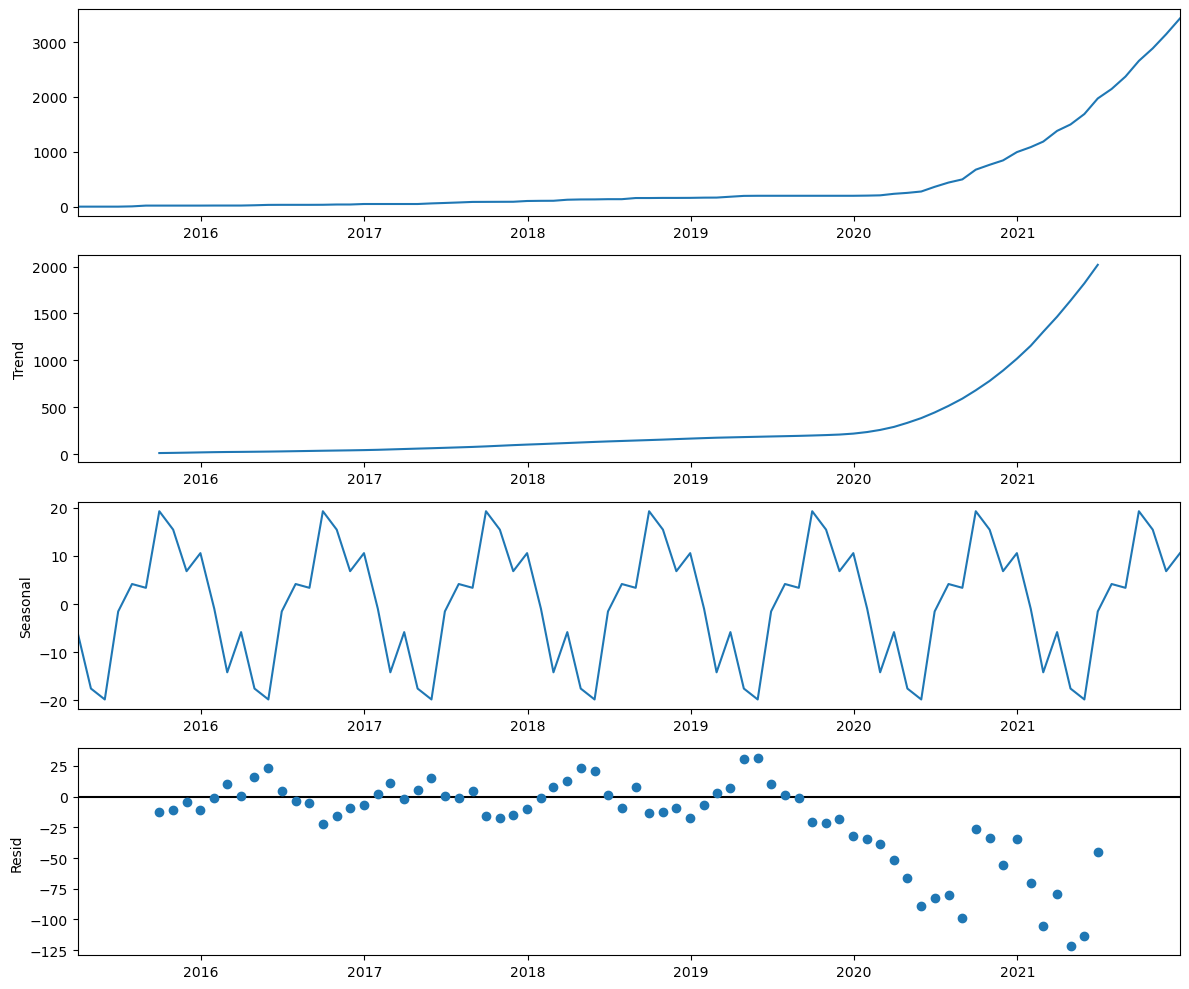

In [210]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['QUEENS']['df'])
decomp.plot();

Electric vehicle count in QUEENS County, similar to previous counties, has an upward trend. It also is showing a seasonal pattern.

### train_test_split

After multiple iterations, we found that the 0.79-0.21 split of the data belonging to Kitsap County resulted in the best performance.

In [211]:
#splitting data into train/test sets for validation
train_QUEENS, test_QUEENS = train_test_split_ts(county_information['QUEENS']['df'], 
                                            0.79, 0.21)

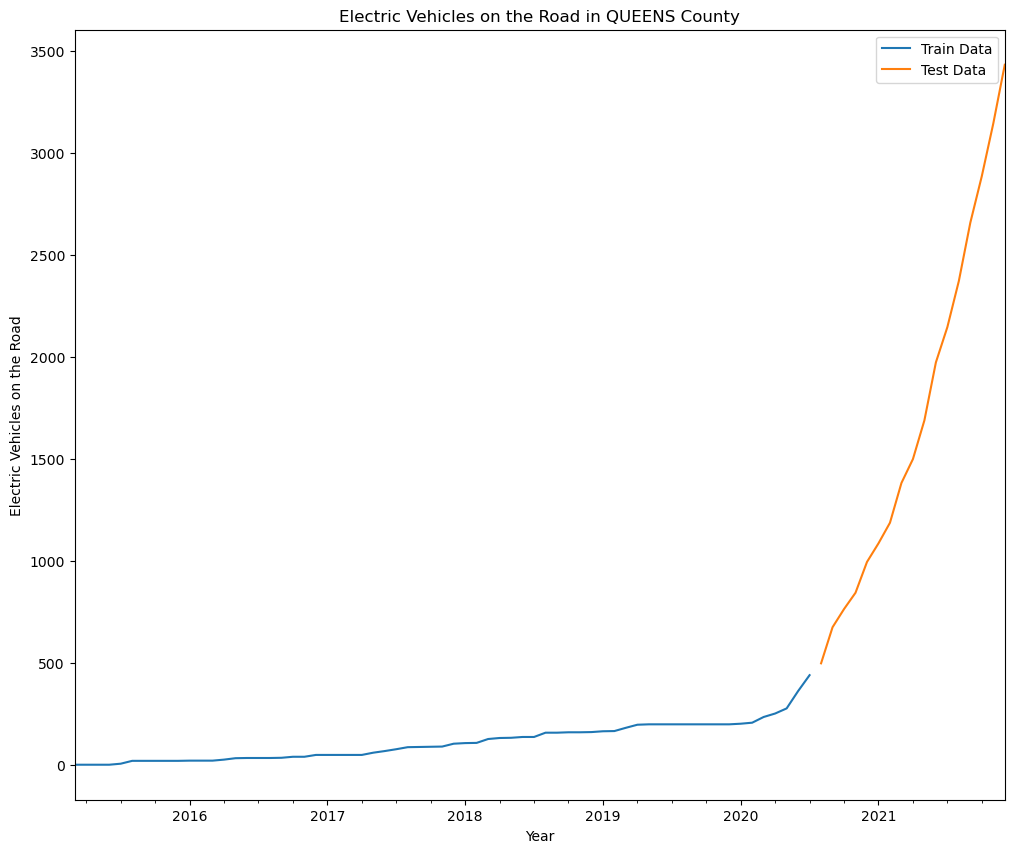

In [212]:
#plotting the split
plot_train_test_split(train_QUEENS, test_QUEENS, 'QUEENS')

### Finding Best Parameters with Auto-Arima

In [213]:
#finding best parameters
auto_model = pm.auto_arima(train_QUEENS, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -243.282
Date:                Sat, 19 Nov 2022   AIC                            490.564
Time:                        16:22:17   BIC                            494.882
Sample:                    03-31-2015   HQIC                           492.265
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8980      0.124      7.232      0.000       0.655       1.141
sigma2       114.3308     12.827      8.913      0.000      89.190     139.472
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):               724.95
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):              11.07   Skew:                             3.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (1, 1, 0) for the ARIMA order without  seasonality. 

### Validate Model with Forecasts for Test Data

In [214]:
model = SARIMAX(train_QUEENS, order=(1, 1, 0),
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                   65
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -239.061
Date:                Sat, 19 Nov 2022   AIC                            482.123
Time:                        16:22:26   BIC                            486.409
Sample:                    03-31-2015   HQIC                           483.809
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9450      0.139      6.784      0.000       0.672       1.218
sigma2       115.7434     14.363      8.058      0.000      87.592     143.895
===================================================================================
Ljung-Box (L1) (Q):                   1.77   Jarque-Bera (JB):               596.62
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               9.01   Skew:                             2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

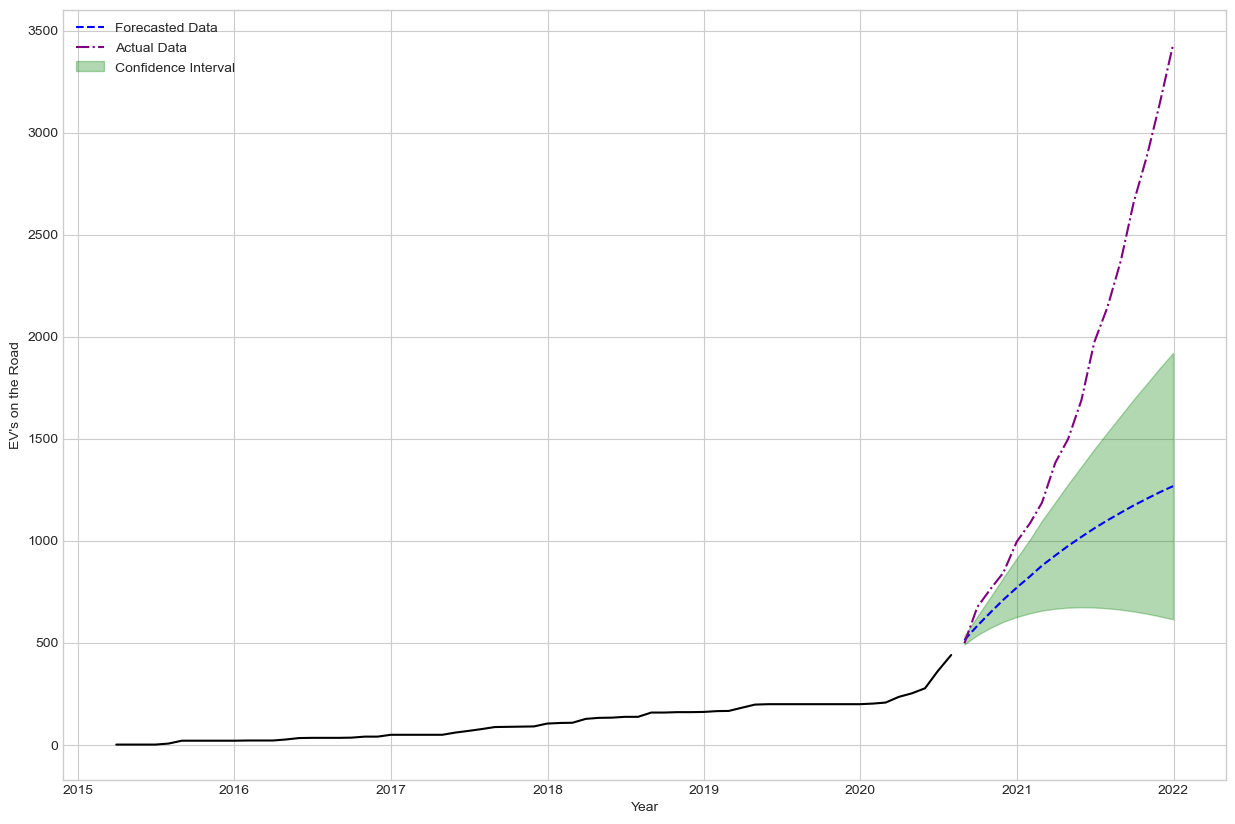

In [215]:
df_Queens_forecast = get_forecast(model, train_QUEENS, test_QUEENS, plot=True)

The forecast and the observed data seem to be very close to each othe before mid 2021.

### Future Predictions

#### Fitting Model to All Observed Data

In [216]:
model = SARIMAX(county_information['QUEENS']['df'], order=(1, 1, 0), 
                enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       EV's on the Road   No. Observations:                   82
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -395.154
Date:                Sat, 19 Nov 2022   AIC                            794.308
Time:                        16:22:56   BIC                            799.072
Sample:                    03-31-2015   HQIC                           796.218
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9924      0.022     45.211      0.000       0.949       1.035
sigma2      1142.4961    106.071     10.771      0.000     934.601    1350.391
===================================================================================
Ljung-Box (L1) (Q):                  17.81   Jarque-Bera (JB):                49.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             126.34   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Plotting & Saving Predictions

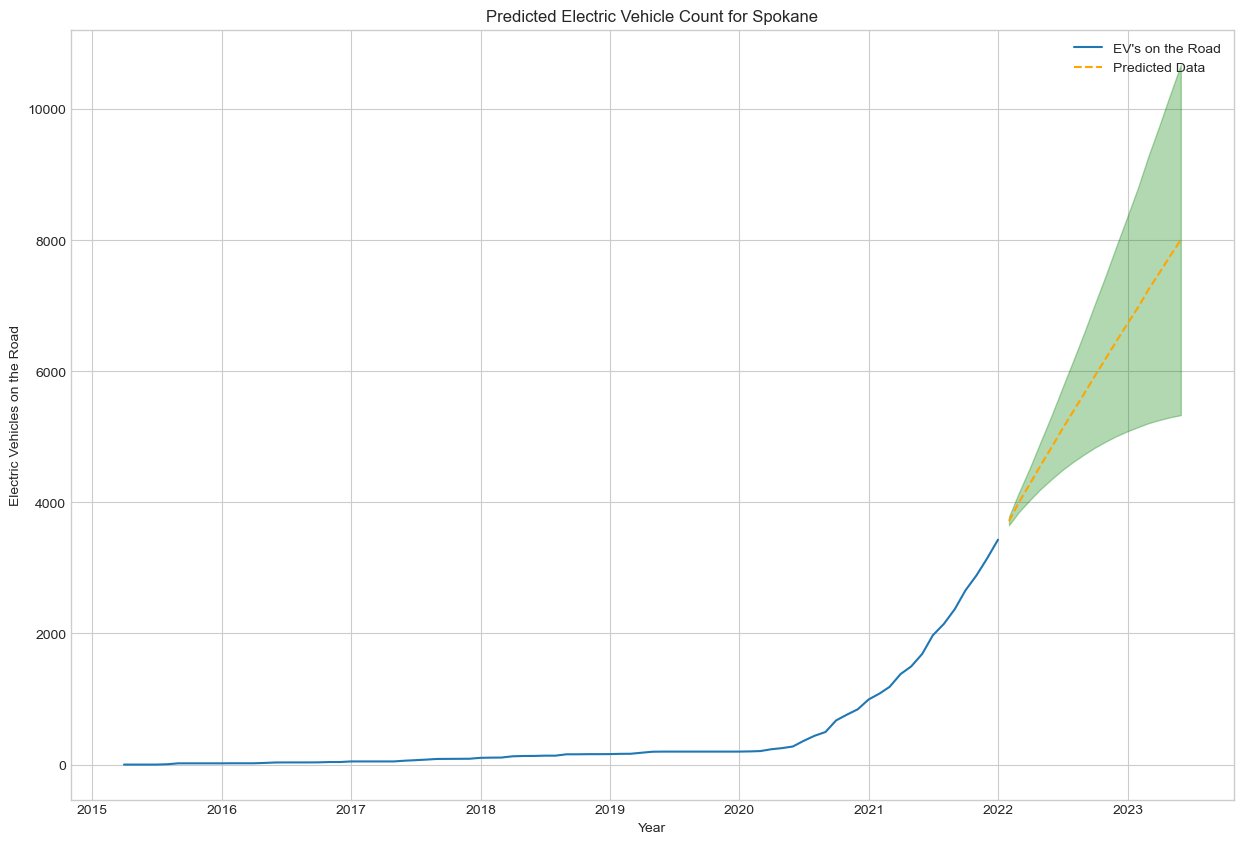

In [217]:
#getting and plotting predictions
df_QUEENS_preds = get_prediction(model, county_information['QUEENS']['df'], 
                               test_QUEENS, 'Spokane', plot=True)

Above, we can see that the model is predicting the amount of electric vehicles in QUEENS County to keep increasing exponentially. 

In [218]:
#saving predictions
county_information['QUEENS']['Predictions'] = df_QUEENS_preds

## NEW YORK

### Seasonality Check

In [219]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['NEW YORK']['df'])
decomp.plot();

### train_test_split

In [220]:
#splitting data into train/test sets for validation
train_NEW_YORK, test_NEW_YORK = train_test_split_ts(county_information['NEW YORK']['df'], 
                                            0.85, 0.15)

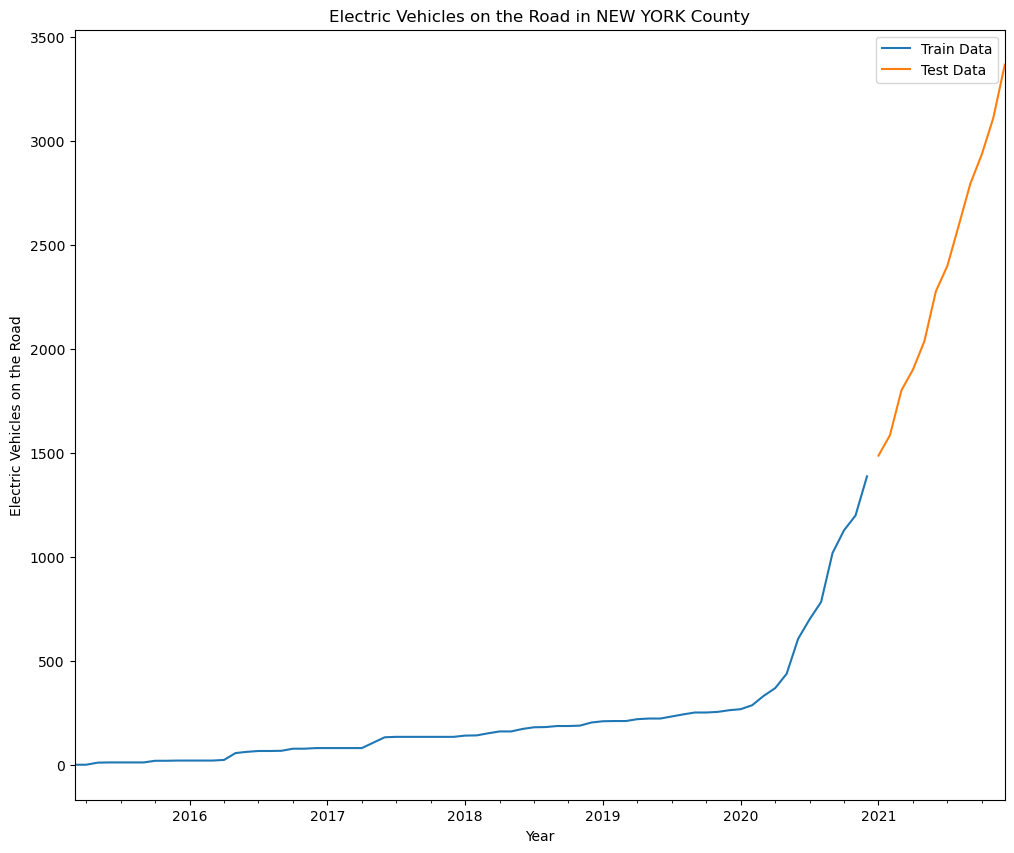

In [221]:
#plotting the split
plot_train_test_split(train_NEW_YORK, test_NEW_YORK, 'NEW YORK')

### Finding Best Parameters with Auto-Arima

In [222]:
#finding best parameters
auto_model = pm.auto_arima(train_NEW_YORK, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12, verbose=2)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   70
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -275.079
Date:                             Sat, 19 Nov 2022   AIC                            558.158
Time:                                     16:23:33   BIC                            566.330
Sample:                                 03-31-2015   HQIC                           561.334
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9811      0.060     16.336      0.000       0.863       1.099
ma.L1          0.1886      0.107      1.760      0.078      -0.021       0.399
ma.L2         -0.7364      0.111     -6.664      0.000      -0.953      -0.520
sigma2       849.2360    122.208      6.949      0.000     609.712    1088.760
===================================================================================
Ljung-Box (L1) (Q):                   5.87   Jarque-Bera (JB):                34.51
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.44   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best parameters (based on the AIC score) were (1,1,2) for the ARIMA order with with (0, 1, [0], 12) for seasonality. 

### Validate Model with Forecasts for Test Data

In [223]:
#fitting SARIMAX model with best params
model = SARIMAX(train_NEW_YORK, order=(1,1,2),seasonal_order=(0, 1, [], 12),
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                   70
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -258.382
Date:                             Sat, 19 Nov 2022   AIC                            524.764
Time:                                     16:23:47   BIC                            532.720
Sample:                                 03-31-2015   HQIC                           527.833
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1550      0.125      9.233      0.000       0.910       1.400
ma.L1         -0.0174      0.245     -0.071      0.943      -0.497       0.462
ma.L2         -0.9071      0.250     -3.633      0.000      -1.396      -0.418
sigma2       804.0001    129.382      6.214      0.000     550.416    1057.585
===================================================================================
Ljung-Box (L1) (Q):                   7.09   Jarque-Bera (JB):                57.80
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              12.75   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The residuals for the model seem to be mostly normally distributed once again with the tails of the Q-Q plot not being ideal. However, these results are based on the best parameters that we could find in our gridsearch so we'll continue using this model.

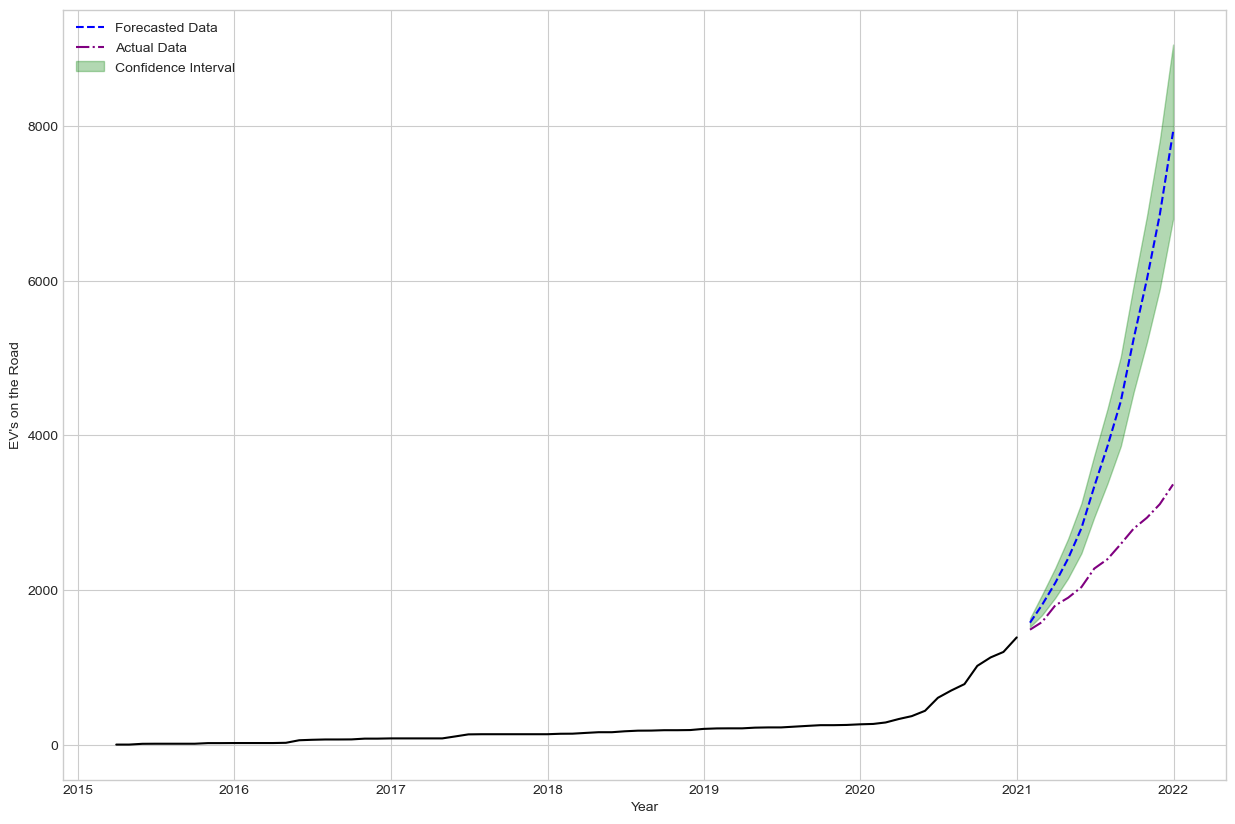

In [224]:
df_NEY_YORK_forecast = get_forecast(model, train_NEW_YORK, test_NEW_YORK, plot=True)

Both of the forcast and actual data have upward trend. the forecasted values seem to be higher than the actual observed values which may be due to the COVID-19 pandemic and the many supply chain issues it caused. These issues may have affected the electric vehicle sales in Whatcom County causing this discrepancy.

### Future Predictions

#### Fitting Model to All Observed Data

In [225]:
model = SARIMAX(county_information['NEW YORK']['df'], order=(1,1,2),seasonal_order=(0, 1, [], 12),
                enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    EV's on the Road   No. Observations:                   82
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -323.982
Date:                             Sat, 19 Nov 2022   AIC                            655.963
Time:                                     16:24:15   BIC                            664.722
Sample:                                 03-31-2015   HQIC                           659.424
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9324      0.040     23.521      0.000       0.855       1.010
ma.L1         -1.0368      0.084    -12.382      0.000      -1.201      -0.873
ma.L2          0.7803      0.078     10.034      0.000       0.628       0.933
sigma2      1059.2157    164.868      6.425      0.000     736.080    1382.351
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 9.17
Prob(Q):                              0.69   Prob(JB):                         0.01
Heteroskedasticity (H):              26.05   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Plotting & Saving Predictions

In [226]:
#getting and plotting predictions
df_NEW_YORK_preds = get_prediction(model, county_information['NEW YORK']['df'], 
                               test_NEW_YORK, 'NEW YORK', plot=True)

Above, we can see that the model is predicting the electric vehicle count in Ney York County to keep increasing exponentially.

In [227]:
#saving predictions
county_information['NEW YORK']['Predictions'] = df_NEW_YORK_preds

In order to interpret our results correctly, we need to consider the existing charging infrastructure in order to determine which counties have the greatest potential for investment.

## Current Charger Infrastructure by County

### Importing the data

## Current Charger Infrastructure by County

In [228]:
df_chargers = pd.read_csv('Resources/Electric_Vehicle_Charging_Stations_in_New_York.csv') 
df_chargers.head()

Fuel Type Code                Station Name             Street Address  \
0           ELEC  Town of Penfield - Library              1985 Baird Rd   
1           ELEC          Village of Webster        28 West Main Street   
2           ELEC   HOTSARA CHARGER STATION 1                100 Main St   
3           ELEC            Houghton College                 9736 Rt 19   
4           ELEC    NYC FLEET DPRMBLOT8_1_L3  920 Father Capodanno Blvd   

  Intersection Directions           City State    ZIP  Plus4 Station Phone  \
0                     NaN       Penfield    NY  14526    NaN  585-340-8720   
1                     NaN        Webster    NY  14580    NaN  866-816-7584   
2                     NaN   Saranac Lake    NY  12983    NaN  888-758-4389   
3                     NaN       Houghton    NY  14744    NaN  866-816-7584   
4                     NaN  Midland Beach    NY  10305    NaN  888-758-4389   

  Status Code  ...   Latitude  Longitude Date Last Confirmed      ID  \
0           E  ...  43.137476 -77.465214          06/07/2021   49941   
1           E  ...  43.211386 -77.431663          11/10/2022  116756   
2           E  ...  44.326862 -74.130150          11/10/2022  149787   
3           E  ...  42.423869 -78.154428          11/10/2022  157942   
4           E  ...  40.572636 -74.086140          11/10/2022  182295   

            Updated At  Owner Type Code  Federal Agency ID  \
0  2022-02-10 19:42:29               LG                NaN   
1  2022-11-10 02:00:34              NaN                NaN   
2  2022-11-10 00:57:46              NaN                NaN   
3  2022-11-10 02:00:45              NaN                NaN   
4  2022-11-10 01:05:12              NaN                NaN   

  Federal Agency Name   Open Date  EV Connector Types  
0                 NaN  04/01/2012               J1772  
1                 NaN  08/31/2018               J1772  
2                 NaN  12/07/2019               J1772  
3                 NaN  05/15/2020               J1772  
4                 NaN  01/27/2021  CHADEMO J1772COMBO  

[5 rows x 31 columns]

In [229]:
# dropping null value
df_chargers["ZIP"].dropna()


0       14526
1       14580
2       12983
3       14744
4       10305
        ...  
3079    14222
3080    10314
3081    12834
3082    13440
3083    14454
Name: ZIP, Length: 3084, dtype: int64

In [230]:
# determoning the value of each type of charger
df_chargers['Status Code'].value_counts()

E    3084
Name: Status Code, dtype: int64

Creating Zipcode Map to Find Counties

In [231]:
from uszipcode import SearchEngine

C:\Users\simro\anaconda3\envs\mlenv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [232]:
#Creating a dictionary that shows which county each zipcode is in
zipcodes_to_search = list(df_chargers['ZIP'].unique())
search = SearchEngine()
zip_map = {}

# excluding the zipcode not corresponded to any county
for zipcode in zipcodes_to_search:
    if zipcode == 12081:
        pass
    elif zipcode == 12217:
        pass
    else:
        zip_info = search.by_zipcode(zipcode).county
        zip_map[zipcode] = zip_info

zip_map

{14526: 'Monroe County',
 14580: 'Monroe County',
 12983: 'Franklin County',
 14744: 'Allegany County',
 10305: 'Richmond County',
 14227: 'Erie County',
 11220: 'Kings County',
 13090: 'Onondaga County',
 10954: 'Rockland County',
 14853: 'Tompkins County',
 11040: 'Nassau County',
 12205: 'Albany County',
 11976: 'Suffolk County',
 12590: 'Dutchess County',
 11212: 'Kings County',
 12534: 'Columbia County',
 14204: 'Erie County',
 10901: 'Rockland County',
 12180: 'Rensselaer County',
 10065: 'New York County',
 13027: 'Onondaga County',
 14621: 'Monroe County',
 11954: 'Suffolk County',
 11710: 'Nassau County',
 12110: 'Albany County',
 11901: 'Suffolk County',
 12020: 'Saratoga County',
 12477: 'Ulster County',
 13441: 'Oneida County',
 12144: 'Rensselaer County',
 14223: 'Erie County',
 14850: 'Tompkins County',
 14616: 'Monroe County',
 12054: 'Albany County',
 12866: 'Saratoga County',
 14731: 'Cattaraugus County',
 10022: 'New York County',
 14072: 'Erie County',
 12065: 'Sarat

# Feature Engineering 'County' Column for df_chargers

In [233]:
#mapping county information for each charger based on zipcode
df_chargers['County'] = df_chargers['ZIP'].map(zip_map) 
df_chargers['County'].head()

0      Monroe County
1      Monroe County
2    Franklin County
3    Allegany County
4    Richmond County
Name: County, dtype: object

### Saving Total Electrical Charger Count in Each County

In [234]:
df_charger_counts = pd.DataFrame(df_chargers['County'].value_counts()) 
df_charger_counts.reset_index(inplace=True) 
df_charger_counts.columns=['County', 'Charger Count'] 
df_charger_counts.head(10)

County  Charger Count
0     New York County            357
1       Albany County            331
2         Erie County            212
3       Monroe County            179
4      Suffolk County            178
5     Saratoga County            146
6  Westchester County            122
7        Kings County            108
8     Onondaga County            100
9       Queens County             98

In [235]:
#making County 's name compatible with the original dataset
# removing "County" after eanch county's name
df_charger_counts['County'] = df_charger_counts['County'].str[:-7]


In [236]:
# Uppaercasing the county's name
df_charger_counts['County']=df_charger_counts['County'].str.upper()
df_charger_counts

County  Charger Count
0    NEW YORK            357
1      ALBANY            331
2        ERIE            212
3      MONROE            179
4     SUFFOLK            178
..        ...            ...
58      LEWIS              3
59      TIOGA              3
60   CHENANGO              3
61  SCHOHARIE              2
62   CAMPBELL              1

[63 rows x 2 columns]

In [237]:
# removing index column
df_charger_counts.set_index('County')

Charger Count
County                  
NEW YORK             357
ALBANY               331
ERIE                 212
MONROE               179
SUFFOLK              178
...                  ...
LEWIS                  3
TIOGA                  3
CHENANGO               3
SCHOHARIE              2
CAMPBELL               1

[63 rows x 1 columns]

In [238]:
# showing how many stations there are in each county and save this information.
fig, ax = plt.subplots()
with plt.style.context('seaborn-whitegrid'):
    sns.barplot(x='Charger Count', y='County', data=df_charger_counts, orient='h', ax=ax)
    ax.set_title('Charging Station Counts by County')
    ax.set_xlabel('# of Charging Stations')
    x_labels = list(df_charger_counts['Charger Count'])
    rects = ax.patches

    for rect, label in zip(rects, x_labels):
        width = rect.get_width()
        ax.text(rect.get_width()+17, rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 ha='center', va='center')
    plt.tight_layout();
plt.savefig('images/charger_counts.png', facecolor='white')

Above, we can see that Ney York County has by far the most amount of chargers compared to other counties followed by Albany and Erie.

In [239]:
#saving the df for dashboarding
path = 'Resources'
output_file = os.path.join(path,f'df_charger_counts.csv') 
df_charger_counts.to_csv(output_file, index=False)

## County Comparison

### Creating a DataFrame for Comparison

All of the information we have been gathering needs to be put together into one dataframe in order to compare the top 6 counties accurately. In order to figure out how many electric vehicles each county has on May 31, 2021 and August 31, 2023, we will look at the numbers of cars added over the next two years, as well as what the ratio is between these numbers and the number of charging stations in each county.

In [240]:

top_6_county = ['KINGS', 'NASSAU','SUFFOLK','WESTCHESTER','QUEENS','NEW YORK']

In [277]:
comparison_df=pd.DataFrame()
i=0
for county in top_6_county:
    print(county)
    comparison_df.loc[i, 'County']=county
    
    comparison_df.loc[i, 'EV Count for 2021-05-31']= \
    county_information[county]['df']["EV's on the Road"][-1]
    
    print(round(county_information[county]['Predictions']['Predictions'][11],0))
    comparison_df.loc[i, 'EV Prediction for 2023-08-31'] = \
    round(county_information[county]['Predictions']['Predictions'][11],0)
    
    
    comparison_df.loc[i, 'Existing Charger Count'] = \
    df_charger_counts.loc[df_charger_counts['County'] == county, 'Charger Count'].iloc[0]
    i+=1

comparison_df['Chargers per EV'] = \
round(comparison_df['Existing Charger Count']/\
      comparison_df['EV Prediction for 2023-08-31'],3)

comparison_df['EVs per Charger'] = \
round(comparison_df['EV Prediction for 2023-08-31']/\
      comparison_df['Existing Charger Count'],0)

comparison_df['EVs Added (Today-2023)'] = \
comparison_df['EV Prediction for 2023-08-31'] - comparison_df['EV Count for 2021-05-31']

comparison_df.sort_values('EV Prediction for 2023-08-31', ascending=False, 
                          inplace=True)
comparison_df.set_index('County', inplace=True)


KINGS
10999.0
NASSAU
15970.0
SUFFOLK
13530.0
WESTCHESTER
12886.0
QUEENS
6721.0
NEW YORK
6173.0


As we can see above, according to our models, we are predicting that most amount of electric vehicles will be joining the roads in NASSAU County. However, the most amount of charging stations are in New York. This is not exactly unexpected since the largest city in Ney York State is in New York.

To find a valid answer to our question, we will calculate the "Evs per charger" number. the higher the value, it will be better to invest.


In [278]:
col_list = list(comparison_df.columns)
col_list.remove('Chargers per EV')

In [279]:
for col in col_list:
    comparison_df[col] = comparison_df[col].astype('int64')

In [280]:
comparison_df.sort_values('EVs per Charger', ascending=False, inplace=True)
comparison_df.style.background_gradient(axis=0, subset=['EVs per Charger'], 
                                        cmap='RdYlGn')
# comparison_df.style.applymap('green', subset=pd.IndexSlice['Island'])

When we sort by "EVs per Charger" column, we see that NASSAU County followed by KINGS and Westchester counties have by far the highest values. This suggests that these counties will have more potential for setting charging stations in the future. 

However, this does not show us the full picture. Several factors such as climate, population, population age, income and etc have significant impact on the purchase of the EVs. In the next step of our project we will focouse on this aspect and create a deep learning model.

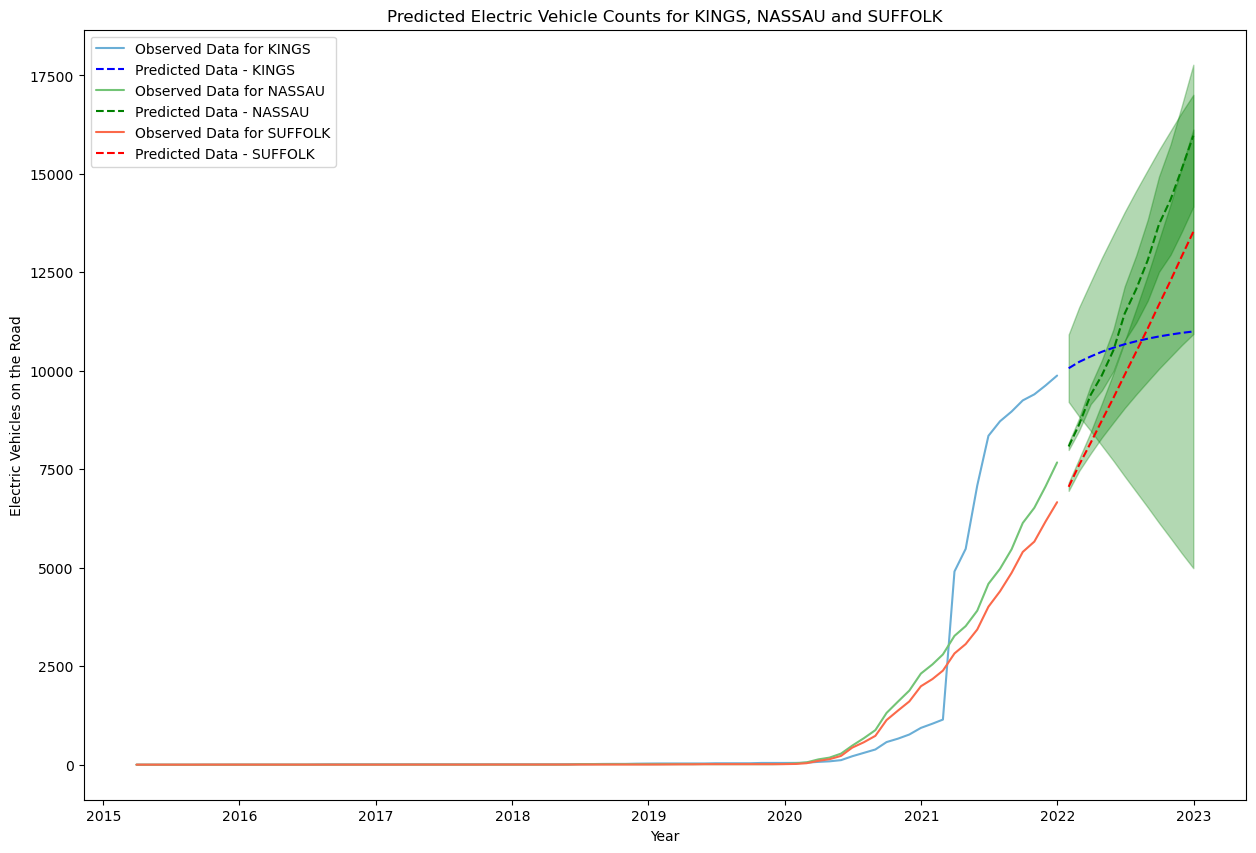

In [281]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Electric Vehicles on the Road')
ax.set_title(f'Predicted Electric Vehicle Counts for KINGS, NASSAU and SUFFOLK')

for county in ['KINGS', 'NASSAU', 'SUFFOLK']:
    prediction_df = county_information[county]['Predictions']
    
    if county == 'KINGS':
        palette = 'Blues'
        color='blue'
    elif county == 'NASSAU':
        palette='Greens'
        color='green'
    else:
        palette='Reds'
        color='red'
    with plt.style.context('seaborn-whitegrid'):
                county_df = county_information[county]['df']
                county_df.columns=[f'Observed Data for {county}']
                sns.lineplot(data=county_df, ax=ax, 
                             palette=palette)
                sns.lineplot(data=prediction_df, x=prediction_df.index, 
                             y='Predictions', color=color, ax=ax,  
                             label=f'Predicted Data - {county}', ls='--')
                ax.fill_between(prediction_df.index, 
                                y1=prediction_df['Lower Confidence Interval'], 
                                y2=prediction_df['Upper Confidence Interval'], 
                                alpha=0.3, color='green')
ax.legend(loc=2);

In [282]:
# Saving New York registration clean data to CSV
NYS_registrations_df.to_csv('Resources/NYS_EV_Registrations.csv')